### Описание датасета
-  Регион - субъект Российской Федерации, где находится медицинское учреждение
-  Календарный_год - год
-  Период - месяц
-  gender - пол респондента
-  poselenie - ответ на вопрос "Вы постоянно проживаете в городе или в сельской местности?"
-  Населенный_пункт - название населенного пункта, где находится медицинское учреждение
-  org_type - ответ на вопрос "В каких организациях Вы обычно получаете медицинскую помощь?"
-  last_visit - ответ на вопрос "Как давно Вы в последний раз получали медицинскую помощь?"
-  time_of_register - ответ на вопрос "Насколько Вы согласны с утверждением, что сейчас Вы можете записаться к врачу в удобное для Вас время?" (1-5 баллы по 5-бальной шкале)
-  wait_time - ответ на вопрос "Насколько Вы удовлетворены длительностью ожидания медицинской услуги с момента возникновения потребности в медицинской помощи до момента ее получения?" (1-5 баллы по 5-бальной шкале)
-  near_cab - ответ на вопрос "Насколько Вы удовлетворены длительностью ожидания непосредственно перед кабинетом?" (1-5 баллы по 5-бальной шкале)
-  comfort - ответ на вопрос "Насколько комфортным было Ваше пребывание в медицинской организации (комфортность зон ожидания, комфортное перемещение внутри медицинской организации)?" (1-5 баллы по 5-бальной шкале)
-  attitude - ответ на вопрос "Насколько Вы удовлетворены отношением к Вам со стороны медицинского персонала (врачи, мед. сестры, регистраторы, санитары)?" (1-5 баллы по 5-бальной шкале)
-  explain - ответ на вопрос "Удовлетворены ли Вы тем, как врач объяснял Вам, зачем назначено то или иное лечение, лекарственный препарат, диагностическая процедура?" (1-5 баллы по 5-бальной шкале)
-  expect - ответ на вопрос "Насколько результат Вашего обращения в медицинскую организацию соответствовал Вашим ожиданиям?" (1-5 баллы по 5-бальной шкале)
-  loyalty - ответ на вопрос "Вы бы посоветовали близким друзьям или родственникам обращаться за медицинской помощью в Вашу медицинскую организацию?" (1-5 баллы по 5-бальной шкале)
-  gen_sat - ответ на вопрос "Оцените, насколько в целом Вы удовлетворены медицинской помощью?" (1-5 баллы по 5-бальной шкале)
-  open_question_1 - ответ на вопрос "Что Вы можете назвать наибольшей проблемой в процессе получения медицинской помощи в медицинской организации, в которой Вы получаете медицинскую помощь?"
-  open_question_2 - ответ на вопрос "Что Вы можете назвать наибольшей проблемой в процессе получения медицинской помощи в регионе, в котором Вы проживаете?"
-  date_of_survey - дата опроса
-  respondent_number - номер респондента
-  doctor_domestic_visit_problem - ответ на вопрос "Возникали ли у Вас сложности при вызове врача на дом?"
-  diag_services_available - ответ на вопрос "Можете ли Вы получить при оказании первичной медико-санитарной помощи в Вашей медицинской организации диагностические и лабораторные услуги?"
-  disabled_facilitites_available - ответ на вопрос "Есть ли в Вашей медицинской организации приспособления для лиц с ограниченными возможностями?
-  problem_solved - ответ на вопрос "Была ли решена Ваша медицинская проблема?"
- region_medical_care - ответ на вопрос "Оцените, насколько Вы удовлетворены доступностью медицинской помощи в Вашем регионе?"

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import mlflow
import mlflow.sklearn
import os
from scipy.special import softmax
from scipy.stats import chi2_contingency
from datetime import datetime
import time
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [4]:
from tqdm import tqdm
tqdm.pandas()

In [5]:
df = pd.read_csv('Anketa.csv', on_bad_lines='warn', sep=';')
df.shape

C:\Users\a.golub\AppData\Local\Temp\ipykernel_13792\3837633047.py:1: DtypeWarning: Columns (28,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anketa.csv', on_bad_lines='warn', sep=';')


(1301055, 36)

In [6]:
df.head()

Id                 Регион  Календарный_год  Период   gender poselenie                                      Населенный_пункт                  org_type            last_visit                 zapis ozhid              near_cab comfort              attitude               explain                expect loyalty               gen_sat open_question_1 open_question_2 Дата_проведения_опроса_в_формате_дд_мм_гггг  Номер_респондента                             17                    18                    19                    16  Возраст        problem_solved Удовлетворенность_доступностью_лекарств  health_selfestimation  children_number  1st_child_health 2nd_child_health  3d_child_health  4th_child_health  5th_child_health
0  1311  Ленинградская область             2022  Август  Мужской      Село   Ленинградская обл., Всеволожский р-н., г. Сертолово  Только в государственных  менее 1 мес. назад\t                     5     4                     4       4                     3                     4                     4       3                     4   нет замечаний   нет замечаний                     2022-08-15 00:00:00.000              1.000  Не пользовался данной услугой  Затрудняюсь ответить  Затрудняюсь ответить                     4   19.000  Затрудняюсь ответить                                     NaN                    NaN              NaN               NaN              NaN              NaN               NaN               NaN
1  1312  Ленинградская область             2022  Август  Мужской     Город  Ленинградская обл., Всеволожский р-н., г. Всеволожск          Только в частных   более 12 мес. назад  Затрудняюсь ответить     5  Затрудняюсь ответить       5  Затрудняюсь ответить  Затрудняюсь ответить  Затрудняюсь ответить       5  Затрудняюсь ответить   нет замечаний   нет замечаний                     2022-08-15 00:00:00.000              2.000                            Нет  Затрудняюсь ответить                    Да                     5   22.000                    Да                                     NaN                    NaN              NaN               NaN              NaN              NaN               NaN               NaN
2  1313  Ленинградская область             2022  Август  Мужской     Город       Ленинградская обл., Гатчинский р-н., г. Гатчина  Только в государственных  менее 1 мес. назад\t                     3     2                     5       5                     5  Затрудняюсь ответить                     5       4                     4   нет замечаний   нет замечаний                     2022-08-15 00:00:00.000              3.000                            Нет  Затрудняюсь ответить                    Да                     5   28.000                    Да                                     NaN                    NaN              NaN               NaN              NaN              NaN               NaN               NaN
3  1314  Ленинградская область             2022  Август  Мужской      Село     Ленинградская обл., Волосовский р-н., Торосово д.  Только в государственных   более 12 мес. назад                     5     4                     5       5                     5                     5  Затрудняюсь ответить       5                     5   нет замечаний   нет замечаний                     2022-08-15 00:00:00.000              4.000                             Да                    Да                    Да  Затрудняюсь ответить   30.000                    Да                                     NaN                    NaN              NaN               NaN              NaN              NaN               NaN               NaN
4  1315  Ленинградская область             2022  Август  Мужской     Город        Ленинградская обл., Выборгский р-н., г. Выборг  Только в государственных  менее 1 мес. назад\t  Затрудняюсь ответить     5                     5       5  Затрудняюсь ответить  Затрудняюсь ответить  Затрудняюсь ответить       5  Затрудняюсь ответить   нет замечаний   нет замечаний                     2022-08-15 0

In [7]:
# Переименуем колонки
column_mapping = {
    'Календарный_год': 'year',
    'Регион': 'Region',
    'Период': 'period',
    'poselenie': 'locality_type',
    'Населенный_пункт': 'locality',
    'zapis': 'time_of_register',
    'ozhid': 'wait_time',
    'Дата_проведения_опроса_в_формате_дд_мм_гггг': 'date_of_survey',
    'Номер_респондента': 'respondent_number',
    '16': 'region_medical_care_availability',
    '17': 'doctor_domestic_visit_problem',
    '18': 'diag_services_available',
    '19': 'disabled_facilitites_available',
    'Возраст': 'age'
}

df = df.rename(columns=column_mapping)
columns_to_remove = ['Id', 'Удовлетворенность_доступностью_лекарств', 'health_selfestimation', 'children_number', '1st_child_health', '2nd_child_health', '3d_child_health', '4th_child_health', '5th_child_health']
df = df.drop(columns=columns_to_remove, errors='ignore')
df.head()

Region  year  period   gender locality_type                                              locality                  org_type            last_visit      time_of_register wait_time              near_cab comfort              attitude               explain                expect loyalty               gen_sat open_question_1 open_question_2           date_of_survey  respondent_number  doctor_domestic_visit_problem diag_services_available disabled_facilitites_available region_medical_care_availability    age        problem_solved
0  Ленинградская область  2022  Август  Мужской          Село   Ленинградская обл., Всеволожский р-н., г. Сертолово  Только в государственных  менее 1 мес. назад\t                     5         4                     4       4                     3                     4                     4       3                     4   нет замечаний   нет замечаний  2022-08-15 00:00:00.000              1.000  Не пользовался данной услугой    Затрудняюсь ответить           Затрудняюсь ответить                                4 19.000  Затрудняюсь ответить
1  Ленинградская область  2022  Август  Мужской         Город  Ленинградская обл., Всеволожский р-н., г. Всеволожск          Только в частных   более 12 мес. назад  Затрудняюсь ответить         5  Затрудняюсь ответить       5  Затрудняюсь ответить  Затрудняюсь ответить  Затрудняюсь ответить       5  Затрудняюсь ответить   нет замечаний   нет замечаний  2022-08-15 00:00:00.000              2.000                            Нет    Затрудняюсь ответить                             Да                                5 22.000                    Да
2  Ленинградская область  2022  Август  Мужской         Город       Ленинградская обл., Гатчинский р-н., г. Гатчина  Только в государственных  менее 1 мес. назад\t                     3         2                     5       5                     5  Затрудняюсь ответить                     5       4                     4   нет замечаний   нет замечаний  2022-08-15 00:00:00.000              3.000                            Нет    Затрудняюсь ответить                             Да                                5 28.000                    Да
3  Ленинградская область  2022  Август  Мужской          Село     Ленинградская обл., Волосовский р-н., Торосово д.  Только в государственных   более 12 мес. назад                     5         4                     5       5                     5                     5  Затрудняюсь ответить       5                     5   нет замечаний   нет замечаний  2022-08-15 00:00:00.000              4.000                             Да                      Да                             Да             Затрудняюсь ответить 30.000                    Да
4  Ленинградская область  2022  Август  Мужской         Город        Ленинградская обл., Выборгский р-н., г. Выборг  Только в государственных  менее 1 мес. назад\t  Затрудняюсь ответить         5                     5       5  Затрудняюсь ответить  Затрудняюсь ответить  Затрудняюсь ответить       5  Затрудняюсь ответить   нет замечаний   нет замечаний  2022-08-15 00:00:00.000              5.000                            Нет    Затрудняюсь ответить                             Да             Затрудняюсь ответить 34.000                    Да

#### EDA

##### Разберемся, что делать с вариантами Затрудняюсь ответить

In [8]:
# Список колонок для анализа
columns = [
    'time_of_register', 'wait_time', 'near_cab', 'comfort',
    'attitude', 'explain', 'expect', 'loyalty', 'gen_sat',
    'diag_services_available', 'disabled_facilitites_available',
    'region_medical_care_availability', 'problem_solved'
]

# Создаем матрицы для хранения результатов
association_matrix = pd.DataFrame(index=columns, columns=columns)
cramer_matrix = pd.DataFrame(index=columns, columns=columns)

# Функция для вычисления коэффициента Крамера
def cramers_v(contingency_matrix):
    try:
        chi2 = chi2_contingency(contingency_matrix)[0]
        n = contingency_matrix.sum().sum()
        min_dim = min(contingency_matrix.shape) - 1
        return np.sqrt(chi2 / (n * min_dim)) if n * min_dim > 0 else 0.0
    except:
        return 0.0
# Создаем все комбинации колонок
combinations = [(col1, col2) for col1 in columns for col2 in columns]
# Заполняем матрицы
for col1, col2 in tqdm(combinations, 
                       desc="Вычисление коэффициентов Крамера", 
                       total=len(combinations),
                       unit="пара"):
    # Создаем таблицу сопряженности для "Затрудняюсь ответить"
    mask1 = df[col1] == 'Затрудняюсь ответить'
    mask2 = df[col2] == 'Затрудняюсь ответить'
    contingency = pd.crosstab(mask1, mask2)
        
    # Вычисляем коэффициент Крамера
    cramer_v = cramers_v(contingency)
    cramer_matrix.loc[col1, col2] = cramer_v

# Создаем тепловую карту для коэффициента Крамера
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix.astype(float), 
            annot=True, 
            cmap='YlOrRd', 
            fmt='.2f',
            square=True)
plt.title('Коэффициент Крамера между ответами "Затрудняюсь ответить"')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Вычисление коэффициентов Крамера: 100%|██████████| 169/169 [00:43<00:00,  3.86пара/s]


##### Видно, что problem_solved не зависит от других ответов

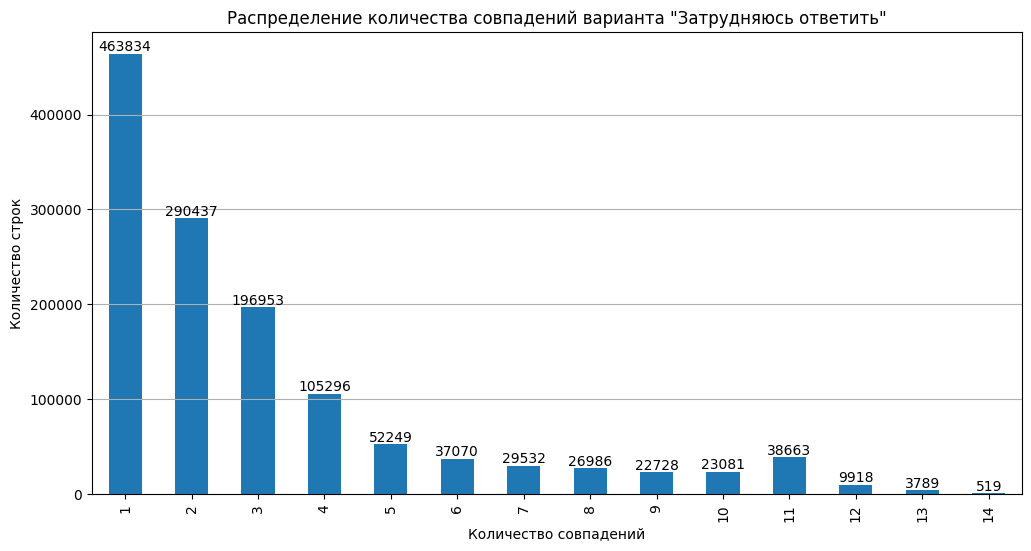

In [9]:
# Предположим, что строки с вариантом "Затрудняюсь ответить" можно удалить

# Создаем маску для каждого столбца
masks = {col: df[col] == 'Затрудняюсь ответить' for col in columns}

# Создаем DataFrame с масками
mask_df = pd.DataFrame(masks)

# Подсчитываем количество совпадений для каждой строки
mask_df['count'] = mask_df.sum(axis=1)

# Группируем по количеству совпадений и подсчитываем частоту
coincidence_counts = mask_df['count'].value_counts().sort_index()
coincidence_counts.index = range(1, len(coincidence_counts) + 1)
plt.figure(figsize=(12, 6))
ax = coincidence_counts.plot(kind='bar')
plt.title('Распределение количества совпадений варианта "Затрудняюсь ответить"')
plt.xlabel('Количество совпадений')
plt.ylabel('Количество строк')
plt.grid(True, axis='y')
for i, v in enumerate(coincidence_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [10]:
# Удаляем строки, где количество совпадений варианта "Затрудняюсь ответить" равно 10 или 11
rows_to_drop = mask_df[mask_df['count'].isin([10, 11, 12, 13])].index
df = df.drop(rows_to_drop)
print(df.shape)

(1248166, 27)


##### Сгенерим новые фичи на основе вариантов Затрудняюсь ответить на этапе генерации фич


In [11]:
# Целевой признак: problem_solved
plt.figure(figsize=(6, 4))
sns.countplot(x='problem_solved', data=df)
plt.title('Распределение целевого признака: problem_solved')
plt.show()
# TODO сделать 3 класса

In [12]:
# имбаланс исправим на этапе разделдения выборок

In [13]:
# Целевой признак: Age
# Строим распределение возраста
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=50, kde=True)
plt.title('Распределение возраста респондентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

# Выводим базовую статистику
print("\nСтатистика по возрасту:")
print(df['age'].describe())



Статистика по возрасту:
count   1248162.000
mean         47.105
std          16.320
min           1.000
25%          34.000
50%          46.000
75%          61.000
max         222.000
Name: age, dtype: float64


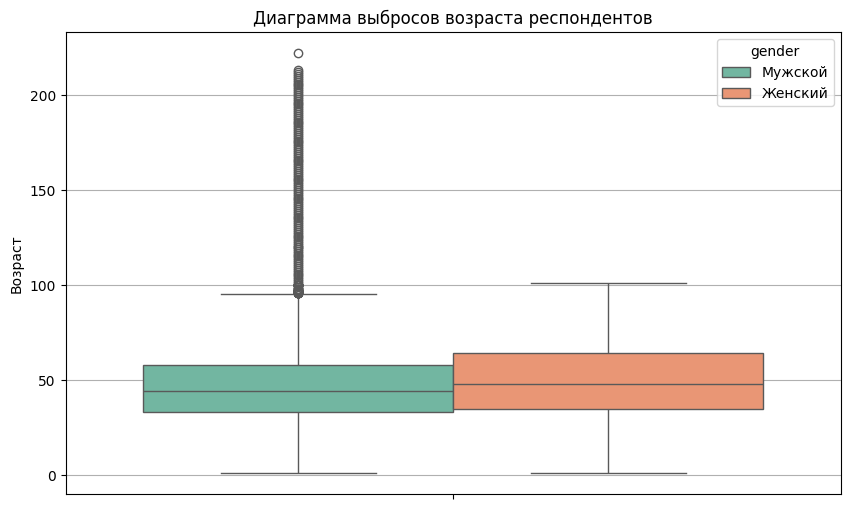

In [14]:
# Удалим строки с возрастом меньше 18 и аномальными значениями сверху
# Создаем box plot для анализа выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='age', hue='gender', palette='Set2')
plt.title('Диаграмма выбросов возраста респондентов')
plt.ylabel('Возраст')
plt.grid(True, axis='y')

In [15]:
# аномалия выбросов возраста
df[df['age'] > 100]

Region  year    period   gender locality_type                  locality                           org_type            last_visit time_of_register wait_time near_cab comfort              attitude explain                expect loyalty               gen_sat             open_question_1              open_question_2           date_of_survey  respondent_number  doctor_domestic_visit_problem diag_services_available disabled_facilitites_available region_medical_care_availability     age        problem_solved
516528  Калининградская область  2023  Сентябрь  Мужской         Город                     Гусев           Только в государственных   более 12 мес. назад                5         4        4       4                     4       4  Затрудняюсь ответить       5  Затрудняюсь ответить       Затрудняюсь ответить.        Затрудняюсь ответить.  2079-09-08 00:00:00.000             57.000  Не пользовался данной услугой                      Да                             Да                                4 101.000                    Да
516529  Калининградская область  2023  Сентябрь  Мужской         Город                     Гусев           Только в государственных   более 12 мес. назад                5         4        4       4                     4       4  Затрудняюсь ответить       5  Затрудняюсь ответить       Затрудняюсь ответить.        Затрудняюсь ответить.  2080-09-08 00:00:00.000             58.000  Не пользовался данной услугой                      Да                             Да                                4 102.000                    Да
516530  Калининградская область  2023  Сентябрь  Мужской         Город                     Гусев           Только в государственных   более 12 мес. назад                5         4        4       4                     4       4  Затрудняюсь ответить       5  Затрудняюсь ответить       Затрудняюсь ответить.        Затрудняюсь ответить.  2081-09-08 00:00:00.000             59.000  Не пользовался данной услугой                      Да                             Да                                4 103.000                    Да
516531  Калининградская область  2023  Сентябрь  Мужской         Город                     Гусев           Только в государственных   более 12 мес. назад                5         4        4       4                     4       4  Затрудняюсь ответить       5  Затрудняюсь ответить       Затрудняюсь ответить.        Затрудняюсь ответить.  2082-09-08 00:00:00.000             60.000  Не пользовался данной услугой                      Да                             Да                                4 104.000                    Да
516532  Калининградская область  2023  Сентябрь  Мужской         Город                     Гусев           Только в государственных   более 12 мес. назад                5         4        4       4                     4       4  Затрудняюсь ответить       5  Затрудняюсь ответить       Затрудняюсь ответить.        Затрудняюсь ответить.  2083-09-08 00:00:00.000             61.000  Не пользовался данной услугой                      Да                             Да                                4 105.000                    Да
516533  Калининградская область  2023  Сентябрь  Мужской         Город                     Гусев           Только в государственных   более 12 мес. назад                5         4        4       4                     4       4  Затрудняюсь ответить       5  Затрудняюсь ответить       Затрудняюсь ответить.        Затрудняюсь ответить.  2084-09-08 00:00:00.000             62.000  Не пользовался данной услугой                      Да                             Да                                4 106.000                    Да
516534  Калининградская область  2023  Сентябрь  Мужской         Город                     Гусев           Только в государственных   более 12 мес. назад                5         4        4       4                     4       4  Затрудняюсь ответить       5  Затрудняюсь ответить       Затрудняюсь ответить.        

In [16]:
# сначала удалим невалидные значения
df = df[df['age'] >= 18]
df = df[df['age'] <= 100]

In [17]:
# Расчёт квартилей и IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

In [18]:
# Верхняя граница
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Удаление выбросов сверху
df = df[df['age'] <= upper_bound]
# Удалим строки с возрастом меньше 18
df = df[df['age'] >= lower_bound]

In [19]:
df.shape

(1247743, 27)

In [20]:
# Пропуски
display(df.isnull().sum())

Region                                   0
year                                     0
period                                   0
gender                                   1
locality_type                            1
locality                               695
org_type                             39454
last_visit                           39776
time_of_register                     39429
wait_time                            39421
near_cab                             39426
comfort                              39424
attitude                             39431
explain                              39431
expect                               39488
loyalty                              39530
gen_sat                                 19
open_question_1                     210738
open_question_2                     247681
date_of_survey                           3
respondent_number                     1552
doctor_domestic_visit_problem        82189
diag_services_available              92287
disabled_fa

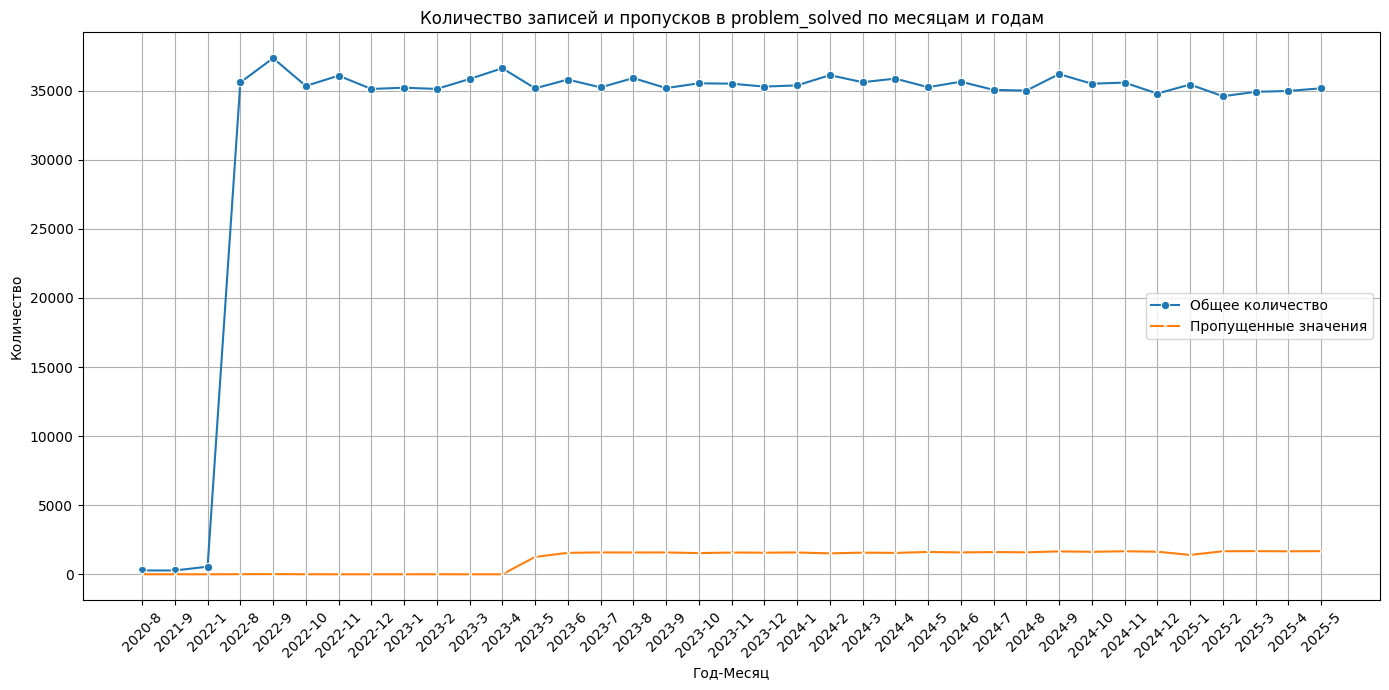

In [21]:
# Посмотрим пропуски в target
period_mapping = {
    'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель': 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,
    'Август': 8,
    'Сентябрь': 9,
    'Октябрь': 10,
    'Ноябрь': 11,
    'Декабрь': 12
}

# Применяем маппинг к столбцу 'period'
df['period'] = df['period'].map(period_mapping)

# Группируем данные
grouped_total = df.groupby(['year', 'period'])['problem_solved'].count().rename('total_count')
grouped_missing = df.groupby(['year', 'period'])['problem_solved'].apply(lambda x: x.isnull().sum()).rename('missing_count')

result = pd.concat([grouped_total, grouped_missing], axis=1).reset_index()

result['Year_Month'] = result['year'].astype(str) + '-' + result['period'].astype(str)

# Строим график
plt.figure(figsize=(14, 7))
sns.lineplot(data=result, x='Year_Month', y='total_count', label='Общее количество', marker='o')
sns.lineplot(data=result, x='Year_Month', y='missing_count', label='Пропущенные значения', marker='x')

plt.xticks(rotation=45)
plt.title('Количество записей и пропусков в problem_solved по месяцам и годам')
plt.xlabel('Год-Месяц')
plt.ylabel('Количество')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Удаляем ненужные колонки
# df = df.drop(columns=['respondent_number'])
# TODO посмотреть почему много пропусков
# TODO посмотреть есть ли комментарий

In [22]:
# Проверим, может дело в Регионе
# Группировка с учётом региона
grouped_total = df.groupby(['year', 'period', 'Region'])['problem_solved'].count().rename('total_count')
grouped_missing = df.groupby(['year', 'period', 'Region'])['problem_solved'].apply(lambda x: x.isnull().sum()).rename('missing_count')

# Объединение результатов
result = pd.concat([grouped_total, grouped_missing], axis=1).reset_index()
result = result.sort_values(by=['missing_count','year', 'period', 'Region'],
                            ascending=[False, True, True, True]).head(15)
display(result)


year  period                        Region  total_count  missing_count
2737  2025       3  Донецкая Народная Республика            0            648
2915  2025       5  Донецкая Народная Республика            0            646
2648  2025       2  Донецкая Народная Республика            0            643
2381  2024      11  Донецкая Народная Республика            0            642
2826  2025       4  Донецкая Народная Республика            0            638
2203  2024       9  Донецкая Народная Республика            0            635
2559  2025       1  Донецкая Народная Республика            0            618
2470  2024      12  Донецкая Народная Республика            0            614
2292  2024      10  Донецкая Народная Республика            0            603
2025  2024       7  Донецкая Народная Республика            0            592
1847  2024       5  Донецкая Народная Республика            0            584
2114  2024       8  Донецкая Народная Республика            0            573
1936  2024       6  Донецкая Народная Республика            0            565
957   2023       7  Донецкая Народная Республика            0            561
1135  2023       9  Донецкая Народная Республика            0            560

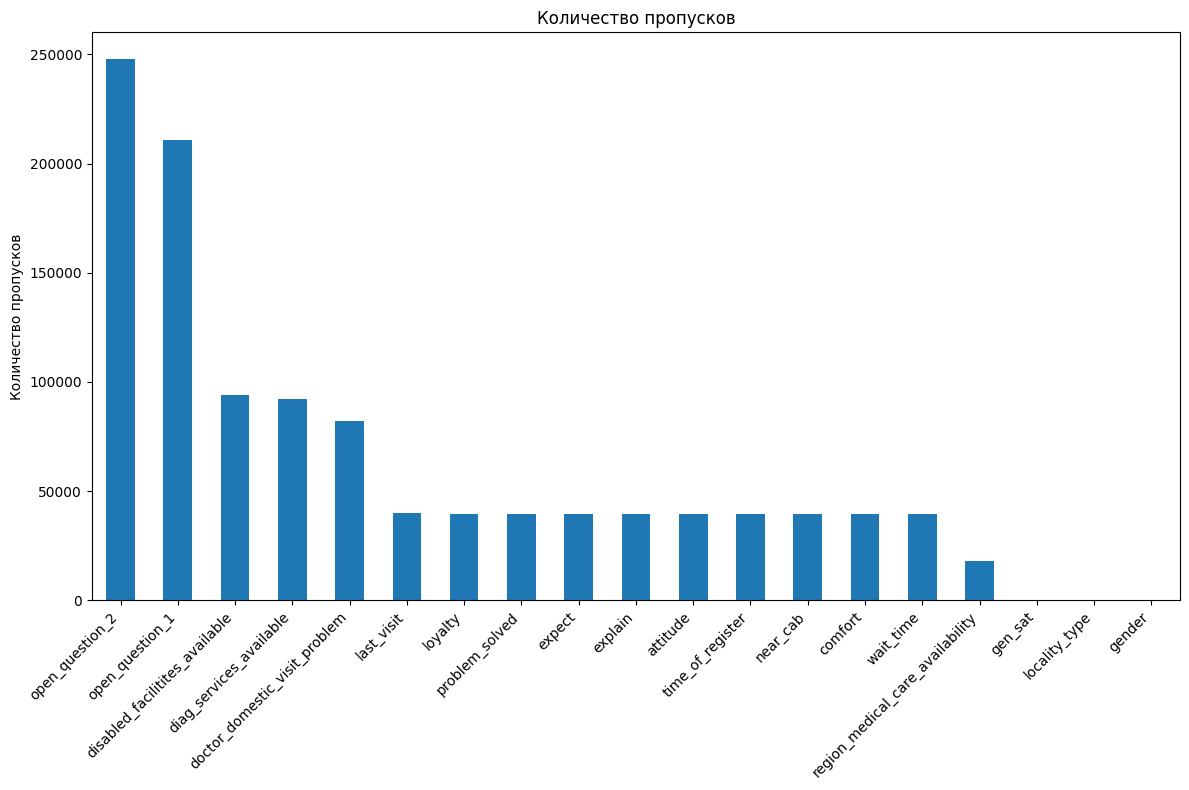

In [23]:
# Посмотрим на пропуски более детально: м.б. строки пустые целиком (т.е. мусор), 
# либо респонденты не ответили на вопросы после того, как посатвили низкую оценку по одному из вопросов (1-2)
df_analysis = df.copy()
# Столбцы, которые НЕ являются оценочными/опросными
id_cols = ['Region', 'year', 'period', 'date_of_survey', 'respondent_number', 'locality', 'org_type']
# Опросные/оценочные столбцы (все, кроме id_cols)
survey_cols = [col for col in df_analysis.columns if col not in id_cols]
# Визуализация общего распределения пропусков ---
plt.figure(figsize=(18, 10))
sns.heatmap(df_analysis[survey_cols].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Тепловая карта пропущенных значений в опросных столбцах (желтый - пропуск)')
plt.show()

missing_counts = df_analysis[survey_cols].isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0] # Только столбцы с пропусками

plt.figure(figsize=(12, 8))
missing_counts.plot(kind='bar')
plt.title('Количество пропусков')
plt.ylabel('Количество пропусков')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

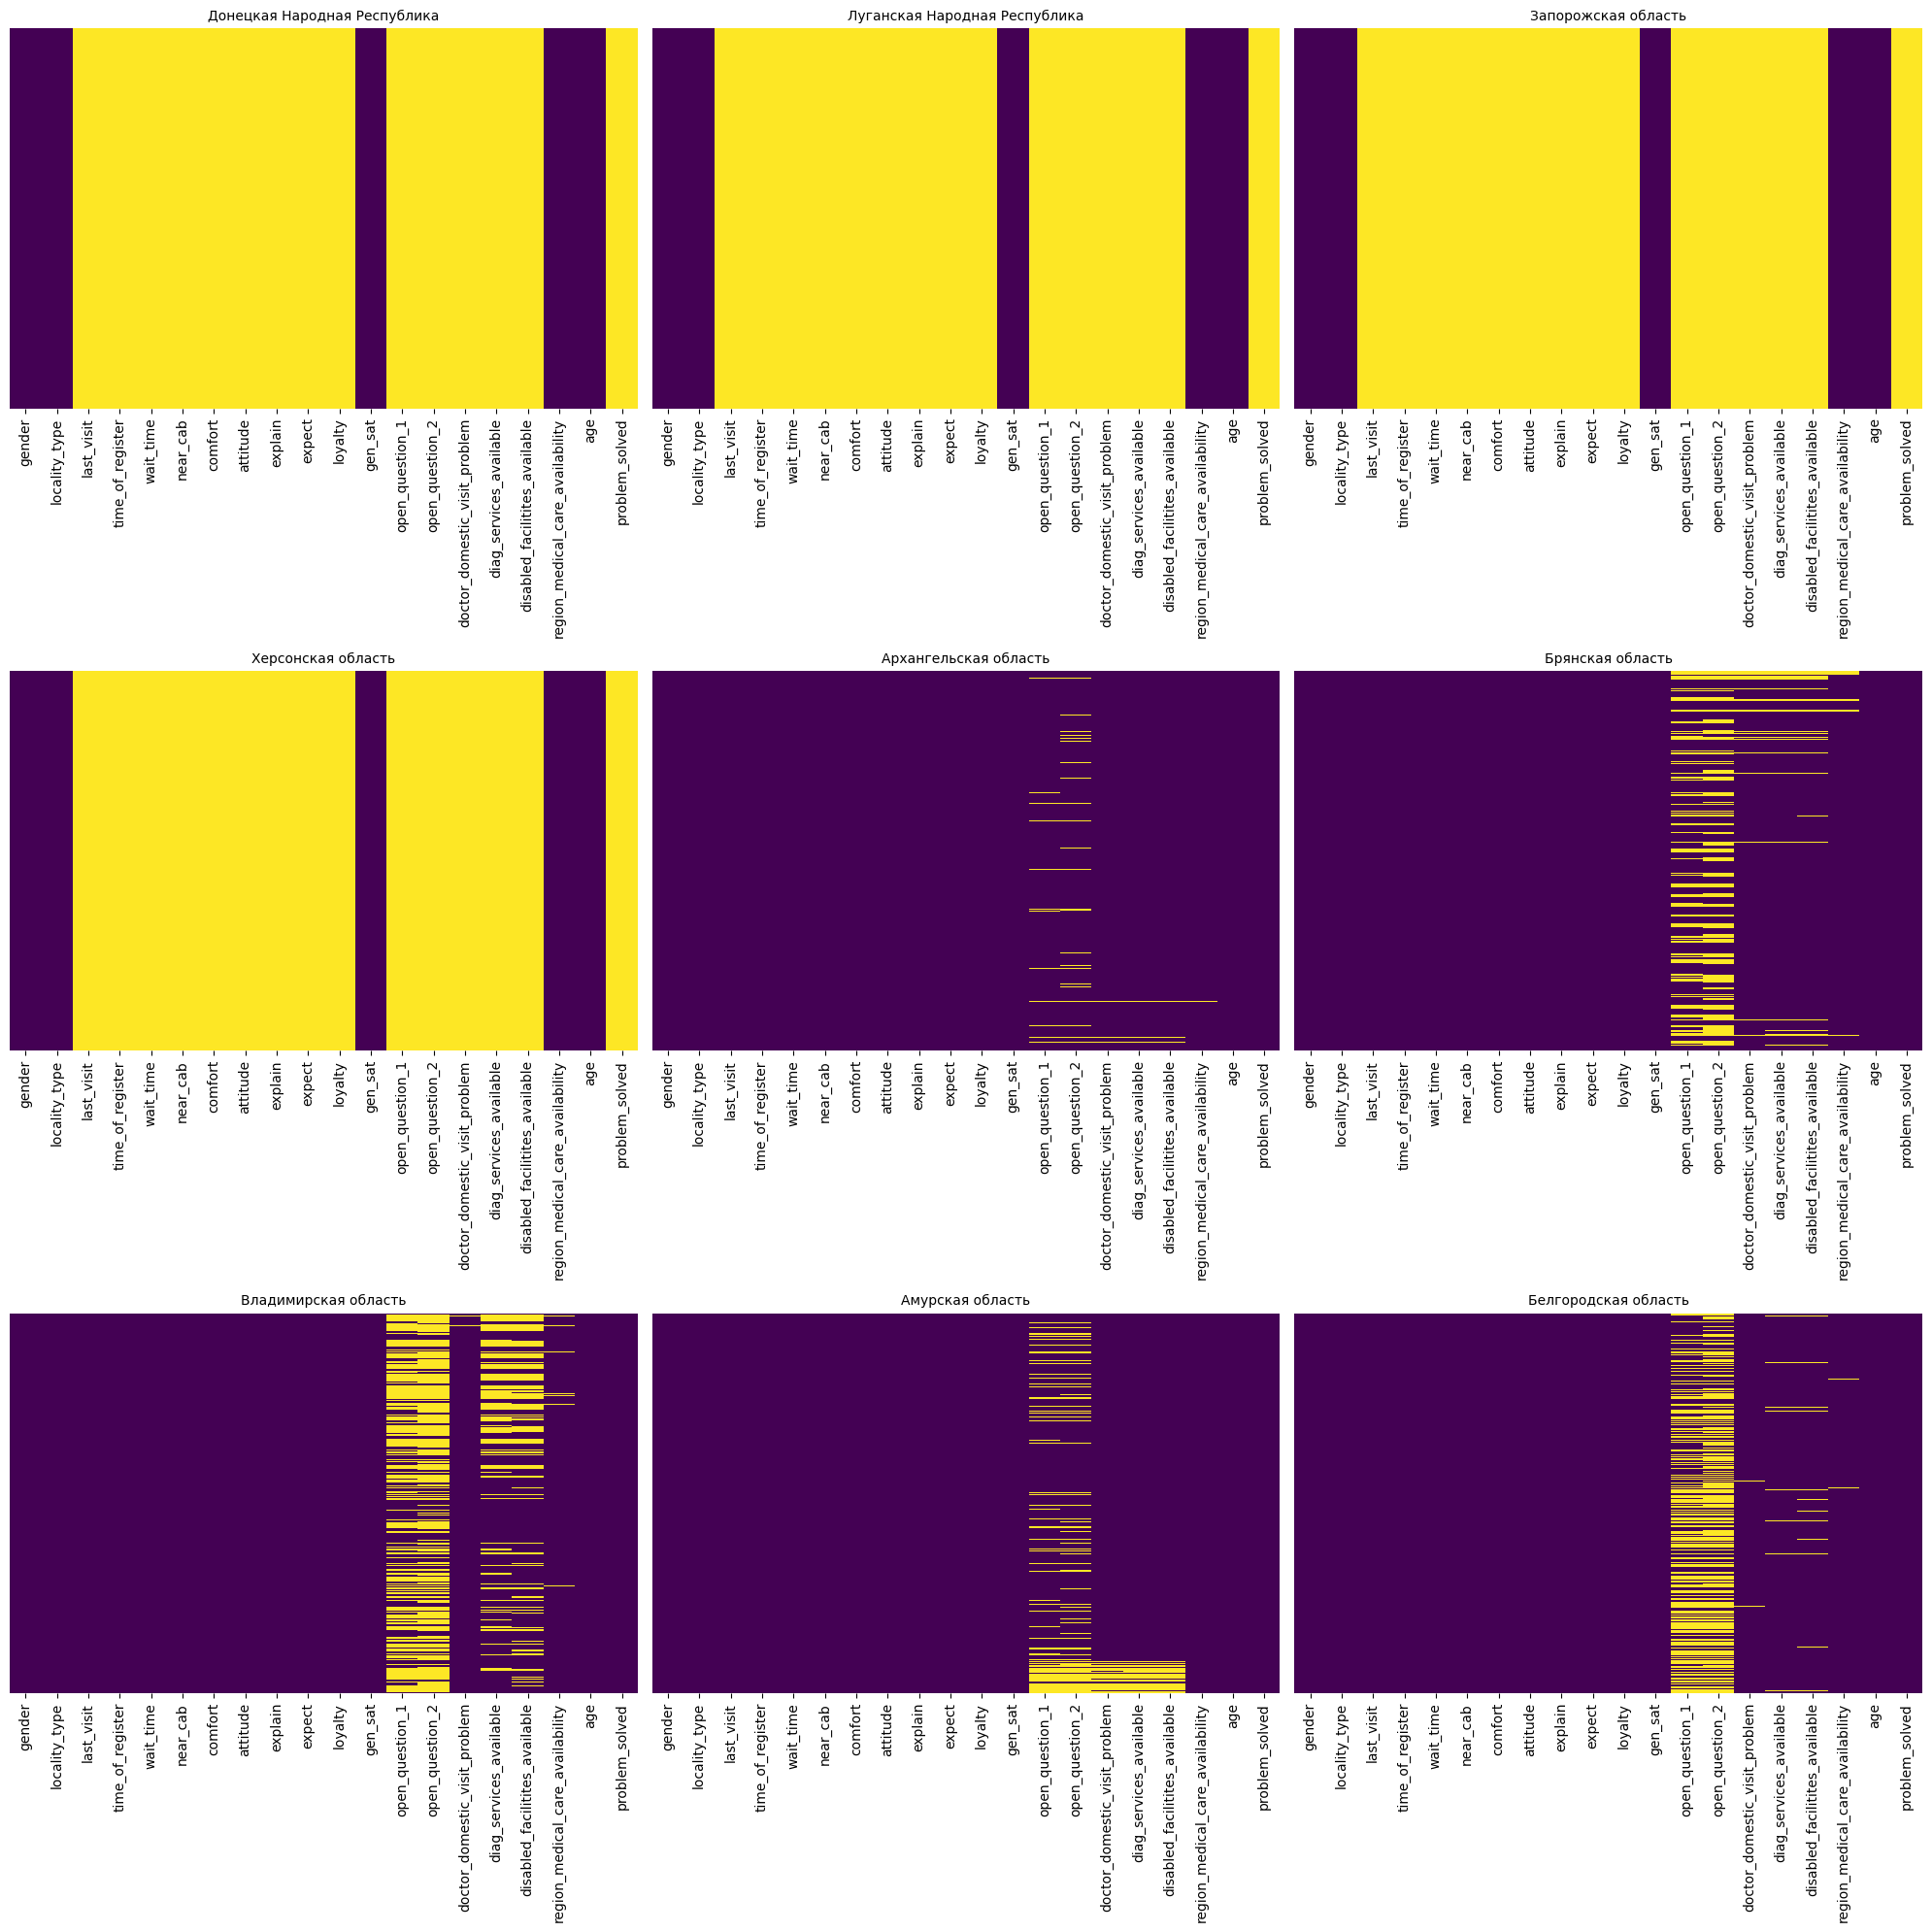

In [24]:
# Получаем топ-16 регионов по количеству пропусков
filtered_df = df[
    (df['period'] == 6) & 
    (df['year'] == 2023)
]
top_regions = filtered_df.groupby('Region')['problem_solved'].apply(lambda x: x.isna().sum()).sort_values(ascending=False).head(9).index
# Создаем фигуру с 16 subplots (4x4)
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

# heatmaps
for idx, region in enumerate(top_regions):
    region_data = df[df['Region'] == region]
    missing_matrix = region_data[survey_cols].isnull()
    sns.heatmap(missing_matrix, 
                ax=axes[idx],
                cbar=False,
                cmap='viridis',
                yticklabels=False)
    
    axes[idx].set_title(f'{region}', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

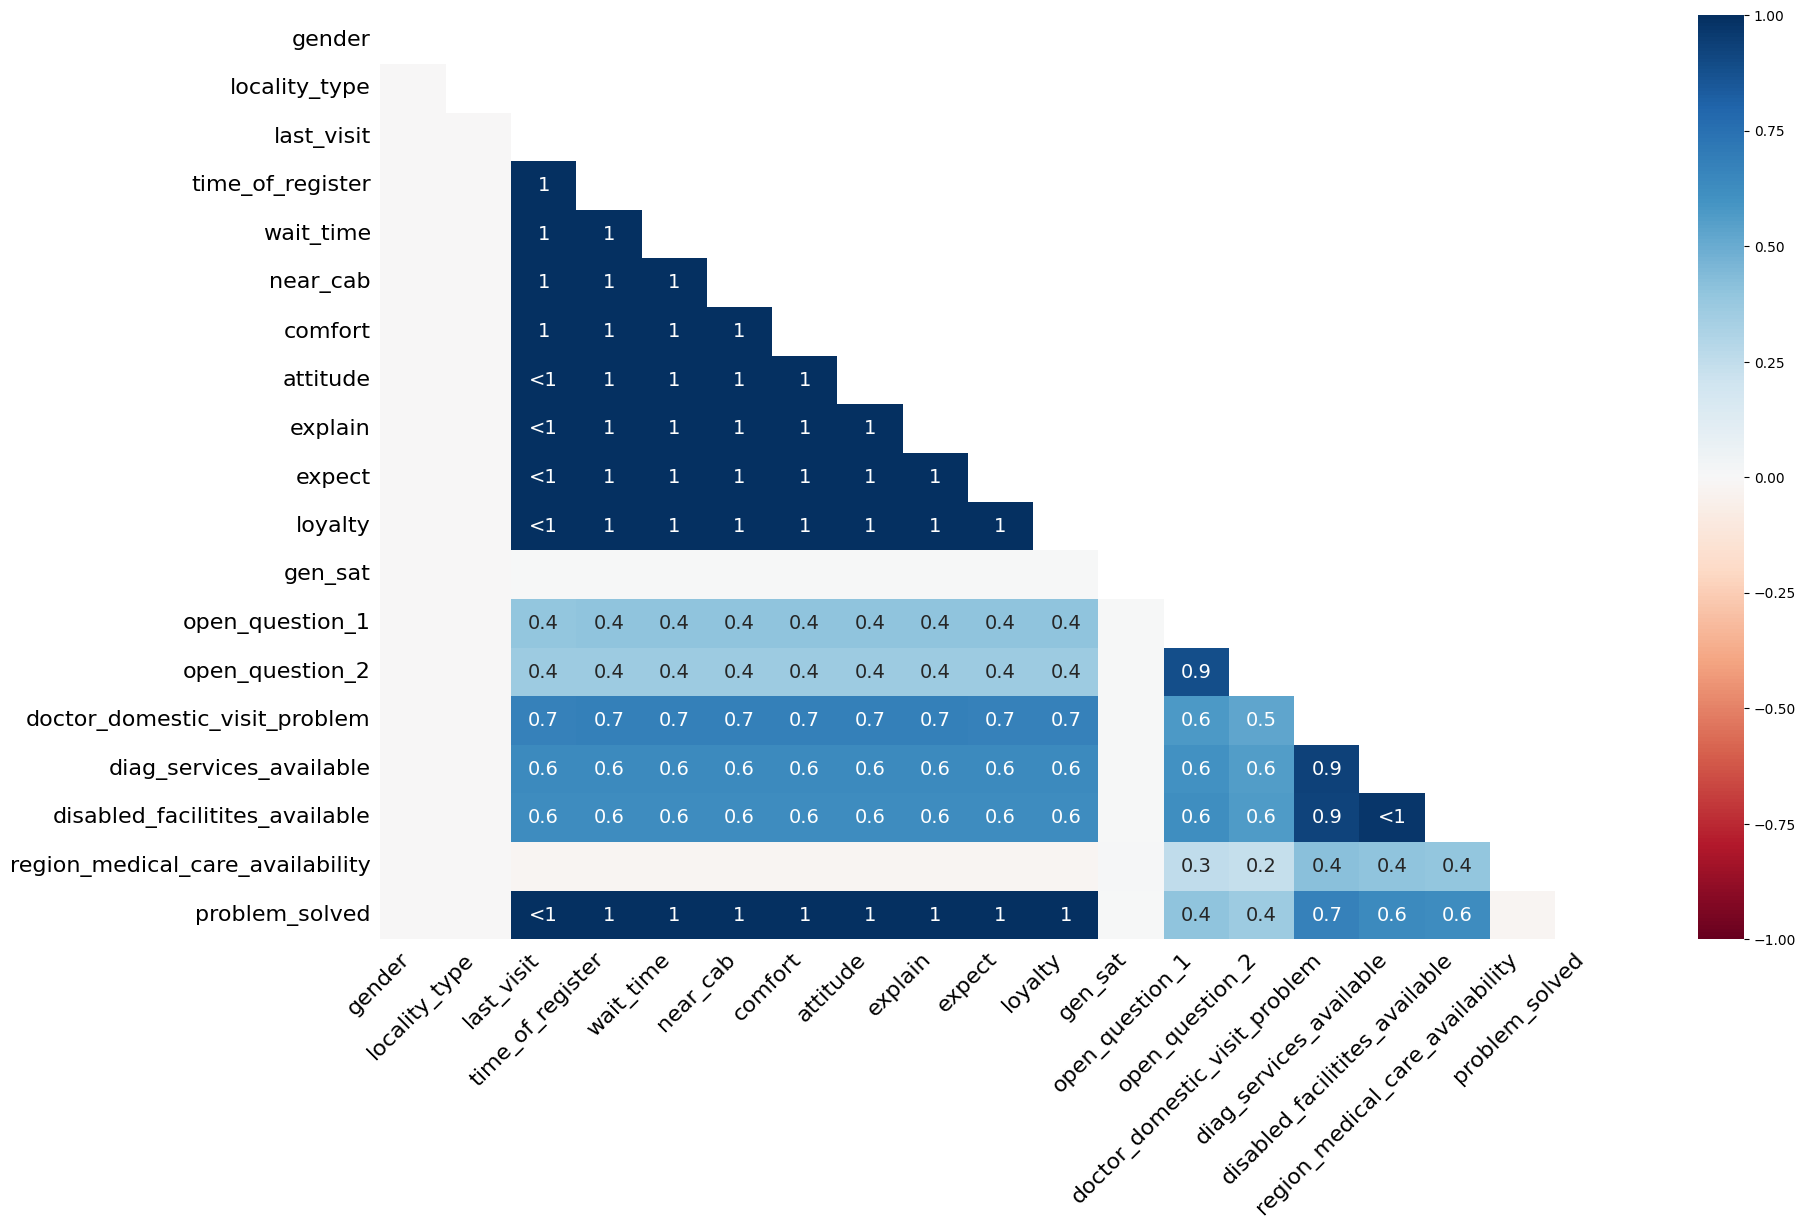

In [25]:
# можно посмтотреть, какие признаки остутствуют вместе, что свидетельствует о полностью пустых строках
import missingno as msno
msno.heatmap(df[survey_cols])
plt.show()


In [26]:
# можно удалить пустые строки
df = df.dropna(subset=['problem_solved'])
df.shape

(1208248, 27)

In [27]:
top_10_regions = df['Region'].value_counts().head(10).index
  
pivot_data = pd.pivot_table(
    df[
        (df['Region'].isin(top_10_regions)) & 
        (df['period'].isin([1, 2, 3, 4, 5, 6])) & 
        (df['year'] == 2024)
    ],
    values='gen_sat',
    index='Region',
    columns=['period','gender'],
    aggfunc=lambda x: round(((x == '4') | (x == '5')).mean() * 100, 1)
)
display(pivot_data.style
        .background_gradient(cmap='Blues', vmin=0, vmax=100)
        .format('{:.1f}%')
        )
# хи квадрат для связи между полом и оценкой
compare1 = pd.crosstab(df['gen_sat'], df['gender']) 
compare2 = pd.crosstab(df['comfort'], df['gender'])
compare3 = pd.crosstab(df['wait_time'], df['gender'])
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 30, 45, 60, 100],
                        labels=['18-30', '31-45', '46-60', '60+'])
compare4 = pd.crosstab(df['gen_sat'], df['age_group'])

chi2, p, dof, expected = chi2_contingency(compare1)  
print(f'Взаимосвязь между полом и оценкой: χ²: {chi2}, p-значение: {p}')  
chi2, p, dof, expected = chi2_contingency(compare2)  
print(f'Взаимосвязь между полом и удобством: χ²: {chi2}, p-значение: {p}') 
chi2, p, dof, expected = chi2_contingency(compare3)  
print(f'Взаимосвязь между полом и временем ожидания: χ²: {chi2}, p-значение: {p}') 
chi2, p, dof, expected = chi2_contingency(compare4)  
print(f'Взаимосвязь между возрастом и оценкой: χ²: {chi2}, p-значение: {p}') 

Взаимосвязь между полом и оценкой: χ²: 138.66839604743637, p-значение: 3.4331024931074367e-28
Взаимосвязь между полом и удобством: χ²: 668.6257456239364, p-значение: 2.980606852803821e-142
Взаимосвязь между полом и временем ожидания: χ²: 588.7431259712108, p-значение: 5.469822743065948e-125
Взаимосвязь между возрастом и оценкой: χ²: 4933.895243562416, p-значение: 0.0


In [28]:
# TODO проверить гипотезу от разной значимости признаков для женщин и мужчин, также для разных возрастов

In [29]:
# TODO могут быть подозрительные данные, когда ту же самую анекету залили в следующем периоде

In [30]:
# TODO доделать преобразование в координаты и создание карты
# df.drop_duplicates(inplace=True)
#df_sample = df.sample(n=10).copy()

In [31]:
'''
# Инициализация геокодера
geolocator = Nominatim(user_agent="geo_example")

# Название села
# location = geolocator.geocode("село Лопатино, Россия")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_sample['geo_coordinates'] = df_sample['Населенный_пункт'].progress_apply(lambda x: (None, None) if pd.isna(x) else geocode(x))


df_sample['latitude'] = df_sample['geo_coordinates'].progress_apply(lambda loc: loc.latitude if loc else None)
df_sample['longitude'] = df_sample['geo_coordinates'].progress_apply(lambda loc: loc.longitude if loc else None)


display(df_sample.head())


missing_coordinates_count = df_sample['geo_coordinates'].isnull().sum()
print(f"\nNumber of rows with missing coordinates: {missing_coordinates_count}")
'''

'\n# Инициализация геокодера\ngeolocator = Nominatim(user_agent="geo_example")\n\n# Название села\n# location = geolocator.geocode("село Лопатино, Россия")\n\ngeocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)\n\ndf_sample[\'geo_coordinates\'] = df_sample[\'Населенный_пункт\'].progress_apply(lambda x: (None, None) if pd.isna(x) else geocode(x))\n\n\ndf_sample[\'latitude\'] = df_sample[\'geo_coordinates\'].progress_apply(lambda loc: loc.latitude if loc else None)\ndf_sample[\'longitude\'] = df_sample[\'geo_coordinates\'].progress_apply(lambda loc: loc.longitude if loc else None)\n\n\ndisplay(df_sample.head())\n\n\nmissing_coordinates_count = df_sample[\'geo_coordinates\'].isnull().sum()\nprint(f"\nNumber of rows with missing coordinates: {missing_coordinates_count}")\n'

In [32]:
# TODO обработать текст open_question_1 и open_question_2
# TODO заджойнить с другими таблицами

### Feature Engineering

In [33]:
# Перевернем таргет
mapping = {'Да': 0, 'Нет': 1, 'Затрудняюсь ответить': 1}
df['problem_not_solved'] = df['problem_solved'].map(mapping)
df.shape

(1208248, 29)

In [34]:
# создадим фичи на основе вариантов Затрудняюсь ответить
columns = [
    'time_of_register', 'wait_time', 'near_cab', 'comfort',
    'attitude', 'explain', 'expect', 'loyalty', 'gen_sat',
    'diag_services_available', 'disabled_facilitites_available',
    'region_medical_care_availability'
]

for col in columns:
    df[f'{col}_difficult'] = (df[col] == 'Затрудняюсь ответить').astype(int)
    mode_value = df[col].replace('Затрудняюсь ответить', np.nan).mode()[0]
    df[col] = df[col].replace('Затрудняюсь ответить', mode_value) 

In [35]:

# Признаки удовлетворенности
satisfaction_columns = ['time_of_register', 'wait_time', 'near_cab', 'comfort',
                          'attitude', 'explain', 'expect', 'loyalty', 'gen_sat', 'region_medical_care_availability']
    

# Средняя удовлетворенность
value_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5
}
df_satisfaction = df[satisfaction_columns].replace(value_map)
df[satisfaction_columns] = df[satisfaction_columns].replace(value_map)
df['avg_satisfaction'] = df[satisfaction_columns].mean(axis=1)

# Стандартное отклонение удовлетворенности
df['satisfaction_std'] = df[satisfaction_columns].std(axis=1)
    
# Количество максимальных оценок
df['max_ratings_count'] = (df[satisfaction_columns] == 5).sum(axis=1)
    
# Количество минимальных оценок
df['min_ratings_count'] = (df[satisfaction_columns] == 1).sum(axis=1)

C:\Users\a.golub\AppData\Local\Temp\ipykernel_13792\989413473.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_satisfaction = df[satisfaction_columns].replace(value_map)
C:\Users\a.golub\AppData\Local\Temp\ipykernel_13792\989413473.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[satisfaction_columns] = df[satisfaction_columns].replace(value_map)


In [36]:
# Преобразуем last_visit в числовые значения
visit_mapping = {
        'менее 1 мес. назад': 0.5,
        'от 1 до 3 мес. назад': 2,
        'от 3 до 4 мес. назад': 3.5,
        'от 4 до 6 мес. назад': 5,
        'от 6 до 12 мес. назад': 9,
        'более 12 мес. назад': 18
}
df['last_visit_months'] = df['last_visit'].map(visit_mapping)
df['visit_frequency'] = 1 / (df['last_visit_months'] + 0.1)
# Бинарные признаки
df['is_urban'] = df['locality_type'].map({'Город': 1, 'Село': 0})
df['is_male'] = (df['gender'] == 'Мужской').astype(int)
df = df.dropna(subset=['org_type'])
df['is_state_org'] = df['org_type'].str.contains('государственных').astype(int)
# Признаки доступности услуг
df['has_home_visit_problem'] = (df['doctor_domestic_visit_problem'] == 'Да').astype(int)
df['diag_available'] = (df['diag_services_available'] == 'Да').astype(int)
df['disabled_facilities'] = (df['disabled_facilitites_available'] == 'Да').astype(int)
# Общий индекс доступности
df['accessibility_index'] = (df['has_home_visit_problem'] + 
                               df['diag_available'] + 
                               df['disabled_facilities']) / 3
    
# Индекс качества обслуживания
df['service_quality_index'] = (df['time_of_register'] + 
                                 df['wait_time'] + 
                                 df['near_cab'] + 
                                 df['comfort']) / 4
    
# Индекс взаимодействия с персоналом
df['staff_interaction_index'] = (df['attitude'] + 
                                   df['explain'] + 
                                   df['expect']) / 3
# Количество респондентов в регионе
region_counts = df['Region'].value_counts()
df['region_respondent_count'] = df['Region'].map(region_counts)
    
# Средняя удовлетворенность по региону
region_satisfaction = df.groupby('Region')['avg_satisfaction'].mean()
df['region_avg_satisfaction'] = df['Region'].map(region_satisfaction)

# Средний возраст по региону
region_age = df.groupby('Region')['age'].mean()
df['region_avg_age'] = df['Region'].map(region_age)
    
# Label Encoding (числовое кодирование)
le = LabelEncoder()
df['region_label'] = le.fit_transform(df['Region'])
# TODO изучить one code encoder, бинарный (сколько колонок потребуется чтобы закодировать 153 уникальных значения), LabelEncoder (отличие от TargetEncoder), кэшированный признак

# target encoding для problem_solved по региону
region_target_encoding = df.groupby('Region')['problem_not_solved'].agg(['mean']).reset_index()
region_problem_mapping = region_target_encoding.set_index('Region')['mean'].to_dict()
df['region_target_encoding'] = df['Region'].map(region_problem_mapping)

# Полиномиальные признаки
numeric_features = [
        'age',
        'avg_satisfaction',
        'satisfaction_std',
        'last_visit_months',
        'visit_frequency',
        'service_quality_index',
        'staff_interaction_index',
        'accessibility_index',
        'region_avg_satisfaction',
        'region_avg_age'
]

# Заполняем пропуски в числовых признаках
for feature in numeric_features:
    if feature in df.columns:
        df[feature] = df[feature].fillna(df[feature].mean())

# Создаем полиномиальные признаки степени 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numeric_features])

feature_names = poly.get_feature_names_out(numeric_features)
poly_df = pd.DataFrame(poly_features, columns=feature_names)
poly_df = poly_df.drop(columns=numeric_features) 
   
# Добавляем полиномиальные признаки к основному DataFrame
df = pd.concat([df.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)
    
# Создаем признаки взаимодействия между удовлетворенностью и демографическими характеристиками
df['satisfaction_age_interaction'] = df['avg_satisfaction'] * df['age']
df['satisfaction_urban_interaction'] = df['avg_satisfaction'] * df['is_urban']
df['satisfaction_gender_interaction'] = df['avg_satisfaction'] * df['is_male']
    
# Взаимодействие между качеством обслуживания и доступностью
df['service_access_interaction'] = df['service_quality_index'] * df['accessibility_index']
    
# Взаимодействие между частотой посещений и удовлетворенностью
df['visit_satisfaction_interaction'] = df['visit_frequency'] * df['avg_satisfaction']


In [37]:
df.shape

(1208204, 121)

### Baseline модель

Обучение моделей:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\a.golub\Documents\Coding\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a.golub\AppData\Local\Temp\ipykernel_13792\3410573543.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([

Итерация 1/10: max_iter = 50
  Accuracy: 0.8178, F1: 0.5467, ROC-AUC: 0.8275


c:\Users\a.golub\Documents\Coding\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Обучение моделей:  20%|██        | 2/10 [00:31<02:11, 16.46s/it]

Итерация 2/10: max_iter = 80
  Accuracy: 0.8178, F1: 0.5484, ROC-AUC: 0.8283


c:\Users\a.golub\Documents\Coding\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Обучение моделей:  30%|███       | 3/10 [00:57<02:23, 20.53s/it]

Итерация 3/10: max_iter = 110
  Accuracy: 0.8179, F1: 0.5487, ROC-AUC: 0.8287


c:\Users\a.golub\Documents\Coding\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Обучение моделей:  40%|████      | 4/10 [01:30<02:34, 25.75s/it]

Итерация 4/10: max_iter = 140
  Accuracy: 0.8179, F1: 0.5491, ROC-AUC: 0.8288


c:\Users\a.golub\Documents\Coding\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Обучение моделей:  50%|█████     | 5/10 [02:09<02:32, 30.41s/it]

Итерация 5/10: max_iter = 170
  Accuracy: 0.8181, F1: 0.5494, ROC-AUC: 0.8288


c:\Users\a.golub\Documents\Coding\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Обучение моделей:  60%|██████    | 6/10 [02:55<02:23, 35.76s/it]

Итерация 6/10: max_iter = 200
  Accuracy: 0.8179, F1: 0.5499, ROC-AUC: 0.8288


c:\Users\a.golub\Documents\Coding\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Обучение моделей:  70%|███████   | 7/10 [03:47<02:03, 41.13s/it]

Итерация 7/10: max_iter = 230
  Accuracy: 0.8180, F1: 0.5500, ROC-AUC: 0.8288


Обучение моделей:  80%|████████  | 8/10 [04:39<01:28, 44.31s/it]

Итерация 8/10: max_iter = 260
  Accuracy: 0.8180, F1: 0.5501, ROC-AUC: 0.8288


Обучение моделей:  90%|█████████ | 9/10 [05:29<00:46, 46.30s/it]

Итерация 9/10: max_iter = 290
  Accuracy: 0.8180, F1: 0.5501, ROC-AUC: 0.8288


Обучение моделей: 100%|██████████| 10/10 [06:21<00:00, 38.10s/it]

Итерация 10/10: max_iter = 320
  Accuracy: 0.8180, F1: 0.5501, ROC-AUC: 0.8288


max_iter   50.000   80.000   110.000  140.000  170.000  200.000  230.000  260.000  290.000  320.000
accuracy     0.818    0.818    0.818    0.818    0.818    0.818    0.818    0.818    0.818    0.818
precision    0.707    0.706    0.706    0.705    0.706    0.705    0.705    0.705    0.705    0.705
recall       0.446    0.448    0.449    0.450    0.450    0.451    0.451    0.451    0.451    0.451
f1           0.547    0.548    0.549    0.549    0.549    0.550    0.550    0.550    0.550    0.550
roc_auc      0.828    0.828    0.829    0.829    0.829    0.829    0.829    0.829    0.829    0.829

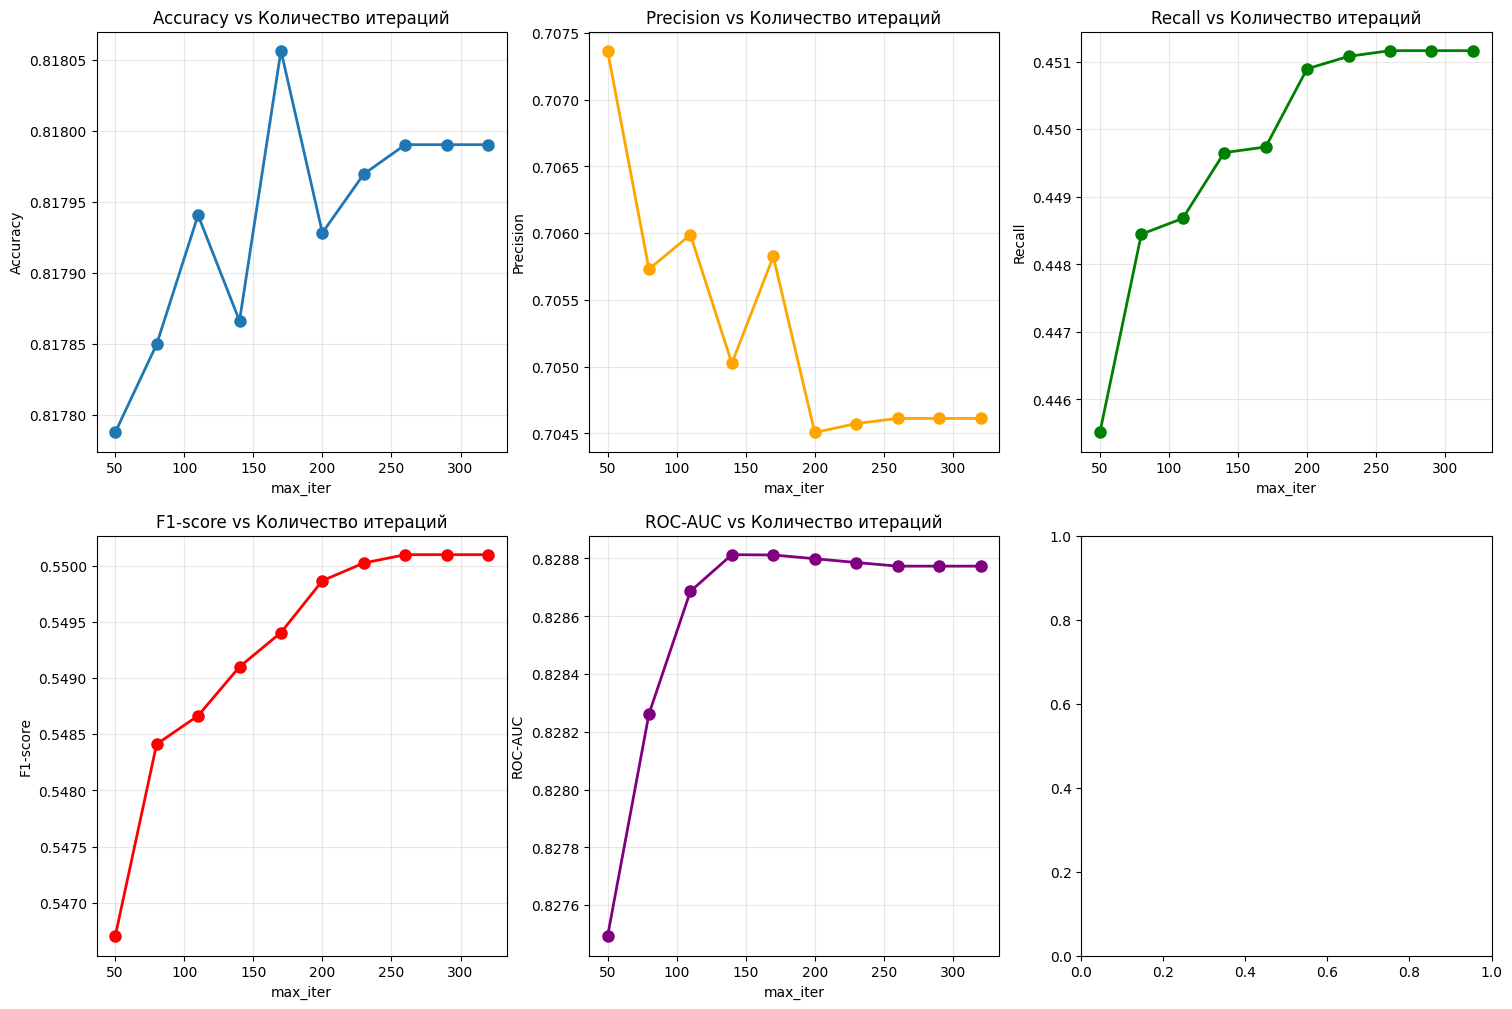

In [38]:
# Попробуем обучить модель с разным количеством итераций
columns_to_drop = [
    'locality', 'locality_type', 'org_type', 'problem_solved', 'problem_not_solved', 'open_question_1', 'open_question_2',
    'doctor_domestic_visit_problem', 'diag_services_available',
    'disabled_facilitites_available', 'last_visit', 'period', 'gender', 'Region', 'date_of_survey', 'age_group'
]

X = df.drop(columns=columns_to_drop)
y = df['problem_not_solved']

imputer = SimpleImputer(strategy='mean')
# TODO SMOTE, sklearn imbalanced

X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Параметры для цикла
n_iterations = 10
iter_increment = 30
initial_iter = 50

# Создаем DataFrame для хранения результатов
results_df = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
# Цикл обучения
for i in tqdm(range(n_iterations), desc="Обучение моделей"):
    max_iter = initial_iter + i * iter_increment
    
    # Параметры модели с изменяющимся max_iter
    model_params = {
        'C': 1.0,
        'max_iter': max_iter,
        'random_state': 42
    }
    
    # Создаем и обучаем модель
    model = LogisticRegression(**model_params)
    model.fit(X_train, y_train)
    
    # Получаем предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    
    # Вычисляем метрики
    metrics = {
        'max_iter': max_iter,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Добавляем результаты в DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
    
    # Выводим прогресс
    print(f"Итерация {i+1}/{n_iterations}: max_iter = {max_iter}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}, F1: {metrics['f1']:.4f}, ROC-AUC: {metrics['roc_auc']:.4f}")

# Создаем сводную таблицу
pivot_table = results_df.set_index('max_iter')[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']].T
display(pivot_table.round(4))

# Визуализация результатов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# График 1: Accuracy
axes[0, 0].plot(results_df['max_iter'], results_df['accuracy'], 'o-', linewidth=2, markersize=8)
axes[0, 0].set_title('Accuracy vs Количество итераций')
axes[0, 0].set_xlabel('max_iter')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].grid(True, alpha=0.3)

# График 2: Precision
axes[0, 1].plot(results_df['max_iter'], results_df['precision'], 'o-', linewidth=2, markersize=8, color='orange')
axes[0, 1].set_title('Precision vs Количество итераций')
axes[0, 1].set_xlabel('max_iter')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].grid(True, alpha=0.3)

# График 3: Recall
axes[0, 2].plot(results_df['max_iter'], results_df['recall'], 'o-', linewidth=2, markersize=8, color='green')
axes[0, 2].set_title('Recall vs Количество итераций')
axes[0, 2].set_xlabel('max_iter')
axes[0, 2].set_ylabel('Recall')
axes[0, 2].grid(True, alpha=0.3)

# График 4: F1-score
axes[1, 0].plot(results_df['max_iter'], results_df['f1'], 'o-', linewidth=2, markersize=8, color='red')
axes[1, 0].set_title('F1-score vs Количество итераций')
axes[1, 0].set_xlabel('max_iter')
axes[1, 0].set_ylabel('F1-score')
axes[1, 0].grid(True, alpha=0.3)

# График 5: ROC-AUC
axes[1, 1].plot(results_df['max_iter'], results_df['roc_auc'], 'o-', linewidth=2, markersize=8, color='purple')
axes[1, 1].set_title('ROC-AUC vs Количество итераций')
axes[1, 1].set_xlabel('max_iter')
axes[1, 1].set_ylabel('ROC-AUC')
axes[1, 1].grid(True, alpha=0.3)

🔄 Вычисление метрик при разных порогах...


Вычисление метрик: 100%|██████████| 99/99 [00:08<00:00, 11.44it/s]


✅ Оптимальные пороги найдены


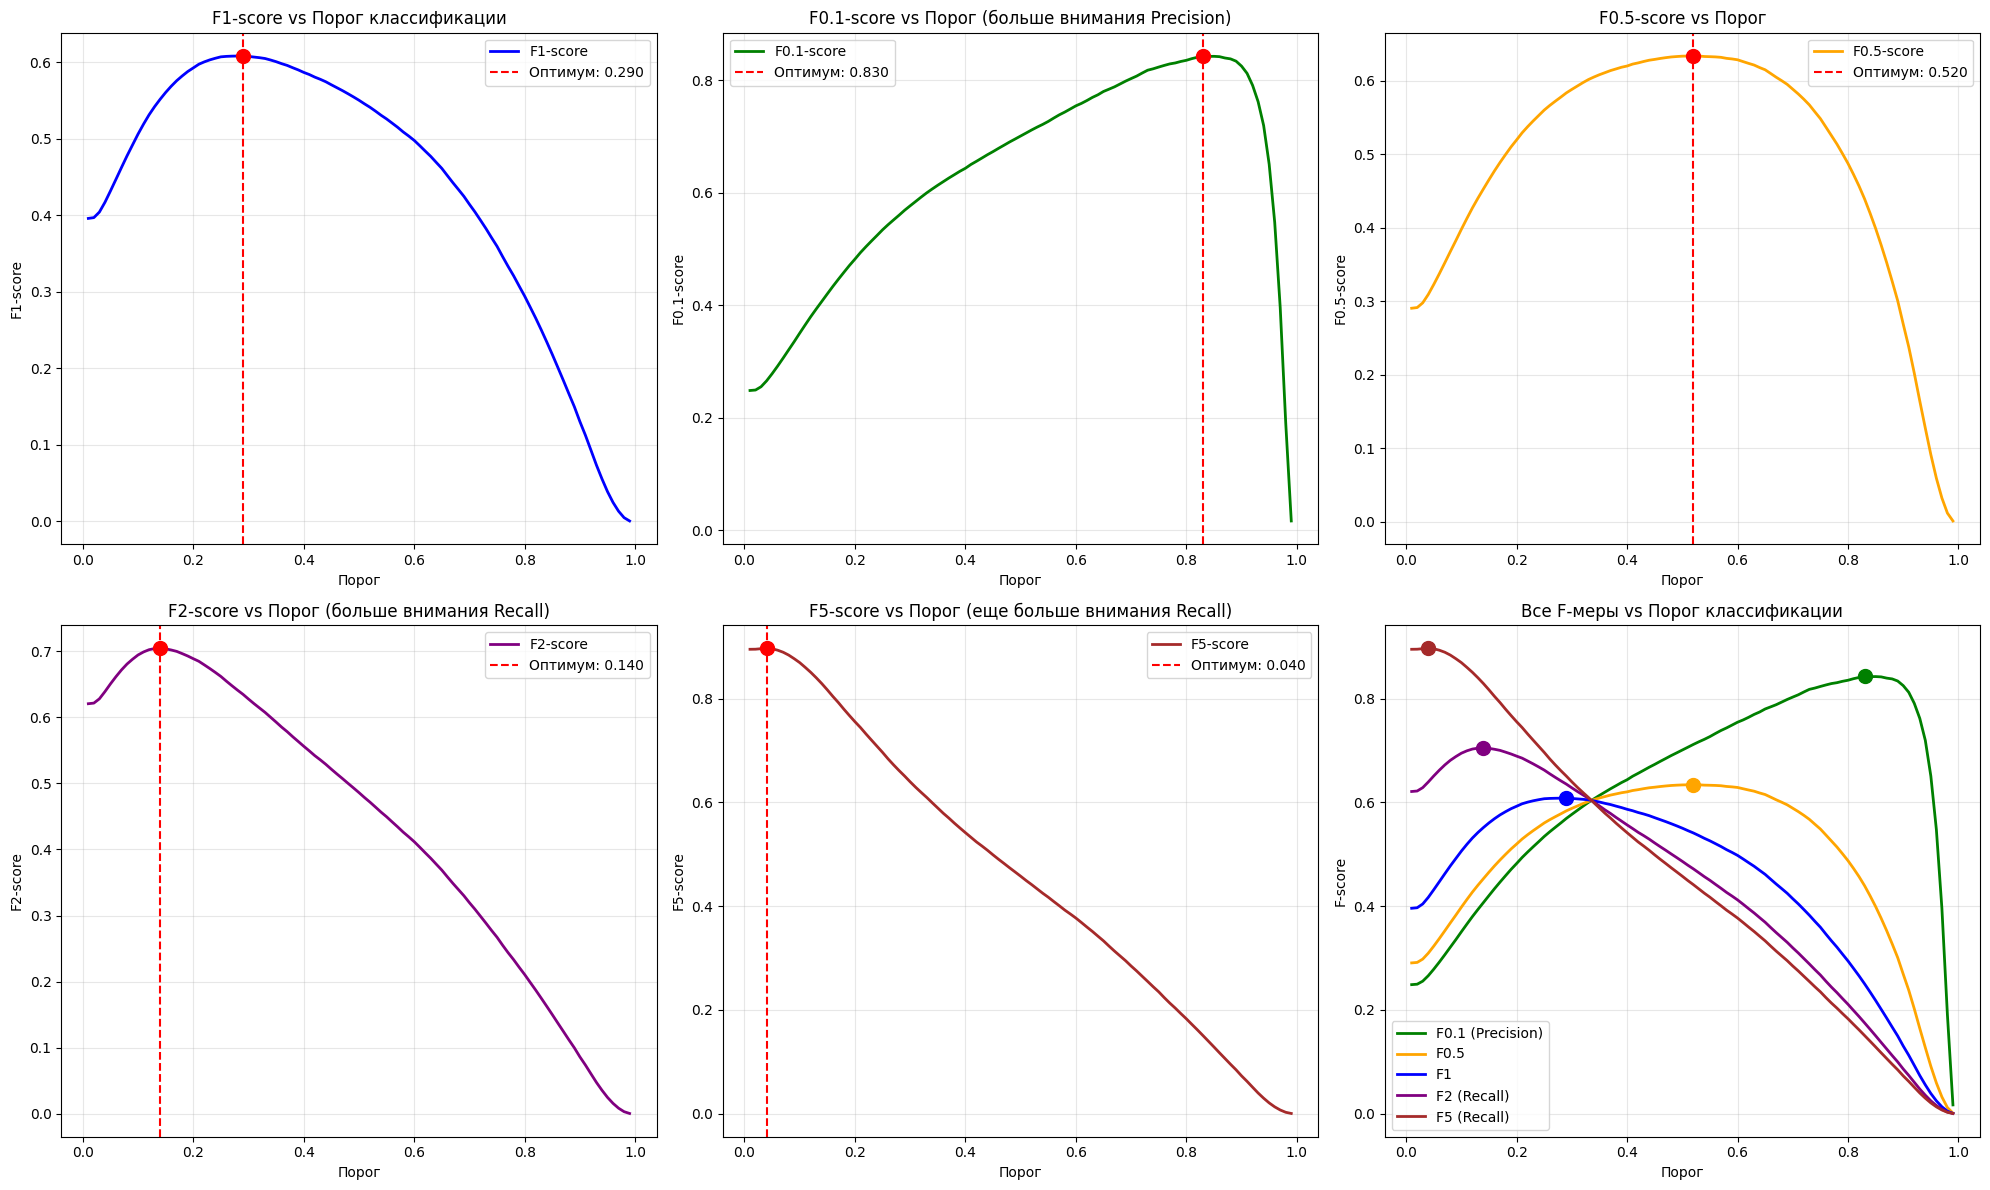


�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ


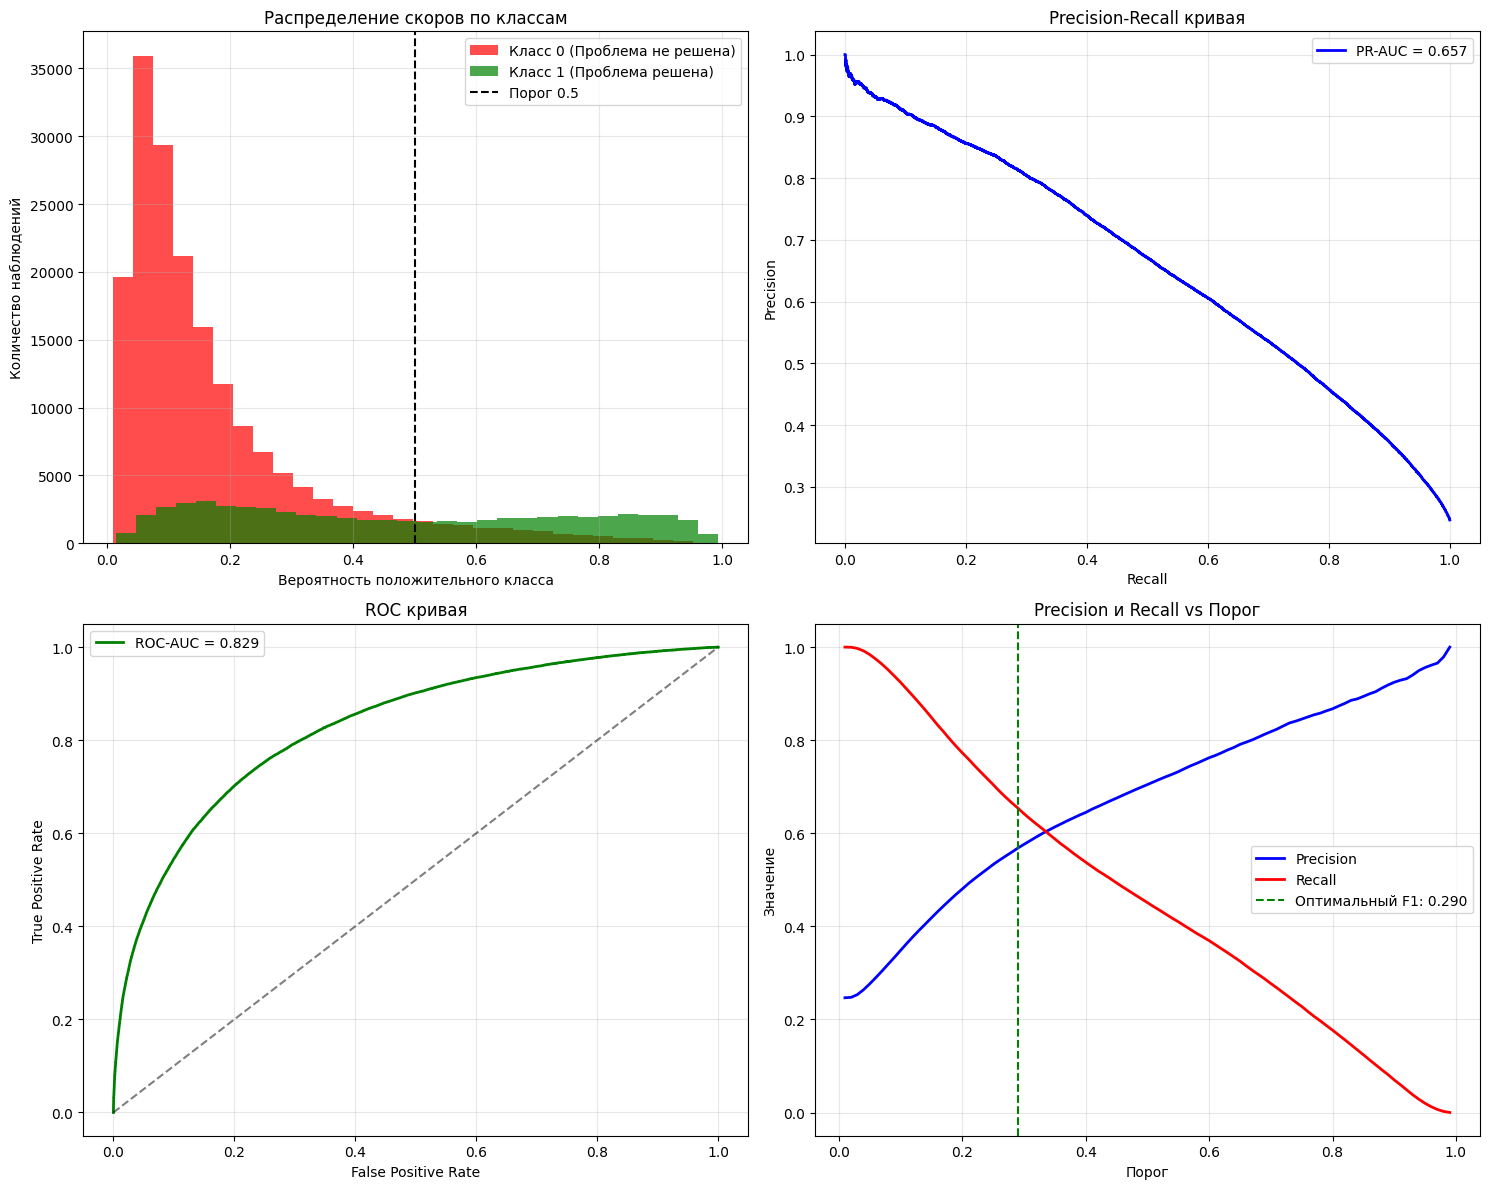

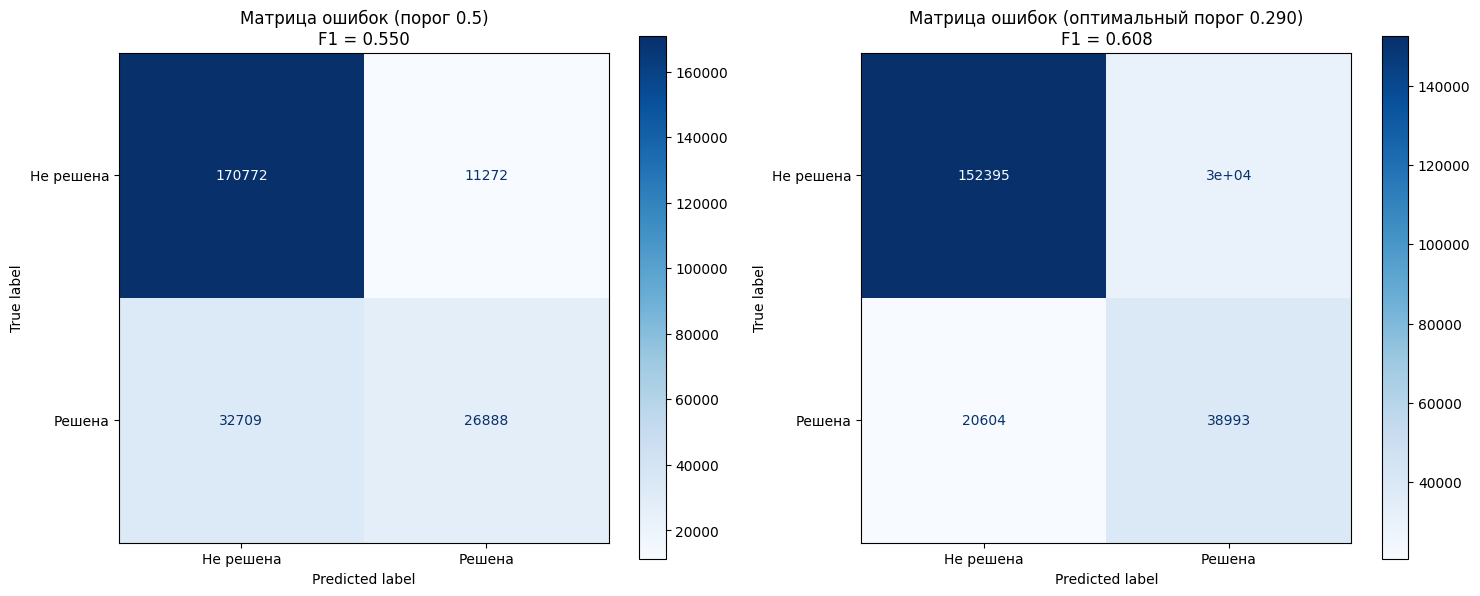


�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ
🔸 ROC-AUC: 0.8288
�� PR-AUC: 0.6571

📈 Анализ перекрытия классов:
🔸 Средний скор класса 0: 0.1730 ± 0.1631
🔸 Средний скор класса 1: 0.4724 ± 0.2802
🔸 Разность средних: 0.2994
🔸 Коэффициент разделения: 1.3057
🔸 Интерпретация: Удовлетворительная разделяющая способность

�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ
  F-мера  Оптимальный порог  F-score  Precision  Recall
0   F0.1              0.830    0.843      0.886   0.146
1   F0.5              0.520    0.634      0.716   0.435
2     F1              0.290    0.608      0.568   0.654
3     F2              0.140    0.705      0.405   0.865
4     F5              0.040    0.897      0.264   0.992

�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА
�� F0.1 (β=0.1): Больше внимания Precision
   - Используйте, если ложные срабатывания критичны
   - Оптимальный порог: 0.830

�� F0.5 (β=0.5): Умеренное внимание Precision
   - Баланс между Precision и Recall
   - Оптимальный порог: 0.520

🔸 F1 (β=1): Равное внимание Prec

In [47]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall
# Анализ F-мер и разделяющей способности модели

# Функция для вычисления F-мер с разными бета
def calculate_f_beta_score(precision, recall, beta):
    """Вычисляет F-beta score"""
    if precision + recall == 0:
        return 0
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Функция для вычисления метрик при разных порогах
def calculate_metrics_at_thresholds(y_true, y_pred_proba, thresholds):
    """Вычисляет метрики при разных порогах классификации"""
    results = []
    
    for threshold in tqdm(thresholds, desc="Вычисление метрик"):
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)
        
        # Базовые метрики
        precision = precision_score(y_true, y_pred_threshold, zero_division=0)
        recall = recall_score(y_true, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_true, y_pred_threshold, zero_division=0)
        
        # F-меры с разными бета
        f01 = calculate_f_beta_score(precision, recall, 0.1)  # Больше внимания precision
        f05 = calculate_f_beta_score(precision, recall, 0.5)  # Больше внимания precision
        f2 = calculate_f_beta_score(precision, recall, 2)     # Больше внимания recall
        f5 = calculate_f_beta_score(precision, recall, 5)     # Еще больше внимания recall
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'f01': f01,
            'f05': f05,
            'f2': f2,
            'f5': f5
        })
    
    return pd.DataFrame(results)

# Создаем пороги для анализа
thresholds = np.linspace(0.01, 0.99, 99)

print("🔄 Вычисление метрик при разных порогах...")
metrics_df = calculate_metrics_at_thresholds(y_test, y_pred_proba, thresholds)

# Находим оптимальные пороги для каждой F-меры
optimal_thresholds = {}
for metric in ['f1', 'f01', 'f05', 'f2', 'f5']:
    optimal_idx = metrics_df[metric].idxmax()
    optimal_thresholds[metric] = {
        'threshold': metrics_df.loc[optimal_idx, 'threshold'],
        'value': metrics_df.loc[optimal_idx, metric],
        'precision': metrics_df.loc[optimal_idx, 'precision'],
        'recall': metrics_df.loc[optimal_idx, 'recall']
    }

print("✅ Оптимальные пороги найдены")

# Визуализация F-мер
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# График 1: F1-score
axes[0, 0].plot(metrics_df['threshold'], metrics_df['f1'], 'b-', linewidth=2, label='F1-score')
axes[0, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='red', linestyle='--', 
                   label=f"Оптимум: {optimal_thresholds['f1']['threshold']:.3f}")
axes[0, 0].scatter(optimal_thresholds['f1']['threshold'], optimal_thresholds['f1']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 0].set_title('F1-score vs Порог классификации')
axes[0, 0].set_xlabel('Порог')
axes[0, 0].set_ylabel('F1-score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: F0.1-score (больше внимания precision)
axes[0, 1].plot(metrics_df['threshold'], metrics_df['f01'], 'g-', linewidth=2, label='F0.1-score')
axes[0, 1].axvline(x=optimal_thresholds['f01']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f01']['threshold']:.3f}")
axes[0, 1].scatter(optimal_thresholds['f01']['threshold'], optimal_thresholds['f01']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 1].set_title('F0.1-score vs Порог (больше внимания Precision)')
axes[0, 1].set_xlabel('Порог')
axes[0, 1].set_ylabel('F0.1-score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: F0.5-score
axes[0, 2].plot(metrics_df['threshold'], metrics_df['f05'], 'orange', linewidth=2, label='F0.5-score')
axes[0, 2].axvline(x=optimal_thresholds['f05']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f05']['threshold']:.3f}")
axes[0, 2].scatter(optimal_thresholds['f05']['threshold'], optimal_thresholds['f05']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 2].set_title('F0.5-score vs Порог')
axes[0, 2].set_xlabel('Порог')
axes[0, 2].set_ylabel('F0.5-score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: F2-score (больше внимания recall)
axes[1, 0].plot(metrics_df['threshold'], metrics_df['f2'], 'purple', linewidth=2, label='F2-score')
axes[1, 0].axvline(x=optimal_thresholds['f2']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f2']['threshold']:.3f}")
axes[1, 0].scatter(optimal_thresholds['f2']['threshold'], optimal_thresholds['f2']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 0].set_title('F2-score vs Порог (больше внимания Recall)')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('F2-score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 5: F5-score
axes[1, 1].plot(metrics_df['threshold'], metrics_df['f5'], 'brown', linewidth=2, label='F5-score')
axes[1, 1].axvline(x=optimal_thresholds['f5']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f5']['threshold']:.3f}")
axes[1, 1].scatter(optimal_thresholds['f5']['threshold'], optimal_thresholds['f5']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 1].set_title('F5-score vs Порог (еще больше внимания Recall)')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('F5-score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# График 6: Все F-меры на одном графике
for metric, color, label in [
    ('f01', 'green', 'F0.1 (Precision)'),
    ('f05', 'orange', 'F0.5'),
    ('f1', 'blue', 'F1'),
    ('f2', 'purple', 'F2 (Recall)'),
    ('f5', 'brown', 'F5 (Recall)')
]:
    axes[1, 2].plot(metrics_df['threshold'], metrics_df[metric], color=color, linewidth=2, label=label)
    # Отмечаем оптимальные точки
    axes[1, 2].scatter(optimal_thresholds[metric]['threshold'], optimal_thresholds[metric]['value'], 
                       color=color, s=100, zorder=5)

axes[1, 2].set_title('Все F-меры vs Порог классификации')
axes[1, 2].set_xlabel('Порог')
axes[1, 2].set_ylabel('F-score')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ разделяющей способности
print("\n" + "=" * 70)
print("�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ")
print("=" * 70)

# 1. Распределение скоров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Гистограмма скоров по классам
axes[0, 0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Класс 0 (Проблема не решена)', color='red')
axes[0, 0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Класс 1 (Проблема решена)', color='green')
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', label='Порог 0.5')
axes[0, 0].set_title('Распределение скоров по классам')
axes[0, 0].set_xlabel('Вероятность положительного класса')
axes[0, 0].set_ylabel('Количество наблюдений')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Precision-Recall кривая
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[0, 1].plot(recall, precision, 'b-', linewidth=2, label=f'PR-AUC = {pr_auc:.3f}')
axes[0, 1].set_title('Precision-Recall кривая')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: ROC кривая
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[1, 0].plot(fpr, tpr, 'g-', linewidth=2, label=f'ROC-AUC = {roc_auc:.3f}')
axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[1, 0].set_title('ROC кривая')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 4: Precision и Recall vs Порог
axes[1, 1].plot(metrics_df['threshold'], metrics_df['precision'], 'b-', linewidth=2, label='Precision')
axes[1, 1].plot(metrics_df['threshold'], metrics_df['recall'], 'r-', linewidth=2, label='Recall')
axes[1, 1].axvline(x=optimal_thresholds['f1']['threshold'], color='green', linestyle='--', 
                   label=f"Оптимальный F1: {optimal_thresholds['f1']['threshold']:.3f}")
axes[1, 1].set_title('Precision и Recall vs Порог')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Матрица ошибок для оптимального порога
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_threshold = optimal_thresholds['f1']['threshold']
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для порога 0.5
cm_default = confusion_matrix(y_test, y_pred)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Не решена', 'Решена'])
disp_default.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Матрица ошибок (порог 0.5)\nF1 = {f1_score(y_test, y_pred):.3f}')

# Матрица ошибок для оптимального порога
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['Не решена', 'Решена'])
disp_optimal.plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Матрица ошибок (оптимальный порог {optimal_threshold:.3f})\nF1 = {optimal_thresholds["f1"]["value"]:.3f}')

plt.tight_layout()
plt.show()

# 3. Статистический анализ
print("\n�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ")
print("=" * 70)

# Базовые метрики
print(f"🔸 ROC-AUC: {roc_auc:.4f}")
print(f"�� PR-AUC: {pr_auc:.4f}")

# Анализ перекрытия классов
class_0_scores = y_pred_proba[y_test == 0]
class_1_scores = y_pred_proba[y_test == 1]

print(f"\n📈 Анализ перекрытия классов:")
print(f"🔸 Средний скор класса 0: {class_0_scores.mean():.4f} ± {class_0_scores.std():.4f}")
print(f"🔸 Средний скор класса 1: {class_1_scores.mean():.4f} ± {class_1_scores.std():.4f}")
print(f"🔸 Разность средних: {class_1_scores.mean() - class_0_scores.mean():.4f}")

# Коэффициент разделения (Separation Coefficient)
separation_coef = (class_1_scores.mean() - class_0_scores.mean()) / np.sqrt((class_1_scores.var() + class_0_scores.var()) / 2)
print(f"🔸 Коэффициент разделения: {separation_coef:.4f}")

# Интерпретация коэффициента разделения
if separation_coef > 2:
    interpretation = "Отличная разделяющая способность"
elif separation_coef > 1.5:
    interpretation = "Хорошая разделяющая способность"
elif separation_coef > 1:
    interpretation = "Удовлетворительная разделяющая способность"
else:
    interpretation = "Слабая разделяющая способность"

print(f"🔸 Интерпретация: {interpretation}")

# 4. Сводная таблица оптимальных порогов
print(f"\n�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ")
print("=" * 70)

summary_table = pd.DataFrame({
    'F-мера': ['F0.1', 'F0.5', 'F1', 'F2', 'F5'],
    'Оптимальный порог': [
        optimal_thresholds['f01']['threshold'],
        optimal_thresholds['f05']['threshold'],
        optimal_thresholds['f1']['threshold'],
        optimal_thresholds['f2']['threshold'],
        optimal_thresholds['f5']['threshold']
    ],
    'F-score': [
        optimal_thresholds['f01']['value'],
        optimal_thresholds['f05']['value'],
        optimal_thresholds['f1']['value'],
        optimal_thresholds['f2']['value'],
        optimal_thresholds['f5']['value']
    ],
    'Precision': [
        optimal_thresholds['f01']['precision'],
        optimal_thresholds['f05']['precision'],
        optimal_thresholds['f1']['precision'],
        optimal_thresholds['f2']['precision'],
        optimal_thresholds['f5']['precision']
    ],
    'Recall': [
        optimal_thresholds['f01']['recall'],
        optimal_thresholds['f05']['recall'],
        optimal_thresholds['f1']['recall'],
        optimal_thresholds['f2']['recall'],
        optimal_thresholds['f5']['recall']
    ]
})

print(summary_table.round(4))

# 5. Рекомендации по выбору порога
print(f"\n�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА")
print("=" * 70)

print("�� F0.1 (β=0.1): Больше внимания Precision")
print("   - Используйте, если ложные срабатывания критичны")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f01']['threshold']))

print("\n�� F0.5 (β=0.5): Умеренное внимание Precision")
print("   - Баланс между Precision и Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f05']['threshold']))

print("\n🔸 F1 (β=1): Равное внимание Precision и Recall")
print("   - Стандартная метрика")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f1']['threshold']))

print("\n🔸 F2 (β=2): Больше внимания Recall")
print("   - Используйте, если пропуск положительных случаев критичен")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f2']['threshold']))

print("\n🔸 F5 (β=5): Еще больше внимания Recall")
print("   - Максимальное внимание Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f5']['threshold']))

# Сохранение результатов
print(f"\n💾 Сохранение результатов...")
results = {
    'optimal_thresholds': optimal_thresholds,
    'metrics_summary': summary_table.to_dict('records'),
    'model_performance': {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'separation_coefficient': separation_coef
    }
}

import json
with open('f_metrics_analysis.json', 'w') as f:
    json.dump(results, f, indent=2, default=str)

print("✅ Результаты сохранены в 'f_metrics_analysis.json'")

print("\n" + "=" * 70)
print("�� АНАЛИЗ F-МЕР И РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ ЗАВЕРШЕН!")
print("=" * 70)

🔄 Вычисление метрик при разных порогах...


Вычисление метрик: 100%|██████████| 99/99 [00:08<00:00, 11.44it/s]


✅ Оптимальные пороги найдены


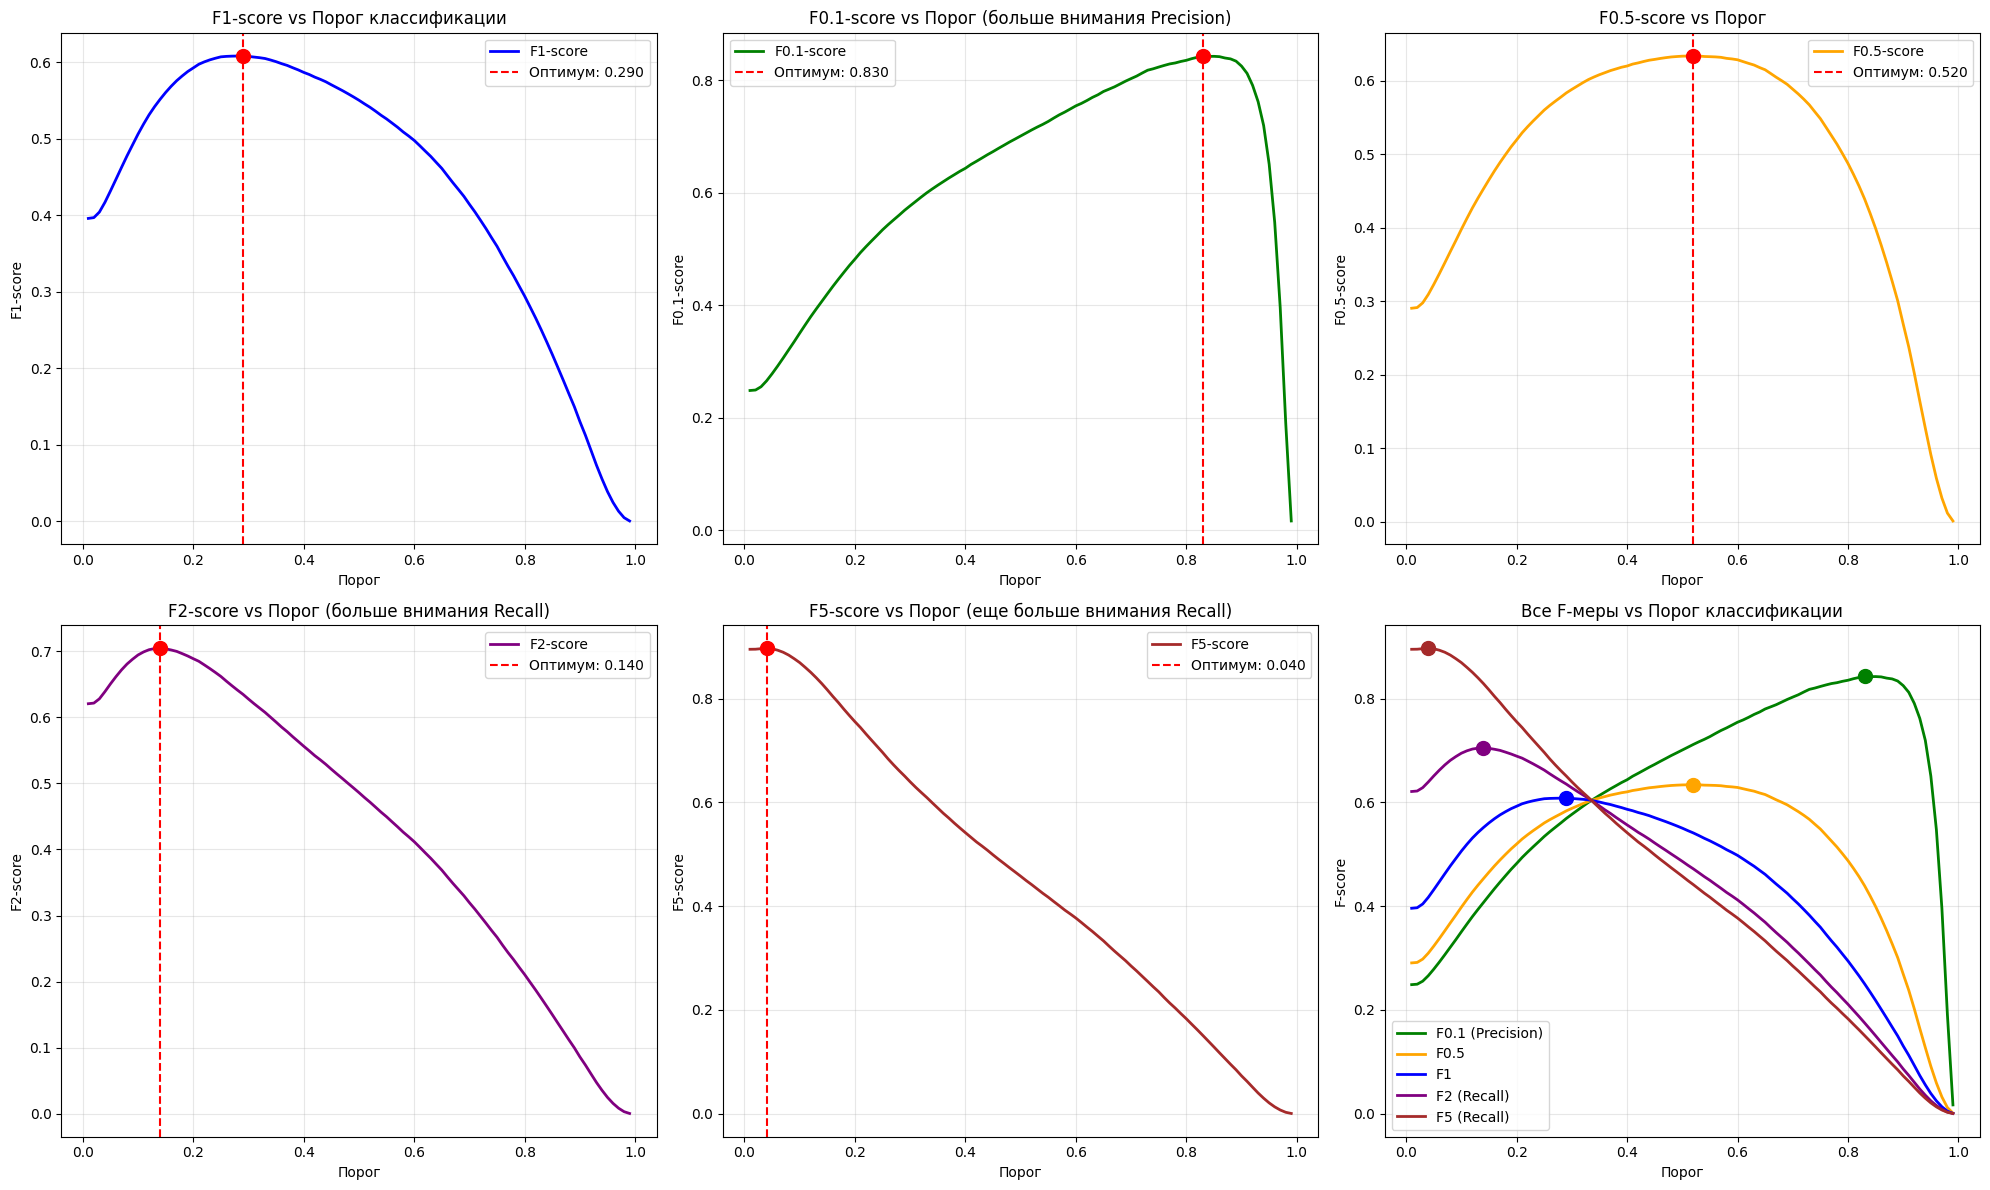


�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ


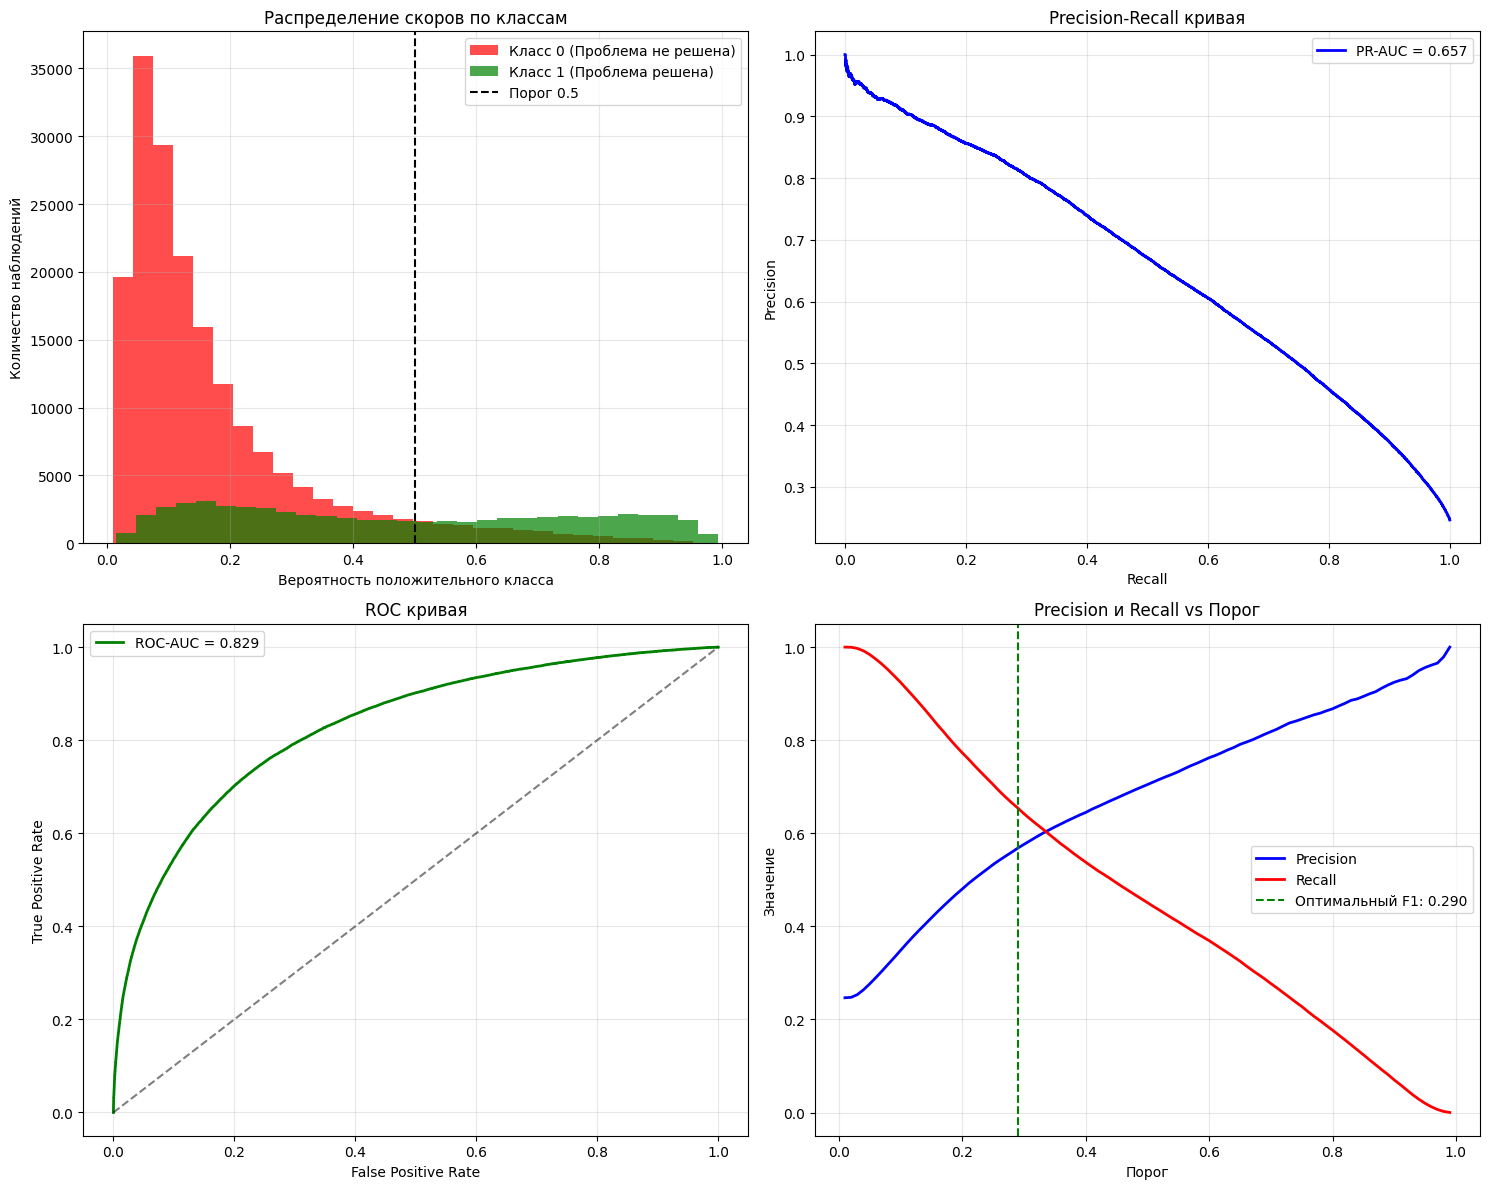

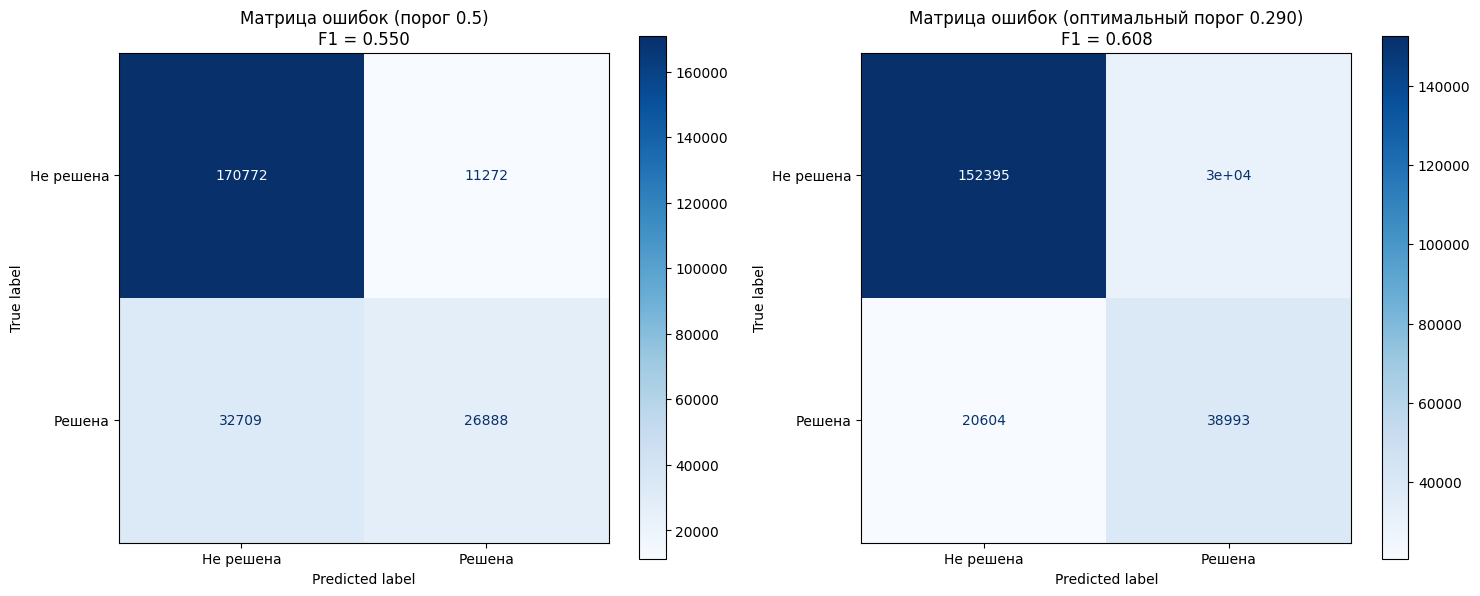


�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ
🔸 ROC-AUC: 0.8288
�� PR-AUC: 0.6571

📈 Анализ перекрытия классов:
🔸 Средний скор класса 0: 0.1730 ± 0.1631
🔸 Средний скор класса 1: 0.4724 ± 0.2802
🔸 Разность средних: 0.2994
🔸 Коэффициент разделения: 1.3057
🔸 Интерпретация: Удовлетворительная разделяющая способность

�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ
  F-мера  Оптимальный порог  F-score  Precision  Recall
0   F0.1              0.830    0.843      0.886   0.146
1   F0.5              0.520    0.634      0.716   0.435
2     F1              0.290    0.608      0.568   0.654
3     F2              0.140    0.705      0.405   0.865
4     F5              0.040    0.897      0.264   0.992

�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА
�� F0.1 (β=0.1): Больше внимания Precision
   - Используйте, если ложные срабатывания критичны
   - Оптимальный порог: 0.830

�� F0.5 (β=0.5): Умеренное внимание Precision
   - Баланс между Precision и Recall
   - Оптимальный порог: 0.520

🔸 F1 (β=1): Равное внимание Prec

In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall
# Анализ F-мер и разделяющей способности модели

# Функция для вычисления F-мер с разными бета
def calculate_f_beta_score(precision, recall, beta):
    """Вычисляет F-beta score"""
    if precision + recall == 0:
        return 0
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Функция для вычисления метрик при разных порогах
def calculate_metrics_at_thresholds(y_true, y_pred_proba, thresholds):
    """Вычисляет метрики при разных порогах классификации"""
    results = []
    
    for threshold in tqdm(thresholds, desc="Вычисление метрик"):
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)
        
        # Базовые метрики
        precision = precision_score(y_true, y_pred_threshold, zero_division=0)
        recall = recall_score(y_true, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_true, y_pred_threshold, zero_division=0)
        
        # F-меры с разными бета
        f01 = calculate_f_beta_score(precision, recall, 0.1)  # Больше внимания precision
        f05 = calculate_f_beta_score(precision, recall, 0.5)  # Больше внимания precision
        f2 = calculate_f_beta_score(precision, recall, 2)     # Больше внимания recall
        f5 = calculate_f_beta_score(precision, recall, 5)     # Еще больше внимания recall
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'f01': f01,
            'f05': f05,
            'f2': f2,
            'f5': f5
        })
    
    return pd.DataFrame(results)

# Создаем пороги для анализа
thresholds = np.linspace(0.01, 0.99, 99)

print("🔄 Вычисление метрик при разных порогах...")
metrics_df = calculate_metrics_at_thresholds(y_test, y_pred_proba, thresholds)

# Находим оптимальные пороги для каждой F-меры
optimal_thresholds = {}
for metric in ['f1', 'f01', 'f05', 'f2', 'f5']:
    optimal_idx = metrics_df[metric].idxmax()
    optimal_thresholds[metric] = {
        'threshold': metrics_df.loc[optimal_idx, 'threshold'],
        'value': metrics_df.loc[optimal_idx, metric],
        'precision': metrics_df.loc[optimal_idx, 'precision'],
        'recall': metrics_df.loc[optimal_idx, 'recall']
    }

print("✅ Оптимальные пороги найдены")

# Визуализация F-мер
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# График 1: F1-score
axes[0, 0].plot(metrics_df['threshold'], metrics_df['f1'], 'b-', linewidth=2, label='F1-score')
axes[0, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='red', linestyle='--', 
                   label=f"Оптимум: {optimal_thresholds['f1']['threshold']:.3f}")
axes[0, 0].scatter(optimal_thresholds['f1']['threshold'], optimal_thresholds['f1']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 0].set_title('F1-score vs Порог классификации')
axes[0, 0].set_xlabel('Порог')
axes[0, 0].set_ylabel('F1-score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: F0.1-score (больше внимания precision)
axes[0, 1].plot(metrics_df['threshold'], metrics_df['f01'], 'g-', linewidth=2, label='F0.1-score')
axes[0, 1].axvline(x=optimal_thresholds['f01']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f01']['threshold']:.3f}")
axes[0, 1].scatter(optimal_thresholds['f01']['threshold'], optimal_thresholds['f01']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 1].set_title('F0.1-score vs Порог (больше внимания Precision)')
axes[0, 1].set_xlabel('Порог')
axes[0, 1].set_ylabel('F0.1-score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: F0.5-score
axes[0, 2].plot(metrics_df['threshold'], metrics_df['f05'], 'orange', linewidth=2, label='F0.5-score')
axes[0, 2].axvline(x=optimal_thresholds['f05']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f05']['threshold']:.3f}")
axes[0, 2].scatter(optimal_thresholds['f05']['threshold'], optimal_thresholds['f05']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 2].set_title('F0.5-score vs Порог')
axes[0, 2].set_xlabel('Порог')
axes[0, 2].set_ylabel('F0.5-score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: F2-score (больше внимания recall)
axes[1, 0].plot(metrics_df['threshold'], metrics_df['f2'], 'purple', linewidth=2, label='F2-score')
axes[1, 0].axvline(x=optimal_thresholds['f2']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f2']['threshold']:.3f}")
axes[1, 0].scatter(optimal_thresholds['f2']['threshold'], optimal_thresholds['f2']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 0].set_title('F2-score vs Порог (больше внимания Recall)')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('F2-score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 5: F5-score
axes[1, 1].plot(metrics_df['threshold'], metrics_df['f5'], 'brown', linewidth=2, label='F5-score')
axes[1, 1].axvline(x=optimal_thresholds['f5']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f5']['threshold']:.3f}")
axes[1, 1].scatter(optimal_thresholds['f5']['threshold'], optimal_thresholds['f5']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 1].set_title('F5-score vs Порог (еще больше внимания Recall)')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('F5-score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# График 6: Все F-меры на одном графике
for metric, color, label in [
    ('f01', 'green', 'F0.1 (Precision)'),
    ('f05', 'orange', 'F0.5'),
    ('f1', 'blue', 'F1'),
    ('f2', 'purple', 'F2 (Recall)'),
    ('f5', 'brown', 'F5 (Recall)')
]:
    axes[1, 2].plot(metrics_df['threshold'], metrics_df[metric], color=color, linewidth=2, label=label)
    # Отмечаем оптимальные точки
    axes[1, 2].scatter(optimal_thresholds[metric]['threshold'], optimal_thresholds[metric]['value'], 
                       color=color, s=100, zorder=5)

axes[1, 2].set_title('Все F-меры vs Порог классификации')
axes[1, 2].set_xlabel('Порог')
axes[1, 2].set_ylabel('F-score')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ разделяющей способности
print("\n" + "=" * 70)
print("�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ")
print("=" * 70)

# 1. Распределение скоров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Гистограмма скоров по классам
axes[0, 0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Класс 0 (Проблема не решена)', color='red')
axes[0, 0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Класс 1 (Проблема решена)', color='green')
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', label='Порог 0.5')
axes[0, 0].set_title('Распределение скоров по классам')
axes[0, 0].set_xlabel('Вероятность положительного класса')
axes[0, 0].set_ylabel('Количество наблюдений')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Precision-Recall кривая
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[0, 1].plot(recall, precision, 'b-', linewidth=2, label=f'PR-AUC = {pr_auc:.3f}')
axes[0, 1].set_title('Precision-Recall кривая')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: ROC кривая
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[1, 0].plot(fpr, tpr, 'g-', linewidth=2, label=f'ROC-AUC = {roc_auc:.3f}')
axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[1, 0].set_title('ROC кривая')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 4: Precision и Recall vs Порог
axes[1, 1].plot(metrics_df['threshold'], metrics_df['precision'], 'b-', linewidth=2, label='Precision')
axes[1, 1].plot(metrics_df['threshold'], metrics_df['recall'], 'r-', linewidth=2, label='Recall')
axes[1, 1].axvline(x=optimal_thresholds['f1']['threshold'], color='green', linestyle='--', 
                   label=f"Оптимальный F1: {optimal_thresholds['f1']['threshold']:.3f}")
axes[1, 1].set_title('Precision и Recall vs Порог')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Матрица ошибок для оптимального порога
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_threshold = optimal_thresholds['f1']['threshold']
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для порога 0.5
cm_default = confusion_matrix(y_test, y_pred)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Не решена', 'Решена'])
disp_default.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Матрица ошибок (порог 0.5)\nF1 = {f1_score(y_test, y_pred):.3f}')

# Матрица ошибок для оптимального порога
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['Не решена', 'Решена'])
disp_optimal.plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Матрица ошибок (оптимальный порог {optimal_threshold:.3f})\nF1 = {optimal_thresholds["f1"]["value"]:.3f}')

plt.tight_layout()
plt.show()

# 3. Статистический анализ
print("\n�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ")
print("=" * 70)

# Базовые метрики
print(f"🔸 ROC-AUC: {roc_auc:.4f}")
print(f"�� PR-AUC: {pr_auc:.4f}")

# Анализ перекрытия классов
class_0_scores = y_pred_proba[y_test == 0]
class_1_scores = y_pred_proba[y_test == 1]

print(f"\n📈 Анализ перекрытия классов:")
print(f"🔸 Средний скор класса 0: {class_0_scores.mean():.4f} ± {class_0_scores.std():.4f}")
print(f"🔸 Средний скор класса 1: {class_1_scores.mean():.4f} ± {class_1_scores.std():.4f}")
print(f"🔸 Разность средних: {class_1_scores.mean() - class_0_scores.mean():.4f}")

# Коэффициент разделения (Separation Coefficient)
separation_coef = (class_1_scores.mean() - class_0_scores.mean()) / np.sqrt((class_1_scores.var() + class_0_scores.var()) / 2)
print(f"🔸 Коэффициент разделения: {separation_coef:.4f}")

# Интерпретация коэффициента разделения
if separation_coef > 2:
    interpretation = "Отличная разделяющая способность"
elif separation_coef > 1.5:
    interpretation = "Хорошая разделяющая способность"
elif separation_coef > 1:
    interpretation = "Удовлетворительная разделяющая способность"
else:
    interpretation = "Слабая разделяющая способность"

print(f"🔸 Интерпретация: {interpretation}")

# 4. Сводная таблица оптимальных порогов
print(f"\n�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ")
print("=" * 70)

summary_table = pd.DataFrame({
    'F-мера': ['F0.1', 'F0.5', 'F1', 'F2', 'F5'],
    'Оптимальный порог': [
        optimal_thresholds['f01']['threshold'],
        optimal_thresholds['f05']['threshold'],
        optimal_thresholds['f1']['threshold'],
        optimal_thresholds['f2']['threshold'],
        optimal_thresholds['f5']['threshold']
    ],
    'F-score': [
        optimal_thresholds['f01']['value'],
        optimal_thresholds['f05']['value'],
        optimal_thresholds['f1']['value'],
        optimal_thresholds['f2']['value'],
        optimal_thresholds['f5']['value']
    ],
    'Precision': [
        optimal_thresholds['f01']['precision'],
        optimal_thresholds['f05']['precision'],
        optimal_thresholds['f1']['precision'],
        optimal_thresholds['f2']['precision'],
        optimal_thresholds['f5']['precision']
    ],
    'Recall': [
        optimal_thresholds['f01']['recall'],
        optimal_thresholds['f05']['recall'],
        optimal_thresholds['f1']['recall'],
        optimal_thresholds['f2']['recall'],
        optimal_thresholds['f5']['recall']
    ]
})

print(summary_table.round(4))

# 5. Рекомендации по выбору порога
print(f"\n�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА")
print("=" * 70)

print("�� F0.1 (β=0.1): Больше внимания Precision")
print("   - Используйте, если ложные срабатывания критичны")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f01']['threshold']))

print("\n�� F0.5 (β=0.5): Умеренное внимание Precision")
print("   - Баланс между Precision и Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f05']['threshold']))

print("\n🔸 F1 (β=1): Равное внимание Precision и Recall")
print("   - Стандартная метрика")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f1']['threshold']))

print("\n🔸 F2 (β=2): Больше внимания Recall")
print("   - Используйте, если пропуск положительных случаев критичен")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f2']['threshold']))

print("\n🔸 F5 (β=5): Еще больше внимания Recall")
print("   - Максимальное внимание Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f5']['threshold']))

# Сохранение результатов
print(f"\n💾 Сохранение результатов...")
results = {
    'optimal_thresholds': optimal_thresholds,
    'metrics_summary': summary_table.to_dict('records'),
    'model_performance': {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'separation_coefficient': separation_coef
    }
}

import json
with open('f_metrics_analysis.json', 'w') as f:
    json.dump(results, f, indent=2, default=str)

print("✅ Результаты сохранены в 'f_metrics_analysis.json'")

print("\n" + "=" * 70)
print("�� АНАЛИЗ F-МЕР И РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ ЗАВЕРШЕН!")
print("=" * 70)

🔄 Вычисление метрик при разных порогах...


Вычисление метрик: 100%|██████████| 99/99 [00:07<00:00, 12.54it/s]


✅ Оптимальные пороги найдены


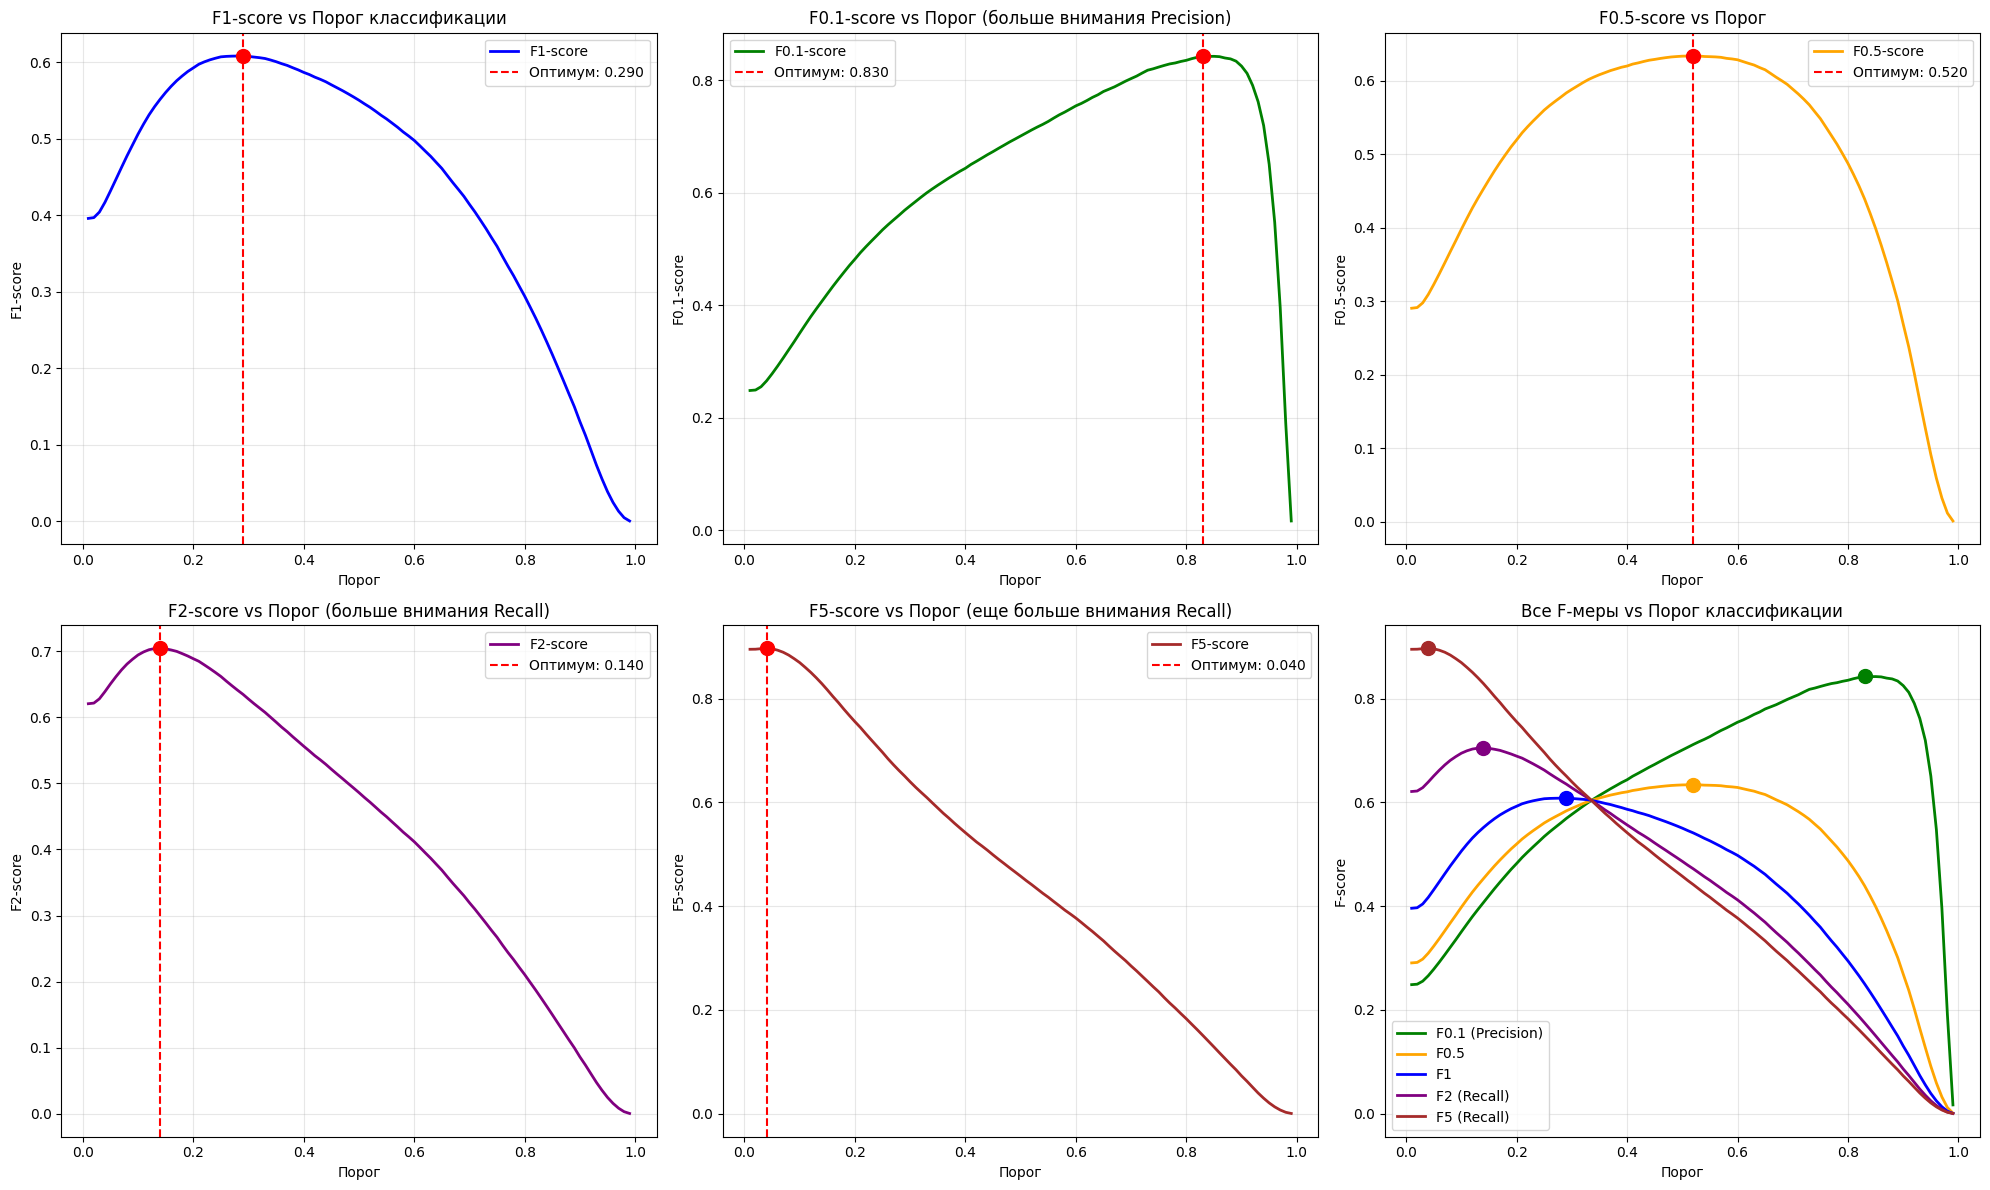


�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ


IndexError: index 2 is out of bounds for axis 1 with size 2

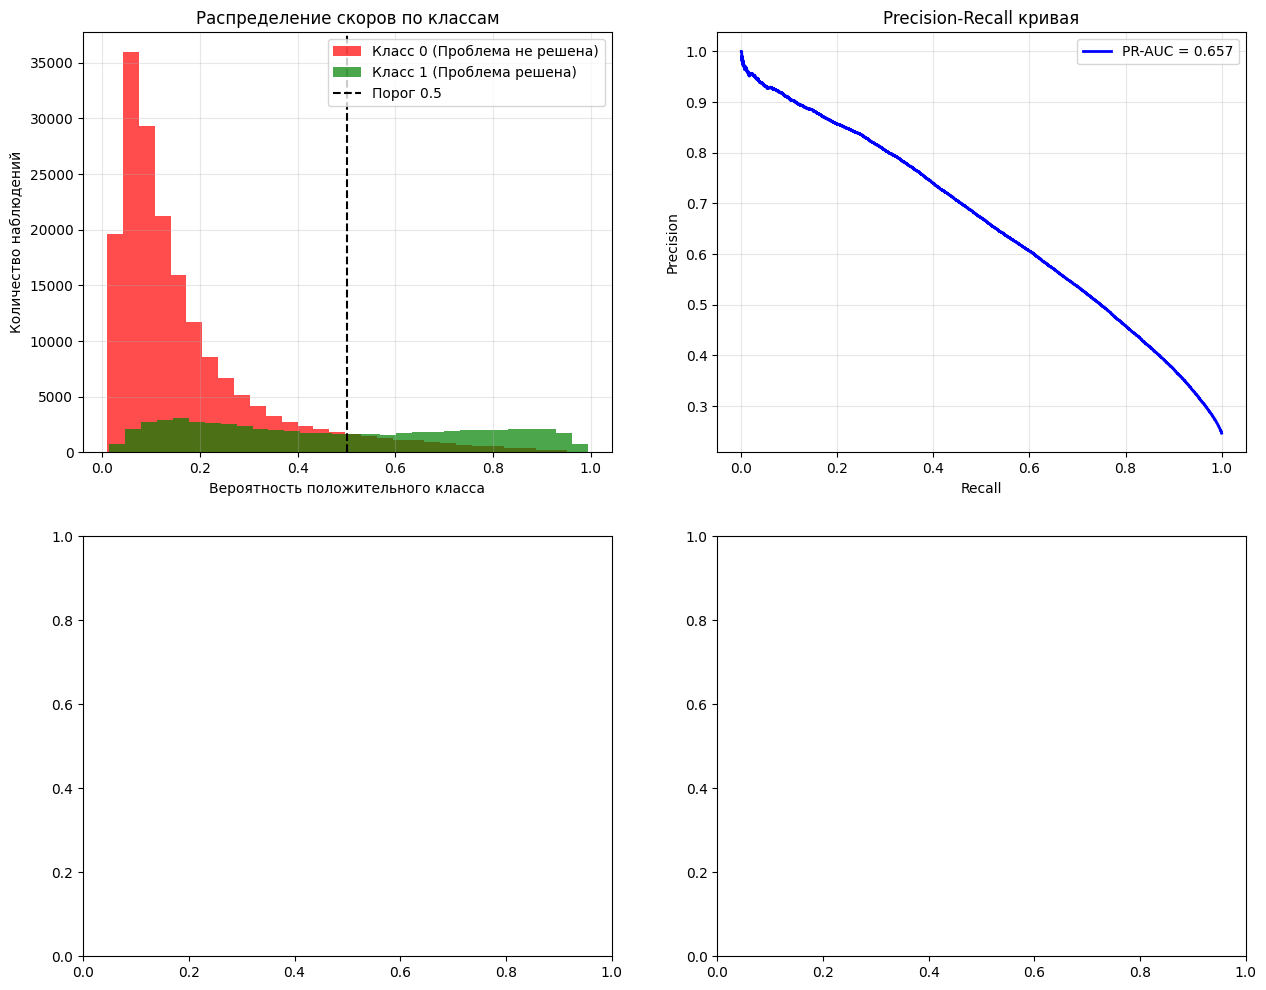

In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall
# Анализ F-мер и разделяющей способности модели

# Функция для вычисления F-мер с разными бета
def calculate_f_beta_score(precision, recall, beta):
    """Вычисляет F-beta score"""
    if precision + recall == 0:
        return 0
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Функция для вычисления метрик при разных порогах
def calculate_metrics_at_thresholds(y_true, y_pred_proba, thresholds):
    """Вычисляет метрики при разных порогах классификации"""
    results = []
    
    for threshold in tqdm(thresholds, desc="Вычисление метрик"):
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)
        
        # Базовые метрики
        precision = precision_score(y_true, y_pred_threshold, zero_division=0)
        recall = recall_score(y_true, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_true, y_pred_threshold, zero_division=0)
        
        # F-меры с разными бета
        f01 = calculate_f_beta_score(precision, recall, 0.1)  # Больше внимания precision
        f05 = calculate_f_beta_score(precision, recall, 0.5)  # Больше внимания precision
        f2 = calculate_f_beta_score(precision, recall, 2)     # Больше внимания recall
        f5 = calculate_f_beta_score(precision, recall, 5)     # Еще больше внимания recall
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'f01': f01,
            'f05': f05,
            'f2': f2,
            'f5': f5
        })
    
    return pd.DataFrame(results)

# Создаем пороги для анализа
thresholds = np.linspace(0.01, 0.99, 99)

print("🔄 Вычисление метрик при разных порогах...")
metrics_df = calculate_metrics_at_thresholds(y_test, y_pred_proba, thresholds)

# Находим оптимальные пороги для каждой F-меры
optimal_thresholds = {}
for metric in ['f1', 'f01', 'f05', 'f2', 'f5']:
    optimal_idx = metrics_df[metric].idxmax()
    optimal_thresholds[metric] = {
        'threshold': metrics_df.loc[optimal_idx, 'threshold'],
        'value': metrics_df.loc[optimal_idx, metric],
        'precision': metrics_df.loc[optimal_idx, 'precision'],
        'recall': metrics_df.loc[optimal_idx, 'recall']
    }

print("✅ Оптимальные пороги найдены")

# Визуализация F-мер
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# График 1: F1-score
axes[0, 0].plot(metrics_df['threshold'], metrics_df['f1'], 'b-', linewidth=2, label='F1-score')
axes[0, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='red', linestyle='--', 
                   label=f"Оптимум: {optimal_thresholds['f1']['threshold']:.3f}")
axes[0, 0].scatter(optimal_thresholds['f1']['threshold'], optimal_thresholds['f1']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 0].set_title('F1-score vs Порог классификации')
axes[0, 0].set_xlabel('Порог')
axes[0, 0].set_ylabel('F1-score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: F0.1-score (больше внимания precision)
axes[0, 1].plot(metrics_df['threshold'], metrics_df['f01'], 'g-', linewidth=2, label='F0.1-score')
axes[0, 1].axvline(x=optimal_thresholds['f01']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f01']['threshold']:.3f}")
axes[0, 1].scatter(optimal_thresholds['f01']['threshold'], optimal_thresholds['f01']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 1].set_title('F0.1-score vs Порог (больше внимания Precision)')
axes[0, 1].set_xlabel('Порог')
axes[0, 1].set_ylabel('F0.1-score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: F0.5-score
axes[0, 2].plot(metrics_df['threshold'], metrics_df['f05'], 'orange', linewidth=2, label='F0.5-score')
axes[0, 2].axvline(x=optimal_thresholds['f05']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f05']['threshold']:.3f}")
axes[0, 2].scatter(optimal_thresholds['f05']['threshold'], optimal_thresholds['f05']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 2].set_title('F0.5-score vs Порог')
axes[0, 2].set_xlabel('Порог')
axes[0, 2].set_ylabel('F0.5-score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: F2-score (больше внимания recall)
axes[1, 0].plot(metrics_df['threshold'], metrics_df['f2'], 'purple', linewidth=2, label='F2-score')
axes[1, 0].axvline(x=optimal_thresholds['f2']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f2']['threshold']:.3f}")
axes[1, 0].scatter(optimal_thresholds['f2']['threshold'], optimal_thresholds['f2']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 0].set_title('F2-score vs Порог (больше внимания Recall)')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('F2-score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 5: F5-score
axes[1, 1].plot(metrics_df['threshold'], metrics_df['f5'], 'brown', linewidth=2, label='F5-score')
axes[1, 1].axvline(x=optimal_thresholds['f5']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f5']['threshold']:.3f}")
axes[1, 1].scatter(optimal_thresholds['f5']['threshold'], optimal_thresholds['f5']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 1].set_title('F5-score vs Порог (еще больше внимания Recall)')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('F5-score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# График 6: Все F-меры на одном графике
for metric, color, label in [
    ('f01', 'green', 'F0.1 (Precision)'),
    ('f05', 'orange', 'F0.5'),
    ('f1', 'blue', 'F1'),
    ('f2', 'purple', 'F2 (Recall)'),
    ('f5', 'brown', 'F5 (Recall)')
]:
    axes[1, 2].plot(metrics_df['threshold'], metrics_df[metric], color=color, linewidth=2, label=label)
    # Отмечаем оптимальные точки
    axes[1, 2].scatter(optimal_thresholds[metric]['threshold'], optimal_thresholds[metric]['value'], 
                       color=color, s=100, zorder=5)

axes[1, 2].set_title('Все F-меры vs Порог классификации')
axes[1, 2].set_xlabel('Порог')
axes[1, 2].set_ylabel('F-score')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ разделяющей способности
print("\n" + "=" * 70)
print("�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ")
print("=" * 70)

# 1. Распределение скоров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Гистограмма скоров по классам
axes[0, 0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Класс 0 (Проблема не решена)', color='red')
axes[0, 0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Класс 1 (Проблема решена)', color='green')
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', label='Порог 0.5')
axes[0, 0].set_title('Распределение скоров по классам')
axes[0, 0].set_xlabel('Вероятность положительного класса')
axes[0, 0].set_ylabel('Количество наблюдений')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Precision-Recall кривая
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[0, 1].plot(recall, precision, 'b-', linewidth=2, label=f'PR-AUC = {pr_auc:.3f}')
axes[0, 1].set_title('Precision-Recall кривая')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: ROC кривая
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[0, 2].plot(fpr, tpr, 'g-', linewidth=2, label=f'ROC-AUC = {roc_auc:.3f}')
axes[0, 2].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 2].set_title('ROC кривая')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: Precision и Recall vs Порог
axes[1, 0].plot(metrics_df['threshold'], metrics_df['precision'], 'b-', linewidth=2, label='Precision')
axes[1, 0].plot(metrics_df['threshold'], metrics_df['recall'], 'r-', linewidth=2, label='Recall')
axes[1, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='green', linestyle='--', 
                   label=f"Оптимальный F1: {optimal_thresholds['f1']['threshold']:.3f}")
axes[1, 0].set_title('Precision и Recall vs Порог')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Матрица ошибок для оптимального порога
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_threshold = optimal_thresholds['f1']['threshold']
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для порога 0.5
cm_default = confusion_matrix(y_test, y_pred)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Не решена', 'Решена'])
disp_default.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Матрица ошибок (порог 0.5)\nF1 = {f1_score(y_test, y_pred):.3f}')

# Матрица ошибок для оптимального порога
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['Не решена', 'Решена'])
disp_optimal.plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Матрица ошибок (оптимальный порог {optimal_threshold:.3f})\nF1 = {optimal_thresholds["f1"]["value"]:.3f}')

plt.tight_layout()
plt.show()

# 3. Статистический анализ
print("\n�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ")
print("=" * 70)

# Базовые метрики
print(f"🔸 ROC-AUC: {roc_auc:.4f}")
print(f"�� PR-AUC: {pr_auc:.4f}")

# Анализ перекрытия классов
class_0_scores = y_pred_proba[y_test == 0]
class_1_scores = y_pred_proba[y_test == 1]

print(f"\n📈 Анализ перекрытия классов:")
print(f"🔸 Средний скор класса 0: {class_0_scores.mean():.4f} ± {class_0_scores.std():.4f}")
print(f"🔸 Средний скор класса 1: {class_1_scores.mean():.4f} ± {class_1_scores.std():.4f}")
print(f"🔸 Разность средних: {class_1_scores.mean() - class_0_scores.mean():.4f}")

# Коэффициент разделения (Separation Coefficient)
separation_coef = (class_1_scores.mean() - class_0_scores.mean()) / np.sqrt((class_1_scores.var() + class_0_scores.var()) / 2)
print(f"🔸 Коэффициент разделения: {separation_coef:.4f}")

# Интерпретация коэффициента разделения
if separation_coef > 2:
    interpretation = "Отличная разделяющая способность"
elif separation_coef > 1.5:
    interpretation = "Хорошая разделяющая способность"
elif separation_coef > 1:
    interpretation = "Удовлетворительная разделяющая способность"
else:
    interpretation = "Слабая разделяющая способность"

print(f"🔸 Интерпретация: {interpretation}")

# 4. Сводная таблица оптимальных порогов
print(f"\n�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ")
print("=" * 70)

summary_table = pd.DataFrame({
    'F-мера': ['F0.1', 'F0.5', 'F1', 'F2', 'F5'],
    'Оптимальный порог': [
        optimal_thresholds['f01']['threshold'],
        optimal_thresholds['f05']['threshold'],
        optimal_thresholds['f1']['threshold'],
        optimal_thresholds['f2']['threshold'],
        optimal_thresholds['f5']['threshold']
    ],
    'F-score': [
        optimal_thresholds['f01']['value'],
        optimal_thresholds['f05']['value'],
        optimal_thresholds['f1']['value'],
        optimal_thresholds['f2']['value'],
        optimal_thresholds['f5']['value']
    ],
    'Precision': [
        optimal_thresholds['f01']['precision'],
        optimal_thresholds['f05']['precision'],
        optimal_thresholds['f1']['precision'],
        optimal_thresholds['f2']['precision'],
        optimal_thresholds['f5']['precision']
    ],
    'Recall': [
        optimal_thresholds['f01']['recall'],
        optimal_thresholds['f05']['recall'],
        optimal_thresholds['f1']['recall'],
        optimal_thresholds['f2']['recall'],
        optimal_thresholds['f5']['recall']
    ]
})

print(summary_table.round(4))

# 5. Рекомендации по выбору порога
print(f"\n�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА")
print("=" * 70)

print("�� F0.1 (β=0.1): Больше внимания Precision")
print("   - Используйте, если ложные срабатывания критичны")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f01']['threshold']))

print("\n�� F0.5 (β=0.5): Умеренное внимание Precision")
print("   - Баланс между Precision и Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f05']['threshold']))

print("\n🔸 F1 (β=1): Равное внимание Precision и Recall")
print("   - Стандартная метрика")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f1']['threshold']))

print("\n🔸 F2 (β=2): Больше внимания Recall")
print("   - Используйте, если пропуск положительных случаев критичен")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f2']['threshold']))

print("\n🔸 F5 (β=5): Еще больше внимания Recall")
print("   - Максимальное внимание Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f5']['threshold']))

# Сохранение результатов
print(f"\n💾 Сохранение результатов...")
results = {
    'optimal_thresholds': optimal_thresholds,
    'metrics_summary': summary_table.to_dict('records'),
    'model_performance': {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'separation_coefficient': separation_coef
    }
}

import json
with open('f_metrics_analysis.json', 'w') as f:
    json.dump(results, f, indent=2, default=str)

print("✅ Результаты сохранены в 'f_metrics_analysis.json'")

print("\n" + "=" * 70)
print("�� АНАЛИЗ F-МЕР И РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ ЗАВЕРШЕН!")
print("=" * 70)

🔄 Вычисление метрик при разных порогах...


Вычисление метрик: 100%|██████████| 99/99 [00:07<00:00, 12.54it/s]


✅ Оптимальные пороги найдены


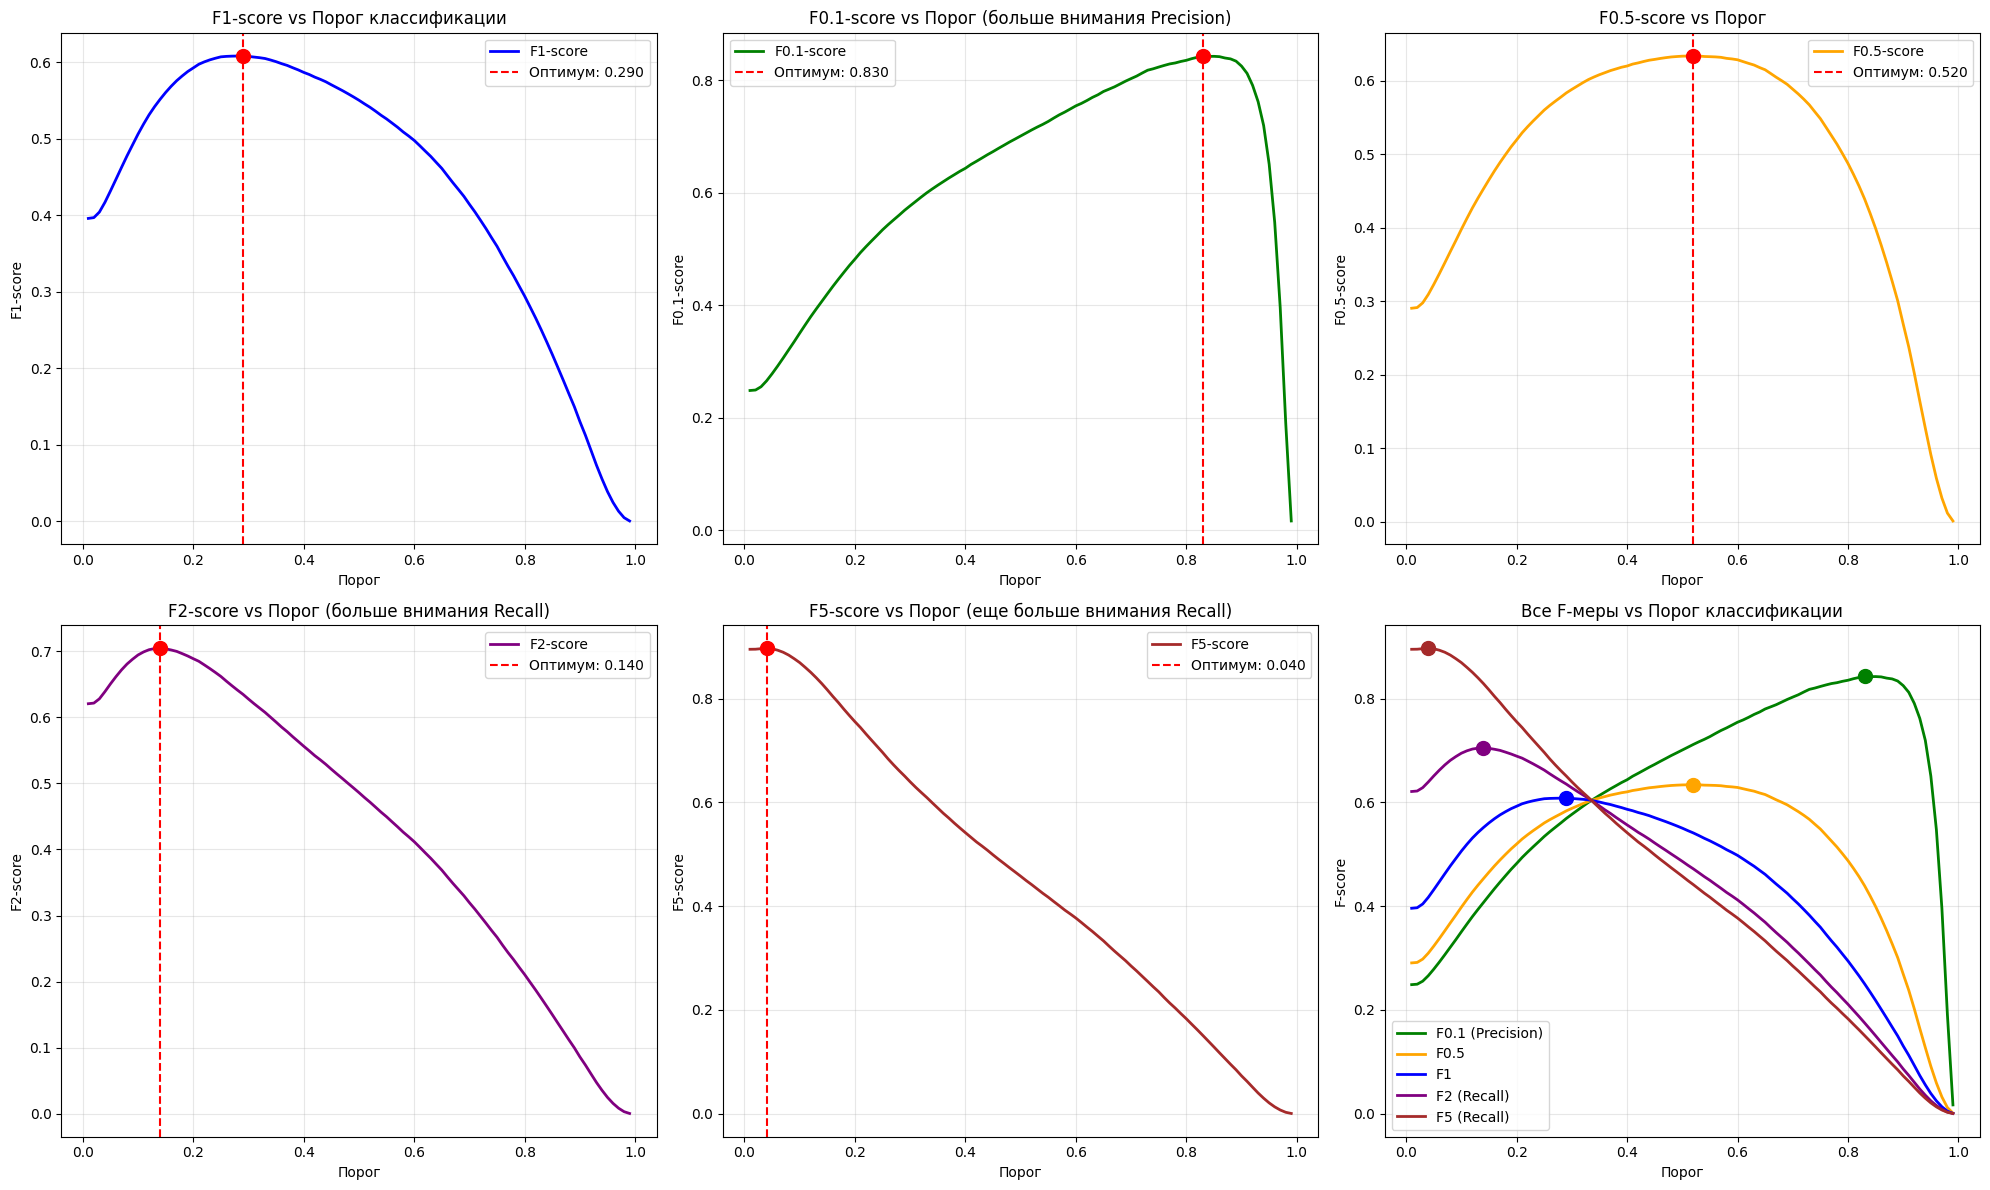


�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ


IndexError: index 2 is out of bounds for axis 1 with size 2

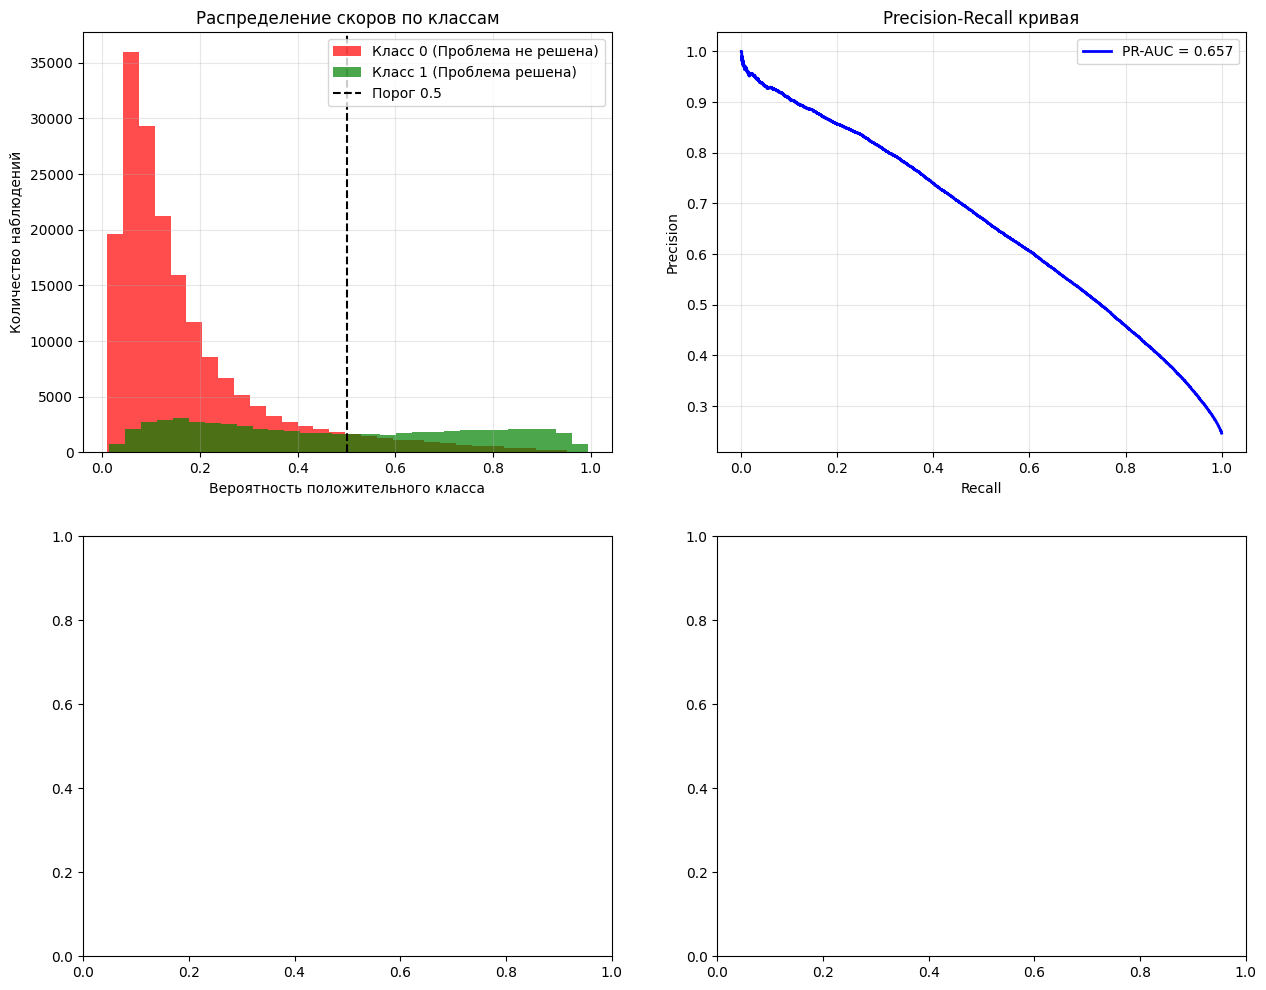

In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall
# Анализ F-мер и разделяющей способности модели

# Функция для вычисления F-мер с разными бета
def calculate_f_beta_score(precision, recall, beta):
    """Вычисляет F-beta score"""
    if precision + recall == 0:
        return 0
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Функция для вычисления метрик при разных порогах
def calculate_metrics_at_thresholds(y_true, y_pred_proba, thresholds):
    """Вычисляет метрики при разных порогах классификации"""
    results = []
    
    for threshold in tqdm(thresholds, desc="Вычисление метрик"):
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)
        
        # Базовые метрики
        precision = precision_score(y_true, y_pred_threshold, zero_division=0)
        recall = recall_score(y_true, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_true, y_pred_threshold, zero_division=0)
        
        # F-меры с разными бета
        f01 = calculate_f_beta_score(precision, recall, 0.1)  # Больше внимания precision
        f05 = calculate_f_beta_score(precision, recall, 0.5)  # Больше внимания precision
        f2 = calculate_f_beta_score(precision, recall, 2)     # Больше внимания recall
        f5 = calculate_f_beta_score(precision, recall, 5)     # Еще больше внимания recall
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'f01': f01,
            'f05': f05,
            'f2': f2,
            'f5': f5
        })
    
    return pd.DataFrame(results)

# Создаем пороги для анализа
thresholds = np.linspace(0.01, 0.99, 99)

print("🔄 Вычисление метрик при разных порогах...")
metrics_df = calculate_metrics_at_thresholds(y_test, y_pred_proba, thresholds)

# Находим оптимальные пороги для каждой F-меры
optimal_thresholds = {}
for metric in ['f1', 'f01', 'f05', 'f2', 'f5']:
    optimal_idx = metrics_df[metric].idxmax()
    optimal_thresholds[metric] = {
        'threshold': metrics_df.loc[optimal_idx, 'threshold'],
        'value': metrics_df.loc[optimal_idx, metric],
        'precision': metrics_df.loc[optimal_idx, 'precision'],
        'recall': metrics_df.loc[optimal_idx, 'recall']
    }

print("✅ Оптимальные пороги найдены")

# Визуализация F-мер
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# График 1: F1-score
axes[0, 0].plot(metrics_df['threshold'], metrics_df['f1'], 'b-', linewidth=2, label='F1-score')
axes[0, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='red', linestyle='--', 
                   label=f"Оптимум: {optimal_thresholds['f1']['threshold']:.3f}")
axes[0, 0].scatter(optimal_thresholds['f1']['threshold'], optimal_thresholds['f1']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 0].set_title('F1-score vs Порог классификации')
axes[0, 0].set_xlabel('Порог')
axes[0, 0].set_ylabel('F1-score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: F0.1-score (больше внимания precision)
axes[0, 1].plot(metrics_df['threshold'], metrics_df['f01'], 'g-', linewidth=2, label='F0.1-score')
axes[0, 1].axvline(x=optimal_thresholds['f01']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f01']['threshold']:.3f}")
axes[0, 1].scatter(optimal_thresholds['f01']['threshold'], optimal_thresholds['f01']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 1].set_title('F0.1-score vs Порог (больше внимания Precision)')
axes[0, 1].set_xlabel('Порог')
axes[0, 1].set_ylabel('F0.1-score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: F0.5-score
axes[0, 2].plot(metrics_df['threshold'], metrics_df['f05'], 'orange', linewidth=2, label='F0.5-score')
axes[0, 2].axvline(x=optimal_thresholds['f05']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f05']['threshold']:.3f}")
axes[0, 2].scatter(optimal_thresholds['f05']['threshold'], optimal_thresholds['f05']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 2].set_title('F0.5-score vs Порог')
axes[0, 2].set_xlabel('Порог')
axes[0, 2].set_ylabel('F0.5-score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: F2-score (больше внимания recall)
axes[1, 0].plot(metrics_df['threshold'], metrics_df['f2'], 'purple', linewidth=2, label='F2-score')
axes[1, 0].axvline(x=optimal_thresholds['f2']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f2']['threshold']:.3f}")
axes[1, 0].scatter(optimal_thresholds['f2']['threshold'], optimal_thresholds['f2']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 0].set_title('F2-score vs Порог (больше внимания Recall)')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('F2-score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 5: F5-score
axes[1, 1].plot(metrics_df['threshold'], metrics_df['f5'], 'brown', linewidth=2, label='F5-score')
axes[1, 1].axvline(x=optimal_thresholds['f5']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f5']['threshold']:.3f}")
axes[1, 1].scatter(optimal_thresholds['f5']['threshold'], optimal_thresholds['f5']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 1].set_title('F5-score vs Порог (еще больше внимания Recall)')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('F5-score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# График 6: Все F-меры на одном графике
for metric, color, label in [
    ('f01', 'green', 'F0.1 (Precision)'),
    ('f05', 'orange', 'F0.5'),
    ('f1', 'blue', 'F1'),
    ('f2', 'purple', 'F2 (Recall)'),
    ('f5', 'brown', 'F5 (Recall)')
]:
    axes[1, 2].plot(metrics_df['threshold'], metrics_df[metric], color=color, linewidth=2, label=label)
    # Отмечаем оптимальные точки
    axes[1, 2].scatter(optimal_thresholds[metric]['threshold'], optimal_thresholds[metric]['value'], 
                       color=color, s=100, zorder=5)

axes[1, 2].set_title('Все F-меры vs Порог классификации')
axes[1, 2].set_xlabel('Порог')
axes[1, 2].set_ylabel('F-score')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ разделяющей способности
print("\n" + "=" * 70)
print("�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ")
print("=" * 70)

# 1. Распределение скоров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Гистограмма скоров по классам
axes[0, 0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Класс 0 (Проблема не решена)', color='red')
axes[0, 0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Класс 1 (Проблема решена)', color='green')
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', label='Порог 0.5')
axes[0, 0].set_title('Распределение скоров по классам')
axes[0, 0].set_xlabel('Вероятность положительного класса')
axes[0, 0].set_ylabel('Количество наблюдений')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Precision-Recall кривая
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[0, 1].plot(recall, precision, 'b-', linewidth=2, label=f'PR-AUC = {pr_auc:.3f}')
axes[0, 1].set_title('Precision-Recall кривая')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: ROC кривая
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[0, 2].plot(fpr, tpr, 'g-', linewidth=2, label=f'ROC-AUC = {roc_auc:.3f}')
axes[0, 2].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 2].set_title('ROC кривая')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: Precision и Recall vs Порог
axes[1, 0].plot(metrics_df['threshold'], metrics_df['precision'], 'b-', linewidth=2, label='Precision')
axes[1, 0].plot(metrics_df['threshold'], metrics_df['recall'], 'r-', linewidth=2, label='Recall')
axes[1, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='green', linestyle='--', 
                   label=f"Оптимальный F1: {optimal_thresholds['f1']['threshold']:.3f}")
axes[1, 0].set_title('Precision и Recall vs Порог')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Матрица ошибок для оптимального порога
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_threshold = optimal_thresholds['f1']['threshold']
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для порога 0.5
cm_default = confusion_matrix(y_test, y_pred)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Не решена', 'Решена'])
disp_default.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Матрица ошибок (порог 0.5)\nF1 = {f1_score(y_test, y_pred):.3f}')

# Матрица ошибок для оптимального порога
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['Не решена', 'Решена'])
disp_optimal.plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Матрица ошибок (оптимальный порог {optimal_threshold:.3f})\nF1 = {optimal_thresholds["f1"]["value"]:.3f}')

plt.tight_layout()
plt.show()

# 3. Статистический анализ
print("\n�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ")
print("=" * 70)

# Базовые метрики
print(f"🔸 ROC-AUC: {roc_auc:.4f}")
print(f"�� PR-AUC: {pr_auc:.4f}")

# Анализ перекрытия классов
class_0_scores = y_pred_proba[y_test == 0]
class_1_scores = y_pred_proba[y_test == 1]

print(f"\n📈 Анализ перекрытия классов:")
print(f"🔸 Средний скор класса 0: {class_0_scores.mean():.4f} ± {class_0_scores.std():.4f}")
print(f"🔸 Средний скор класса 1: {class_1_scores.mean():.4f} ± {class_1_scores.std():.4f}")
print(f"🔸 Разность средних: {class_1_scores.mean() - class_0_scores.mean():.4f}")

# Коэффициент разделения (Separation Coefficient)
separation_coef = (class_1_scores.mean() - class_0_scores.mean()) / np.sqrt((class_1_scores.var() + class_0_scores.var()) / 2)
print(f"🔸 Коэффициент разделения: {separation_coef:.4f}")

# Интерпретация коэффициента разделения
if separation_coef > 2:
    interpretation = "Отличная разделяющая способность"
elif separation_coef > 1.5:
    interpretation = "Хорошая разделяющая способность"
elif separation_coef > 1:
    interpretation = "Удовлетворительная разделяющая способность"
else:
    interpretation = "Слабая разделяющая способность"

print(f"🔸 Интерпретация: {interpretation}")

# 4. Сводная таблица оптимальных порогов
print(f"\n�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ")
print("=" * 70)

summary_table = pd.DataFrame({
    'F-мера': ['F0.1', 'F0.5', 'F1', 'F2', 'F5'],
    'Оптимальный порог': [
        optimal_thresholds['f01']['threshold'],
        optimal_thresholds['f05']['threshold'],
        optimal_thresholds['f1']['threshold'],
        optimal_thresholds['f2']['threshold'],
        optimal_thresholds['f5']['threshold']
    ],
    'F-score': [
        optimal_thresholds['f01']['value'],
        optimal_thresholds['f05']['value'],
        optimal_thresholds['f1']['value'],
        optimal_thresholds['f2']['value'],
        optimal_thresholds['f5']['value']
    ],
    'Precision': [
        optimal_thresholds['f01']['precision'],
        optimal_thresholds['f05']['precision'],
        optimal_thresholds['f1']['precision'],
        optimal_thresholds['f2']['precision'],
        optimal_thresholds['f5']['precision']
    ],
    'Recall': [
        optimal_thresholds['f01']['recall'],
        optimal_thresholds['f05']['recall'],
        optimal_thresholds['f1']['recall'],
        optimal_thresholds['f2']['recall'],
        optimal_thresholds['f5']['recall']
    ]
})

print(summary_table.round(4))

# 5. Рекомендации по выбору порога
print(f"\n�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА")
print("=" * 70)

print("�� F0.1 (β=0.1): Больше внимания Precision")
print("   - Используйте, если ложные срабатывания критичны")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f01']['threshold']))

print("\n�� F0.5 (β=0.5): Умеренное внимание Precision")
print("   - Баланс между Precision и Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f05']['threshold']))

print("\n🔸 F1 (β=1): Равное внимание Precision и Recall")
print("   - Стандартная метрика")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f1']['threshold']))

print("\n🔸 F2 (β=2): Больше внимания Recall")
print("   - Используйте, если пропуск положительных случаев критичен")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f2']['threshold']))

print("\n🔸 F5 (β=5): Еще больше внимания Recall")
print("   - Максимальное внимание Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f5']['threshold']))

# Сохранение результатов
print(f"\n💾 Сохранение результатов...")
results = {
    'optimal_thresholds': optimal_thresholds,
    'metrics_summary': summary_table.to_dict('records'),
    'model_performance': {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'separation_coefficient': separation_coef
    }
}

import json
with open('f_metrics_analysis.json', 'w') as f:
    json.dump(results, f, indent=2, default=str)

print("✅ Результаты сохранены в 'f_metrics_analysis.json'")

print("\n" + "=" * 70)
print("�� АНАЛИЗ F-МЕР И РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ ЗАВЕРШЕН!")
print("=" * 70)

🔄 Вычисление метрик при разных порогах...


Вычисление метрик: 100%|██████████| 99/99 [00:07<00:00, 12.54it/s]


✅ Оптимальные пороги найдены


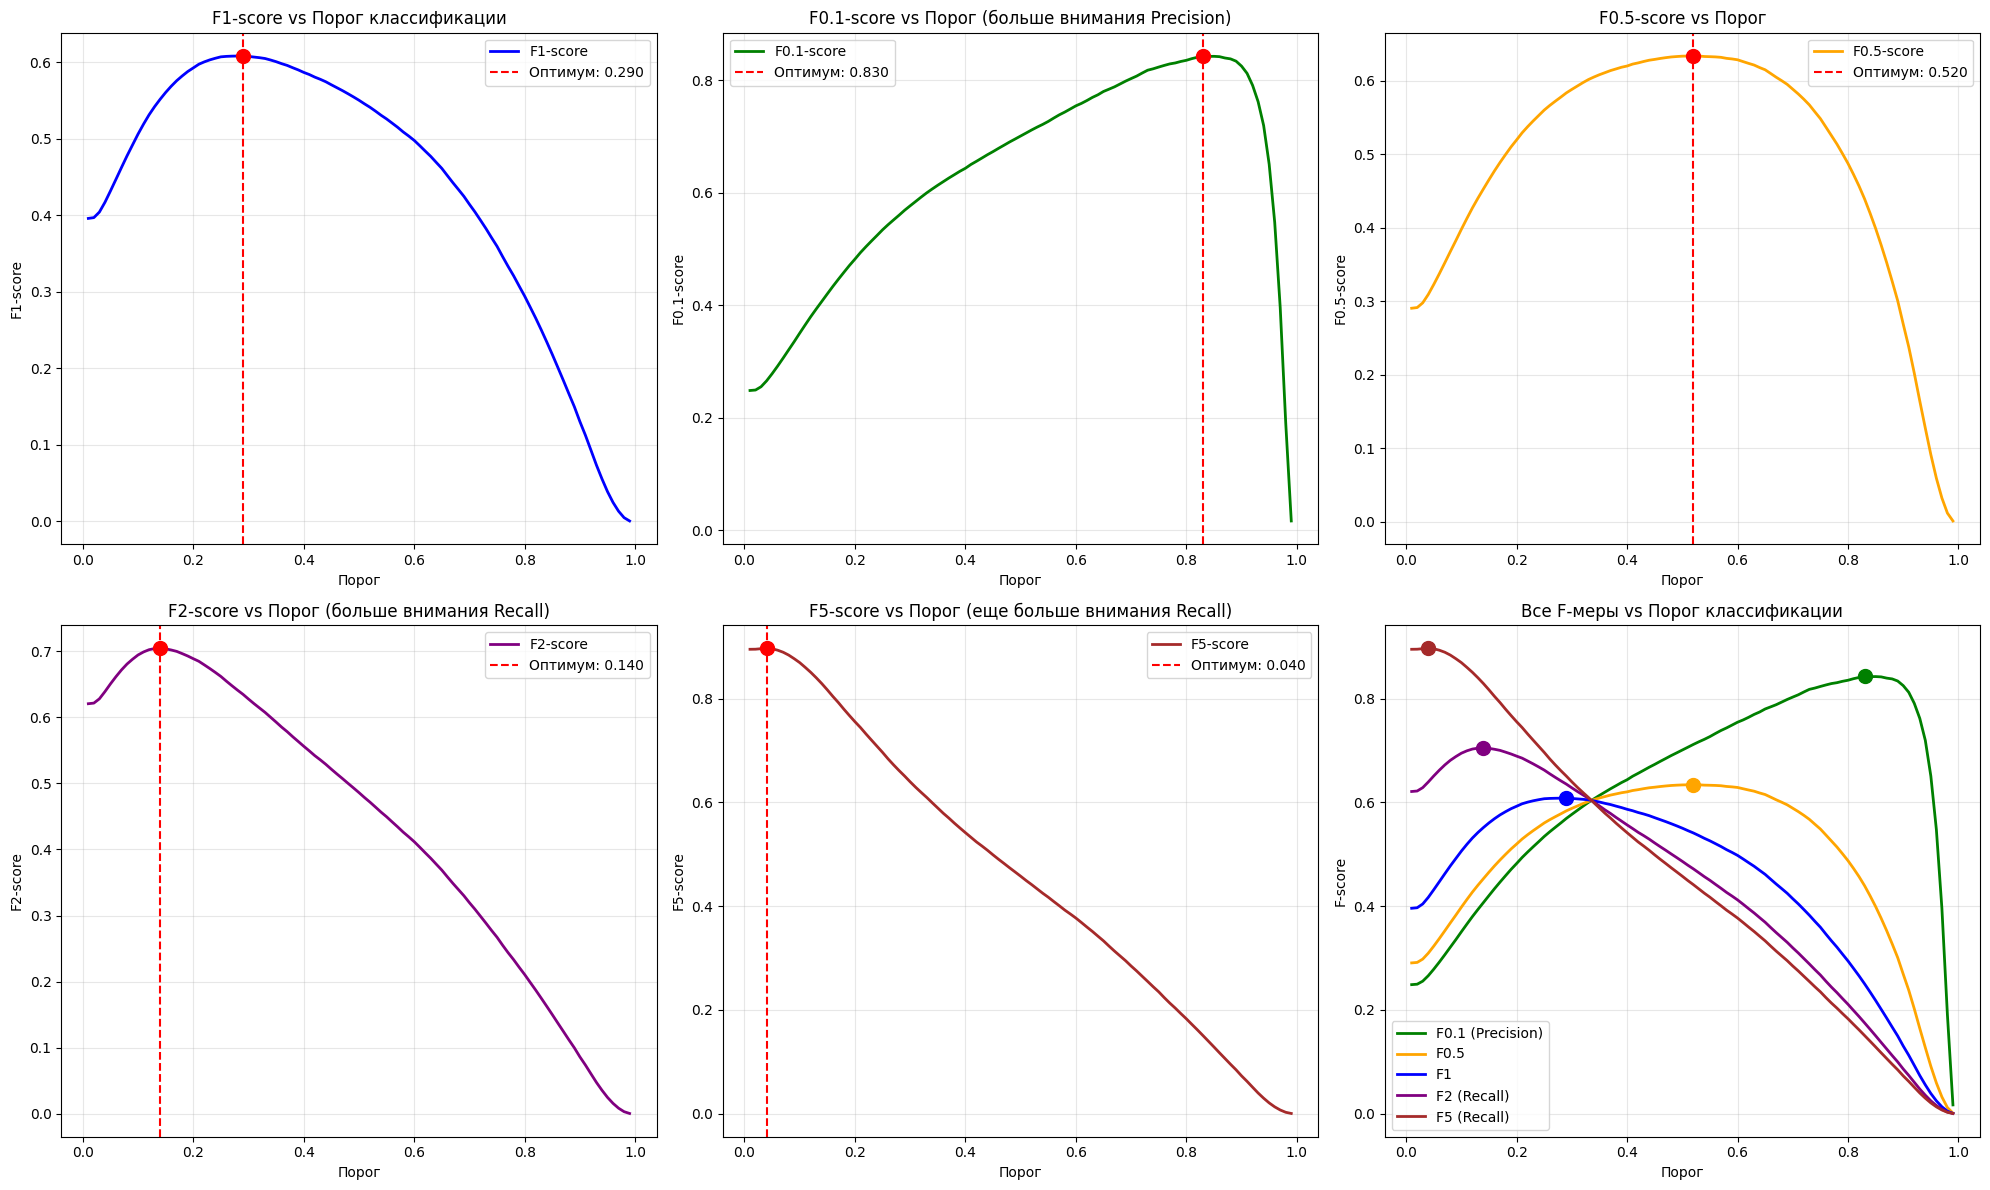


�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ


IndexError: index 2 is out of bounds for axis 1 with size 2

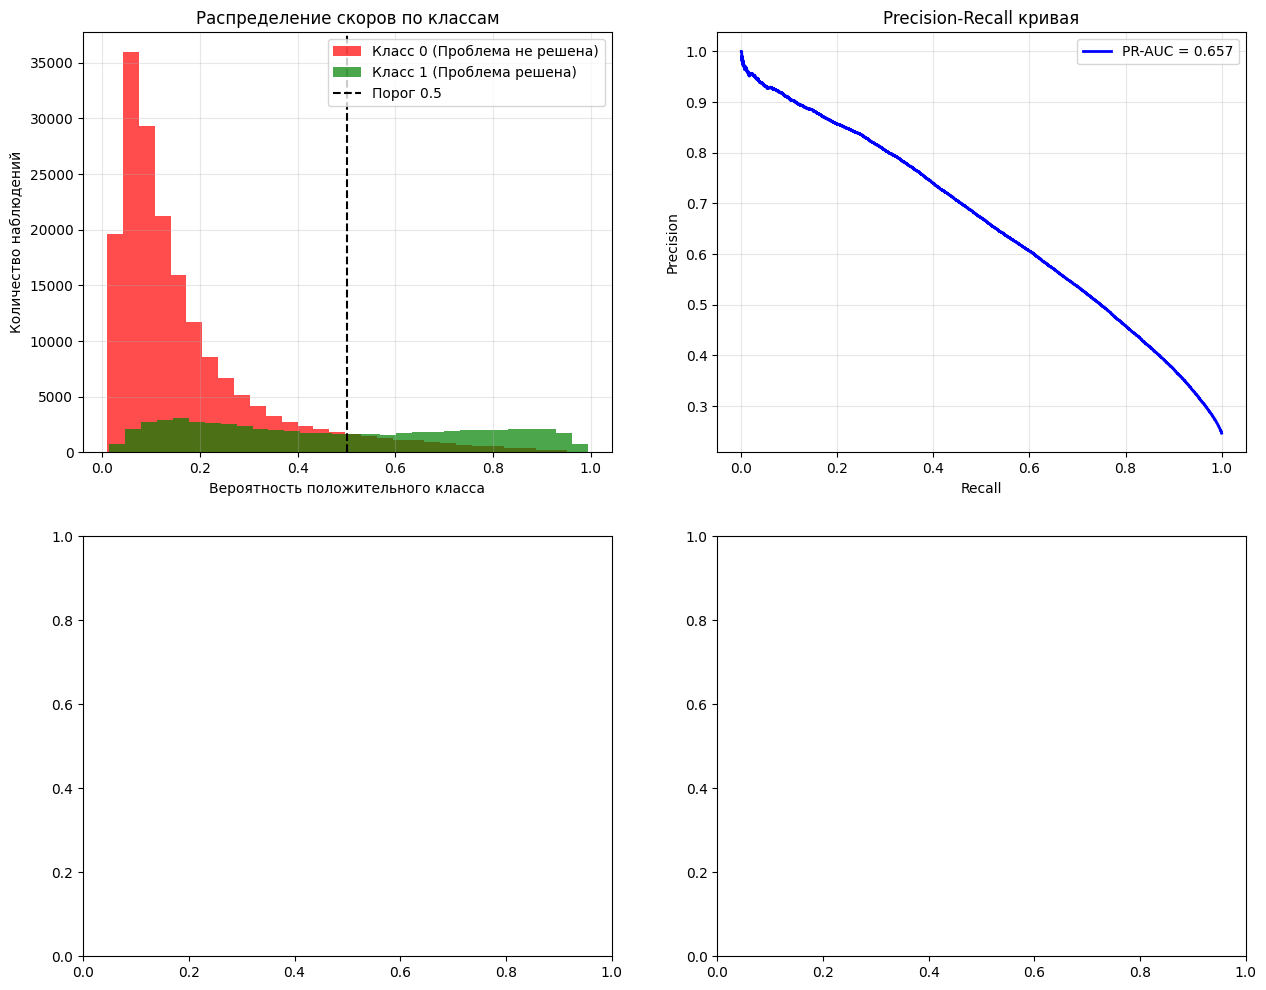

In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall
# Анализ F-мер и разделяющей способности модели

# Функция для вычисления F-мер с разными бета
def calculate_f_beta_score(precision, recall, beta):
    """Вычисляет F-beta score"""
    if precision + recall == 0:
        return 0
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Функция для вычисления метрик при разных порогах
def calculate_metrics_at_thresholds(y_true, y_pred_proba, thresholds):
    """Вычисляет метрики при разных порогах классификации"""
    results = []
    
    for threshold in tqdm(thresholds, desc="Вычисление метрик"):
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)
        
        # Базовые метрики
        precision = precision_score(y_true, y_pred_threshold, zero_division=0)
        recall = recall_score(y_true, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_true, y_pred_threshold, zero_division=0)
        
        # F-меры с разными бета
        f01 = calculate_f_beta_score(precision, recall, 0.1)  # Больше внимания precision
        f05 = calculate_f_beta_score(precision, recall, 0.5)  # Больше внимания precision
        f2 = calculate_f_beta_score(precision, recall, 2)     # Больше внимания recall
        f5 = calculate_f_beta_score(precision, recall, 5)     # Еще больше внимания recall
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'f01': f01,
            'f05': f05,
            'f2': f2,
            'f5': f5
        })
    
    return pd.DataFrame(results)

# Создаем пороги для анализа
thresholds = np.linspace(0.01, 0.99, 99)

print("🔄 Вычисление метрик при разных порогах...")
metrics_df = calculate_metrics_at_thresholds(y_test, y_pred_proba, thresholds)

# Находим оптимальные пороги для каждой F-меры
optimal_thresholds = {}
for metric in ['f1', 'f01', 'f05', 'f2', 'f5']:
    optimal_idx = metrics_df[metric].idxmax()
    optimal_thresholds[metric] = {
        'threshold': metrics_df.loc[optimal_idx, 'threshold'],
        'value': metrics_df.loc[optimal_idx, metric],
        'precision': metrics_df.loc[optimal_idx, 'precision'],
        'recall': metrics_df.loc[optimal_idx, 'recall']
    }

print("✅ Оптимальные пороги найдены")

# Визуализация F-мер
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# График 1: F1-score
axes[0, 0].plot(metrics_df['threshold'], metrics_df['f1'], 'b-', linewidth=2, label='F1-score')
axes[0, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='red', linestyle='--', 
                   label=f"Оптимум: {optimal_thresholds['f1']['threshold']:.3f}")
axes[0, 0].scatter(optimal_thresholds['f1']['threshold'], optimal_thresholds['f1']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 0].set_title('F1-score vs Порог классификации')
axes[0, 0].set_xlabel('Порог')
axes[0, 0].set_ylabel('F1-score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: F0.1-score (больше внимания precision)
axes[0, 1].plot(metrics_df['threshold'], metrics_df['f01'], 'g-', linewidth=2, label='F0.1-score')
axes[0, 1].axvline(x=optimal_thresholds['f01']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f01']['threshold']:.3f}")
axes[0, 1].scatter(optimal_thresholds['f01']['threshold'], optimal_thresholds['f01']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 1].set_title('F0.1-score vs Порог (больше внимания Precision)')
axes[0, 1].set_xlabel('Порог')
axes[0, 1].set_ylabel('F0.1-score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: F0.5-score
axes[0, 2].plot(metrics_df['threshold'], metrics_df['f05'], 'orange', linewidth=2, label='F0.5-score')
axes[0, 2].axvline(x=optimal_thresholds['f05']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f05']['threshold']:.3f}")
axes[0, 2].scatter(optimal_thresholds['f05']['threshold'], optimal_thresholds['f05']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 2].set_title('F0.5-score vs Порог')
axes[0, 2].set_xlabel('Порог')
axes[0, 2].set_ylabel('F0.5-score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: F2-score (больше внимания recall)
axes[1, 0].plot(metrics_df['threshold'], metrics_df['f2'], 'purple', linewidth=2, label='F2-score')
axes[1, 0].axvline(x=optimal_thresholds['f2']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f2']['threshold']:.3f}")
axes[1, 0].scatter(optimal_thresholds['f2']['threshold'], optimal_thresholds['f2']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 0].set_title('F2-score vs Порог (больше внимания Recall)')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('F2-score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 5: F5-score
axes[1, 1].plot(metrics_df['threshold'], metrics_df['f5'], 'brown', linewidth=2, label='F5-score')
axes[1, 1].axvline(x=optimal_thresholds['f5']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f5']['threshold']:.3f}")
axes[1, 1].scatter(optimal_thresholds['f5']['threshold'], optimal_thresholds['f5']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 1].set_title('F5-score vs Порог (еще больше внимания Recall)')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('F5-score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# График 6: Все F-меры на одном графике
for metric, color, label in [
    ('f01', 'green', 'F0.1 (Precision)'),
    ('f05', 'orange', 'F0.5'),
    ('f1', 'blue', 'F1'),
    ('f2', 'purple', 'F2 (Recall)'),
    ('f5', 'brown', 'F5 (Recall)')
]:
    axes[1, 2].plot(metrics_df['threshold'], metrics_df[metric], color=color, linewidth=2, label=label)
    # Отмечаем оптимальные точки
    axes[1, 2].scatter(optimal_thresholds[metric]['threshold'], optimal_thresholds[metric]['value'], 
                       color=color, s=100, zorder=5)

axes[1, 2].set_title('Все F-меры vs Порог классификации')
axes[1, 2].set_xlabel('Порог')
axes[1, 2].set_ylabel('F-score')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ разделяющей способности
print("\n" + "=" * 70)
print("�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ")
print("=" * 70)

# 1. Распределение скоров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Гистограмма скоров по классам
axes[0, 0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Класс 0 (Проблема не решена)', color='red')
axes[0, 0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Класс 1 (Проблема решена)', color='green')
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', label='Порог 0.5')
axes[0, 0].set_title('Распределение скоров по классам')
axes[0, 0].set_xlabel('Вероятность положительного класса')
axes[0, 0].set_ylabel('Количество наблюдений')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Precision-Recall кривая
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[0, 1].plot(recall, precision, 'b-', linewidth=2, label=f'PR-AUC = {pr_auc:.3f}')
axes[0, 1].set_title('Precision-Recall кривая')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: ROC кривая
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[0, 2].plot(fpr, tpr, 'g-', linewidth=2, label=f'ROC-AUC = {roc_auc:.3f}')
axes[0, 2].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 2].set_title('ROC кривая')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: Precision и Recall vs Порог
axes[1, 0].plot(metrics_df['threshold'], metrics_df['precision'], 'b-', linewidth=2, label='Precision')
axes[1, 0].plot(metrics_df['threshold'], metrics_df['recall'], 'r-', linewidth=2, label='Recall')
axes[1, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='green', linestyle='--', 
                   label=f"Оптимальный F1: {optimal_thresholds['f1']['threshold']:.3f}")
axes[1, 0].set_title('Precision и Recall vs Порог')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Матрица ошибок для оптимального порога
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_threshold = optimal_thresholds['f1']['threshold']
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для порога 0.5
cm_default = confusion_matrix(y_test, y_pred)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Не решена', 'Решена'])
disp_default.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Матрица ошибок (порог 0.5)\nF1 = {f1_score(y_test, y_pred):.3f}')

# Матрица ошибок для оптимального порога
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['Не решена', 'Решена'])
disp_optimal.plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Матрица ошибок (оптимальный порог {optimal_threshold:.3f})\nF1 = {optimal_thresholds["f1"]["value"]:.3f}')

plt.tight_layout()
plt.show()

# 3. Статистический анализ
print("\n�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ")
print("=" * 70)

# Базовые метрики
print(f"🔸 ROC-AUC: {roc_auc:.4f}")
print(f"�� PR-AUC: {pr_auc:.4f}")

# Анализ перекрытия классов
class_0_scores = y_pred_proba[y_test == 0]
class_1_scores = y_pred_proba[y_test == 1]

print(f"\n📈 Анализ перекрытия классов:")
print(f"🔸 Средний скор класса 0: {class_0_scores.mean():.4f} ± {class_0_scores.std():.4f}")
print(f"🔸 Средний скор класса 1: {class_1_scores.mean():.4f} ± {class_1_scores.std():.4f}")
print(f"🔸 Разность средних: {class_1_scores.mean() - class_0_scores.mean():.4f}")

# Коэффициент разделения (Separation Coefficient)
separation_coef = (class_1_scores.mean() - class_0_scores.mean()) / np.sqrt((class_1_scores.var() + class_0_scores.var()) / 2)
print(f"🔸 Коэффициент разделения: {separation_coef:.4f}")

# Интерпретация коэффициента разделения
if separation_coef > 2:
    interpretation = "Отличная разделяющая способность"
elif separation_coef > 1.5:
    interpretation = "Хорошая разделяющая способность"
elif separation_coef > 1:
    interpretation = "Удовлетворительная разделяющая способность"
else:
    interpretation = "Слабая разделяющая способность"

print(f"🔸 Интерпретация: {interpretation}")

# 4. Сводная таблица оптимальных порогов
print(f"\n�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ")
print("=" * 70)

summary_table = pd.DataFrame({
    'F-мера': ['F0.1', 'F0.5', 'F1', 'F2', 'F5'],
    'Оптимальный порог': [
        optimal_thresholds['f01']['threshold'],
        optimal_thresholds['f05']['threshold'],
        optimal_thresholds['f1']['threshold'],
        optimal_thresholds['f2']['threshold'],
        optimal_thresholds['f5']['threshold']
    ],
    'F-score': [
        optimal_thresholds['f01']['value'],
        optimal_thresholds['f05']['value'],
        optimal_thresholds['f1']['value'],
        optimal_thresholds['f2']['value'],
        optimal_thresholds['f5']['value']
    ],
    'Precision': [
        optimal_thresholds['f01']['precision'],
        optimal_thresholds['f05']['precision'],
        optimal_thresholds['f1']['precision'],
        optimal_thresholds['f2']['precision'],
        optimal_thresholds['f5']['precision']
    ],
    'Recall': [
        optimal_thresholds['f01']['recall'],
        optimal_thresholds['f05']['recall'],
        optimal_thresholds['f1']['recall'],
        optimal_thresholds['f2']['recall'],
        optimal_thresholds['f5']['recall']
    ]
})

print(summary_table.round(4))

# 5. Рекомендации по выбору порога
print(f"\n�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА")
print("=" * 70)

print("�� F0.1 (β=0.1): Больше внимания Precision")
print("   - Используйте, если ложные срабатывания критичны")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f01']['threshold']))

print("\n�� F0.5 (β=0.5): Умеренное внимание Precision")
print("   - Баланс между Precision и Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f05']['threshold']))

print("\n🔸 F1 (β=1): Равное внимание Precision и Recall")
print("   - Стандартная метрика")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f1']['threshold']))

print("\n🔸 F2 (β=2): Больше внимания Recall")
print("   - Используйте, если пропуск положительных случаев критичен")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f2']['threshold']))

print("\n🔸 F5 (β=5): Еще больше внимания Recall")
print("   - Максимальное внимание Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f5']['threshold']))

# Сохранение результатов
print(f"\n💾 Сохранение результатов...")
results = {
    'optimal_thresholds': optimal_thresholds,
    'metrics_summary': summary_table.to_dict('records'),
    'model_performance': {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'separation_coefficient': separation_coef
    }
}

import json
with open('f_metrics_analysis.json', 'w') as f:
    json.dump(results, f, indent=2, default=str)

print("✅ Результаты сохранены в 'f_metrics_analysis.json'")

print("\n" + "=" * 70)
print("�� АНАЛИЗ F-МЕР И РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ ЗАВЕРШЕН!")
print("=" * 70)

🔄 Вычисление метрик при разных порогах...


Вычисление метрик: 100%|██████████| 99/99 [00:07<00:00, 12.54it/s]


✅ Оптимальные пороги найдены


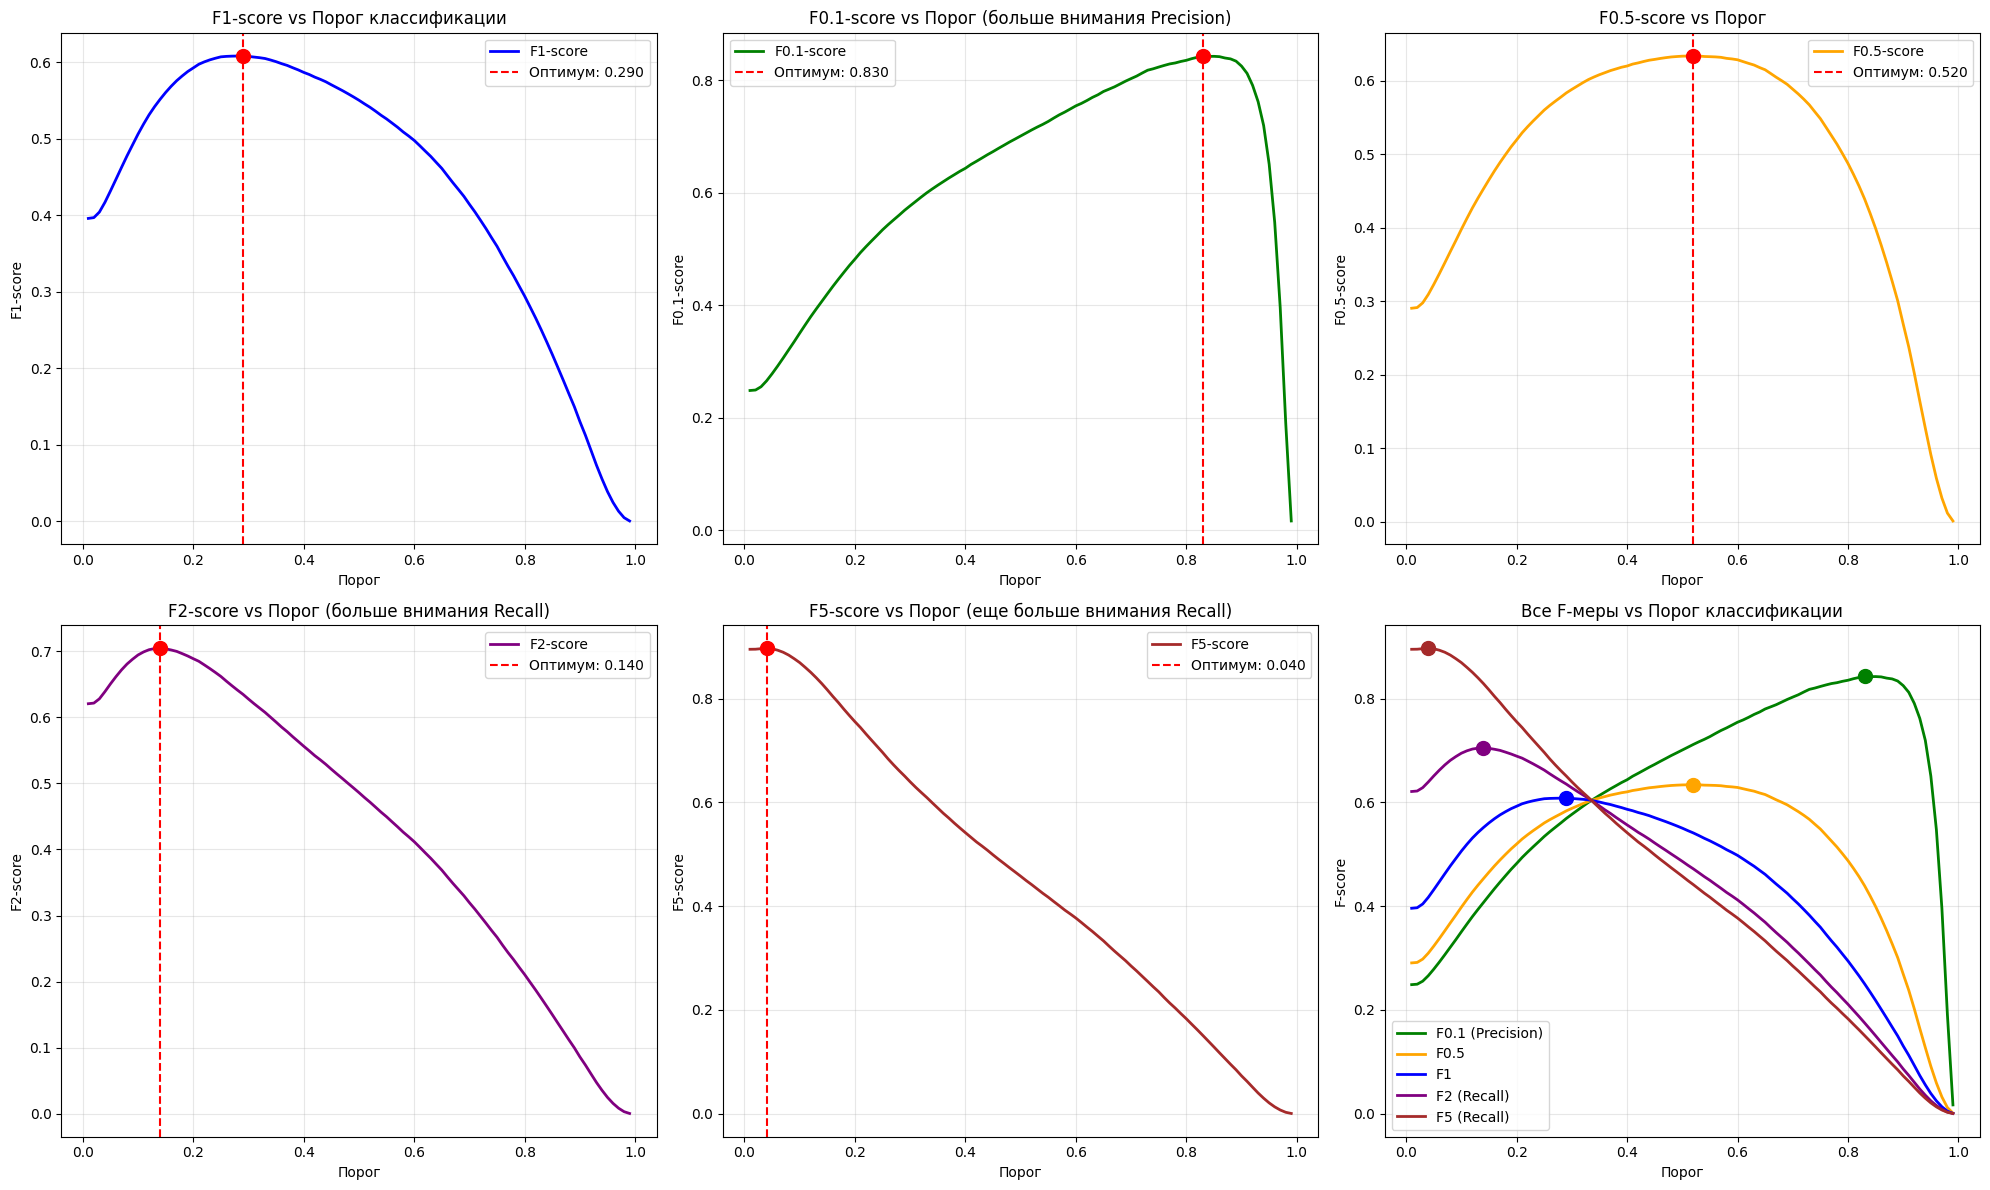


�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ


IndexError: index 2 is out of bounds for axis 1 with size 2

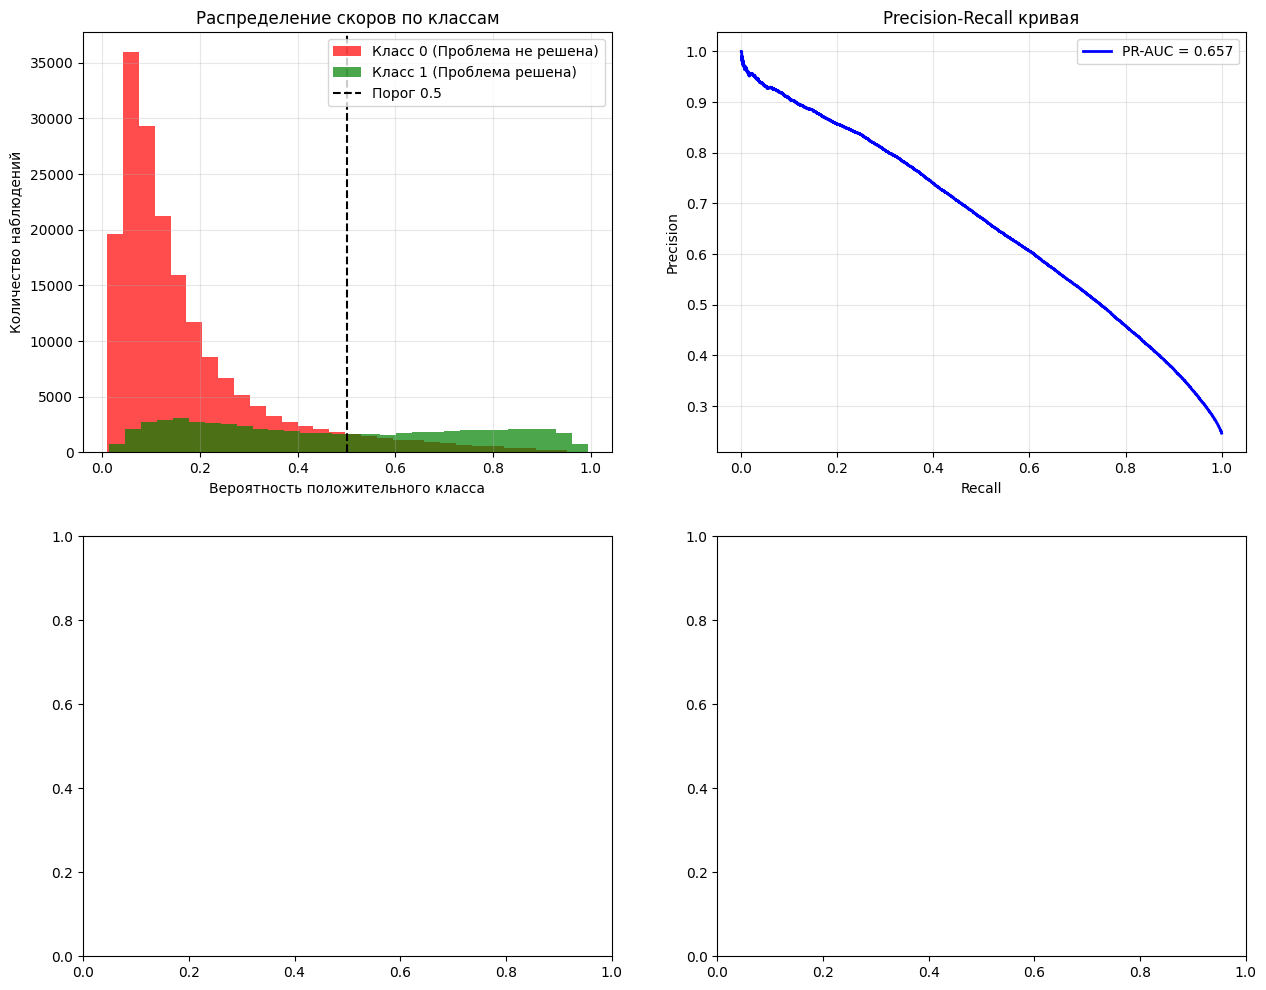

In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall
# Анализ F-мер и разделяющей способности модели

# Функция для вычисления F-мер с разными бета
def calculate_f_beta_score(precision, recall, beta):
    """Вычисляет F-beta score"""
    if precision + recall == 0:
        return 0
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Функция для вычисления метрик при разных порогах
def calculate_metrics_at_thresholds(y_true, y_pred_proba, thresholds):
    """Вычисляет метрики при разных порогах классификации"""
    results = []
    
    for threshold in tqdm(thresholds, desc="Вычисление метрик"):
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)
        
        # Базовые метрики
        precision = precision_score(y_true, y_pred_threshold, zero_division=0)
        recall = recall_score(y_true, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_true, y_pred_threshold, zero_division=0)
        
        # F-меры с разными бета
        f01 = calculate_f_beta_score(precision, recall, 0.1)  # Больше внимания precision
        f05 = calculate_f_beta_score(precision, recall, 0.5)  # Больше внимания precision
        f2 = calculate_f_beta_score(precision, recall, 2)     # Больше внимания recall
        f5 = calculate_f_beta_score(precision, recall, 5)     # Еще больше внимания recall
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'f01': f01,
            'f05': f05,
            'f2': f2,
            'f5': f5
        })
    
    return pd.DataFrame(results)

# Создаем пороги для анализа
thresholds = np.linspace(0.01, 0.99, 99)

print("🔄 Вычисление метрик при разных порогах...")
metrics_df = calculate_metrics_at_thresholds(y_test, y_pred_proba, thresholds)

# Находим оптимальные пороги для каждой F-меры
optimal_thresholds = {}
for metric in ['f1', 'f01', 'f05', 'f2', 'f5']:
    optimal_idx = metrics_df[metric].idxmax()
    optimal_thresholds[metric] = {
        'threshold': metrics_df.loc[optimal_idx, 'threshold'],
        'value': metrics_df.loc[optimal_idx, metric],
        'precision': metrics_df.loc[optimal_idx, 'precision'],
        'recall': metrics_df.loc[optimal_idx, 'recall']
    }

print("✅ Оптимальные пороги найдены")

# Визуализация F-мер
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# График 1: F1-score
axes[0, 0].plot(metrics_df['threshold'], metrics_df['f1'], 'b-', linewidth=2, label='F1-score')
axes[0, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='red', linestyle='--', 
                   label=f"Оптимум: {optimal_thresholds['f1']['threshold']:.3f}")
axes[0, 0].scatter(optimal_thresholds['f1']['threshold'], optimal_thresholds['f1']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 0].set_title('F1-score vs Порог классификации')
axes[0, 0].set_xlabel('Порог')
axes[0, 0].set_ylabel('F1-score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: F0.1-score (больше внимания precision)
axes[0, 1].plot(metrics_df['threshold'], metrics_df['f01'], 'g-', linewidth=2, label='F0.1-score')
axes[0, 1].axvline(x=optimal_thresholds['f01']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f01']['threshold']:.3f}")
axes[0, 1].scatter(optimal_thresholds['f01']['threshold'], optimal_thresholds['f01']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 1].set_title('F0.1-score vs Порог (больше внимания Precision)')
axes[0, 1].set_xlabel('Порог')
axes[0, 1].set_ylabel('F0.1-score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: F0.5-score
axes[0, 2].plot(metrics_df['threshold'], metrics_df['f05'], 'orange', linewidth=2, label='F0.5-score')
axes[0, 2].axvline(x=optimal_thresholds['f05']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f05']['threshold']:.3f}")
axes[0, 2].scatter(optimal_thresholds['f05']['threshold'], optimal_thresholds['f05']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 2].set_title('F0.5-score vs Порог')
axes[0, 2].set_xlabel('Порог')
axes[0, 2].set_ylabel('F0.5-score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: F2-score (больше внимания recall)
axes[1, 0].plot(metrics_df['threshold'], metrics_df['f2'], 'purple', linewidth=2, label='F2-score')
axes[1, 0].axvline(x=optimal_thresholds['f2']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f2']['threshold']:.3f}")
axes[1, 0].scatter(optimal_thresholds['f2']['threshold'], optimal_thresholds['f2']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 0].set_title('F2-score vs Порог (больше внимания Recall)')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('F2-score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 5: F5-score
axes[1, 1].plot(metrics_df['threshold'], metrics_df['f5'], 'brown', linewidth=2, label='F5-score')
axes[1, 1].axvline(x=optimal_thresholds['f5']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f5']['threshold']:.3f}")
axes[1, 1].scatter(optimal_thresholds['f5']['threshold'], optimal_thresholds['f5']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 1].set_title('F5-score vs Порог (еще больше внимания Recall)')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('F5-score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# График 6: Все F-меры на одном графике
for metric, color, label in [
    ('f01', 'green', 'F0.1 (Precision)'),
    ('f05', 'orange', 'F0.5'),
    ('f1', 'blue', 'F1'),
    ('f2', 'purple', 'F2 (Recall)'),
    ('f5', 'brown', 'F5 (Recall)')
]:
    axes[1, 2].plot(metrics_df['threshold'], metrics_df[metric], color=color, linewidth=2, label=label)
    # Отмечаем оптимальные точки
    axes[1, 2].scatter(optimal_thresholds[metric]['threshold'], optimal_thresholds[metric]['value'], 
                       color=color, s=100, zorder=5)

axes[1, 2].set_title('Все F-меры vs Порог классификации')
axes[1, 2].set_xlabel('Порог')
axes[1, 2].set_ylabel('F-score')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ разделяющей способности
print("\n" + "=" * 70)
print("�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ")
print("=" * 70)

# 1. Распределение скоров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Гистограмма скоров по классам
axes[0, 0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Класс 0 (Проблема не решена)', color='red')
axes[0, 0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Класс 1 (Проблема решена)', color='green')
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', label='Порог 0.5')
axes[0, 0].set_title('Распределение скоров по классам')
axes[0, 0].set_xlabel('Вероятность положительного класса')
axes[0, 0].set_ylabel('Количество наблюдений')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Precision-Recall кривая
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[0, 1].plot(recall, precision, 'b-', linewidth=2, label=f'PR-AUC = {pr_auc:.3f}')
axes[0, 1].set_title('Precision-Recall кривая')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: ROC кривая
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[0, 2].plot(fpr, tpr, 'g-', linewidth=2, label=f'ROC-AUC = {roc_auc:.3f}')
axes[0, 2].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 2].set_title('ROC кривая')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: Precision и Recall vs Порог
axes[1, 0].plot(metrics_df['threshold'], metrics_df['precision'], 'b-', linewidth=2, label='Precision')
axes[1, 0].plot(metrics_df['threshold'], metrics_df['recall'], 'r-', linewidth=2, label='Recall')
axes[1, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='green', linestyle='--', 
                   label=f"Оптимальный F1: {optimal_thresholds['f1']['threshold']:.3f}")
axes[1, 0].set_title('Precision и Recall vs Порог')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Матрица ошибок для оптимального порога
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_threshold = optimal_thresholds['f1']['threshold']
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для порога 0.5
cm_default = confusion_matrix(y_test, y_pred)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Не решена', 'Решена'])
disp_default.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Матрица ошибок (порог 0.5)\nF1 = {f1_score(y_test, y_pred):.3f}')

# Матрица ошибок для оптимального порога
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['Не решена', 'Решена'])
disp_optimal.plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Матрица ошибок (оптимальный порог {optimal_threshold:.3f})\nF1 = {optimal_thresholds["f1"]["value"]:.3f}')

plt.tight_layout()
plt.show()

# 3. Статистический анализ
print("\n�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ")
print("=" * 70)

# Базовые метрики
print(f"🔸 ROC-AUC: {roc_auc:.4f}")
print(f"�� PR-AUC: {pr_auc:.4f}")

# Анализ перекрытия классов
class_0_scores = y_pred_proba[y_test == 0]
class_1_scores = y_pred_proba[y_test == 1]

print(f"\n📈 Анализ перекрытия классов:")
print(f"🔸 Средний скор класса 0: {class_0_scores.mean():.4f} ± {class_0_scores.std():.4f}")
print(f"🔸 Средний скор класса 1: {class_1_scores.mean():.4f} ± {class_1_scores.std():.4f}")
print(f"🔸 Разность средних: {class_1_scores.mean() - class_0_scores.mean():.4f}")

# Коэффициент разделения (Separation Coefficient)
separation_coef = (class_1_scores.mean() - class_0_scores.mean()) / np.sqrt((class_1_scores.var() + class_0_scores.var()) / 2)
print(f"🔸 Коэффициент разделения: {separation_coef:.4f}")

# Интерпретация коэффициента разделения
if separation_coef > 2:
    interpretation = "Отличная разделяющая способность"
elif separation_coef > 1.5:
    interpretation = "Хорошая разделяющая способность"
elif separation_coef > 1:
    interpretation = "Удовлетворительная разделяющая способность"
else:
    interpretation = "Слабая разделяющая способность"

print(f"🔸 Интерпретация: {interpretation}")

# 4. Сводная таблица оптимальных порогов
print(f"\n�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ")
print("=" * 70)

summary_table = pd.DataFrame({
    'F-мера': ['F0.1', 'F0.5', 'F1', 'F2', 'F5'],
    'Оптимальный порог': [
        optimal_thresholds['f01']['threshold'],
        optimal_thresholds['f05']['threshold'],
        optimal_thresholds['f1']['threshold'],
        optimal_thresholds['f2']['threshold'],
        optimal_thresholds['f5']['threshold']
    ],
    'F-score': [
        optimal_thresholds['f01']['value'],
        optimal_thresholds['f05']['value'],
        optimal_thresholds['f1']['value'],
        optimal_thresholds['f2']['value'],
        optimal_thresholds['f5']['value']
    ],
    'Precision': [
        optimal_thresholds['f01']['precision'],
        optimal_thresholds['f05']['precision'],
        optimal_thresholds['f1']['precision'],
        optimal_thresholds['f2']['precision'],
        optimal_thresholds['f5']['precision']
    ],
    'Recall': [
        optimal_thresholds['f01']['recall'],
        optimal_thresholds['f05']['recall'],
        optimal_thresholds['f1']['recall'],
        optimal_thresholds['f2']['recall'],
        optimal_thresholds['f5']['recall']
    ]
})

print(summary_table.round(4))

# 5. Рекомендации по выбору порога
print(f"\n�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА")
print("=" * 70)

print("�� F0.1 (β=0.1): Больше внимания Precision")
print("   - Используйте, если ложные срабатывания критичны")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f01']['threshold']))

print("\n�� F0.5 (β=0.5): Умеренное внимание Precision")
print("   - Баланс между Precision и Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f05']['threshold']))

print("\n🔸 F1 (β=1): Равное внимание Precision и Recall")
print("   - Стандартная метрика")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f1']['threshold']))

print("\n🔸 F2 (β=2): Больше внимания Recall")
print("   - Используйте, если пропуск положительных случаев критичен")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f2']['threshold']))

print("\n🔸 F5 (β=5): Еще больше внимания Recall")
print("   - Максимальное внимание Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f5']['threshold']))

# Сохранение результатов
print(f"\n💾 Сохранение результатов...")
results = {
    'optimal_thresholds': optimal_thresholds,
    'metrics_summary': summary_table.to_dict('records'),
    'model_performance': {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'separation_coefficient': separation_coef
    }
}

import json
with open('f_metrics_analysis.json', 'w') as f:
    json.dump(results, f, indent=2, default=str)

print("✅ Результаты сохранены в 'f_metrics_analysis.json'")

print("\n" + "=" * 70)
print("�� АНАЛИЗ F-МЕР И РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ ЗАВЕРШЕН!")
print("=" * 70)

🔄 Вычисление метрик при разных порогах...


Вычисление метрик: 100%|██████████| 99/99 [00:07<00:00, 12.54it/s]


✅ Оптимальные пороги найдены


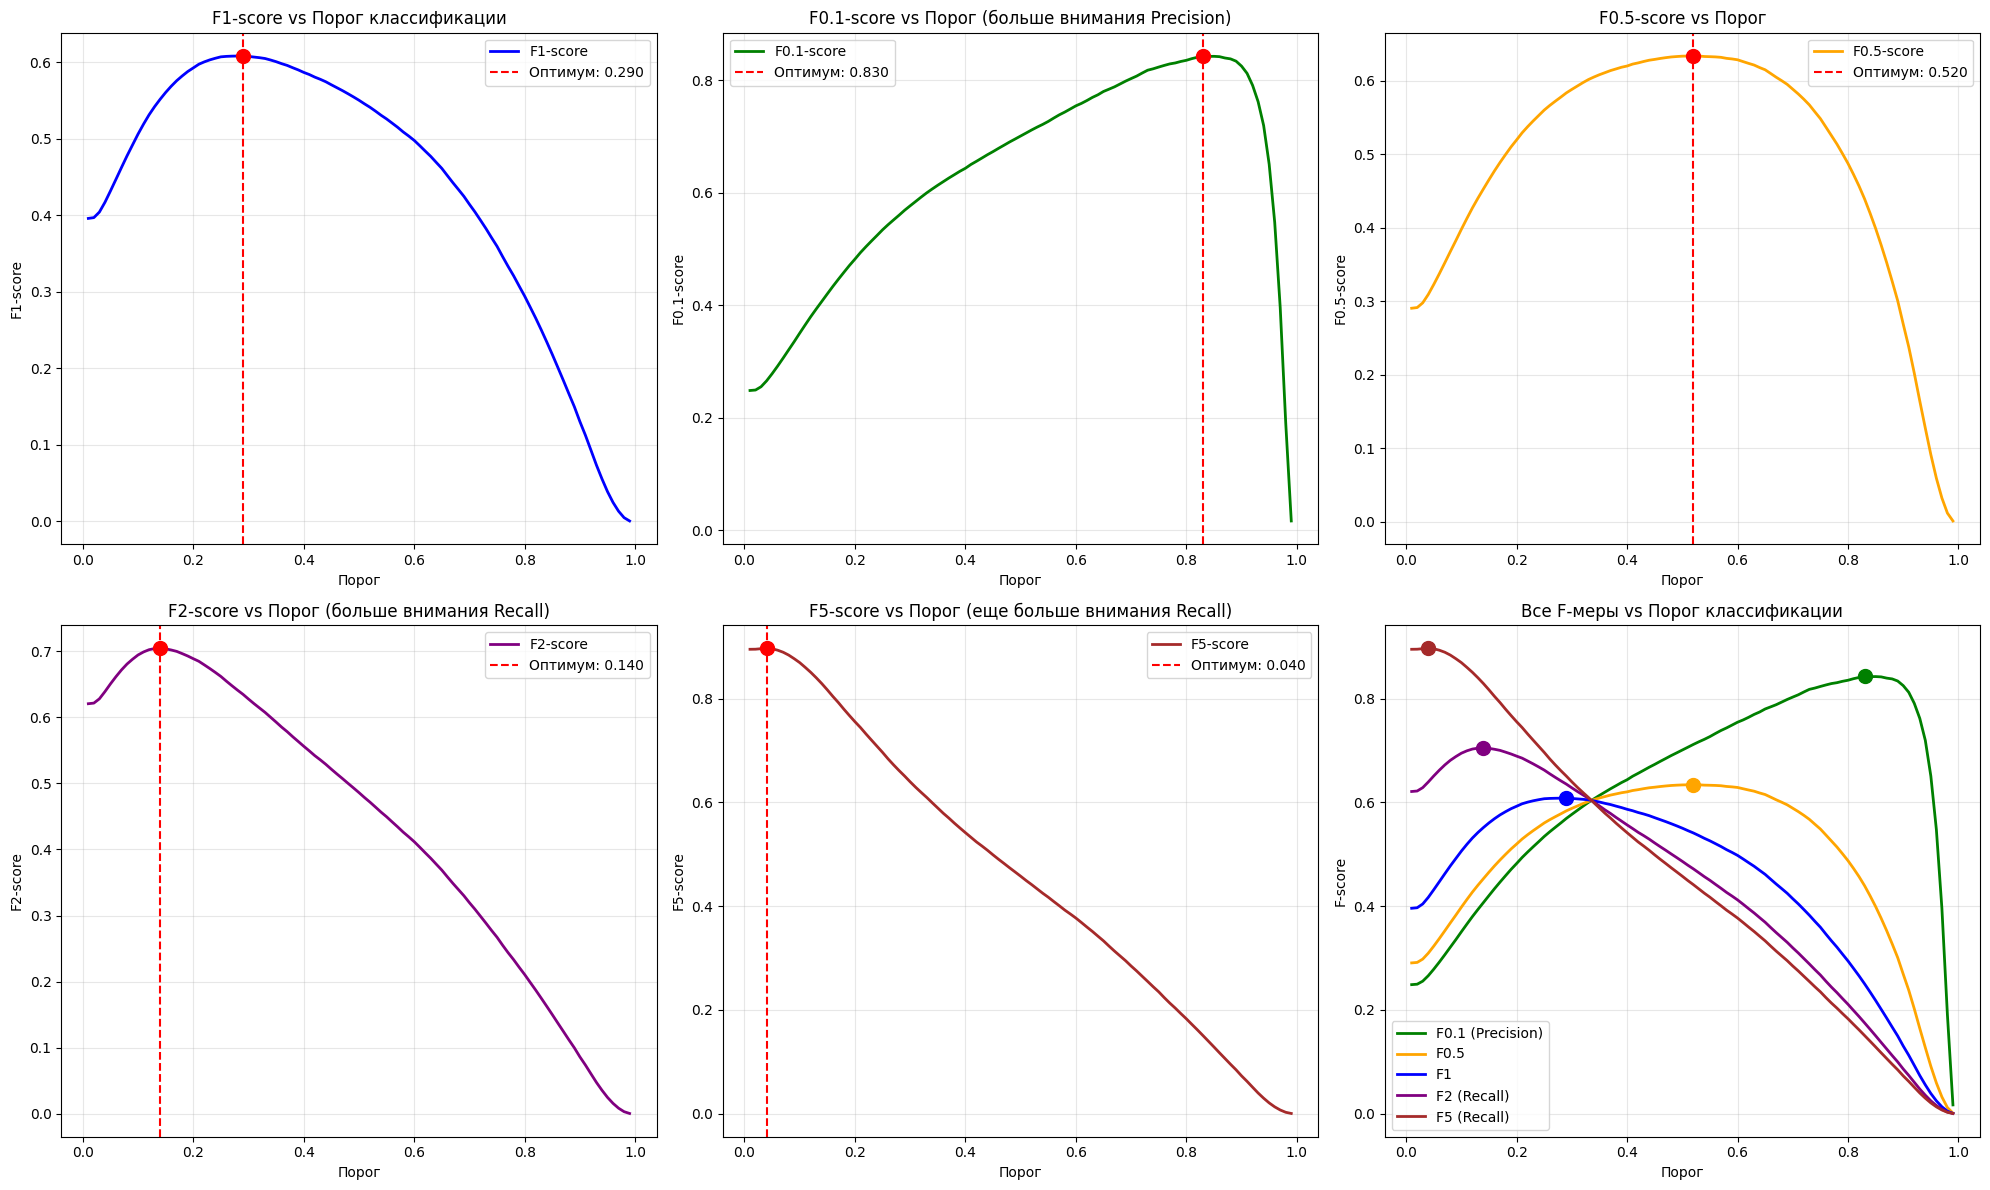


�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ


IndexError: index 2 is out of bounds for axis 1 with size 2

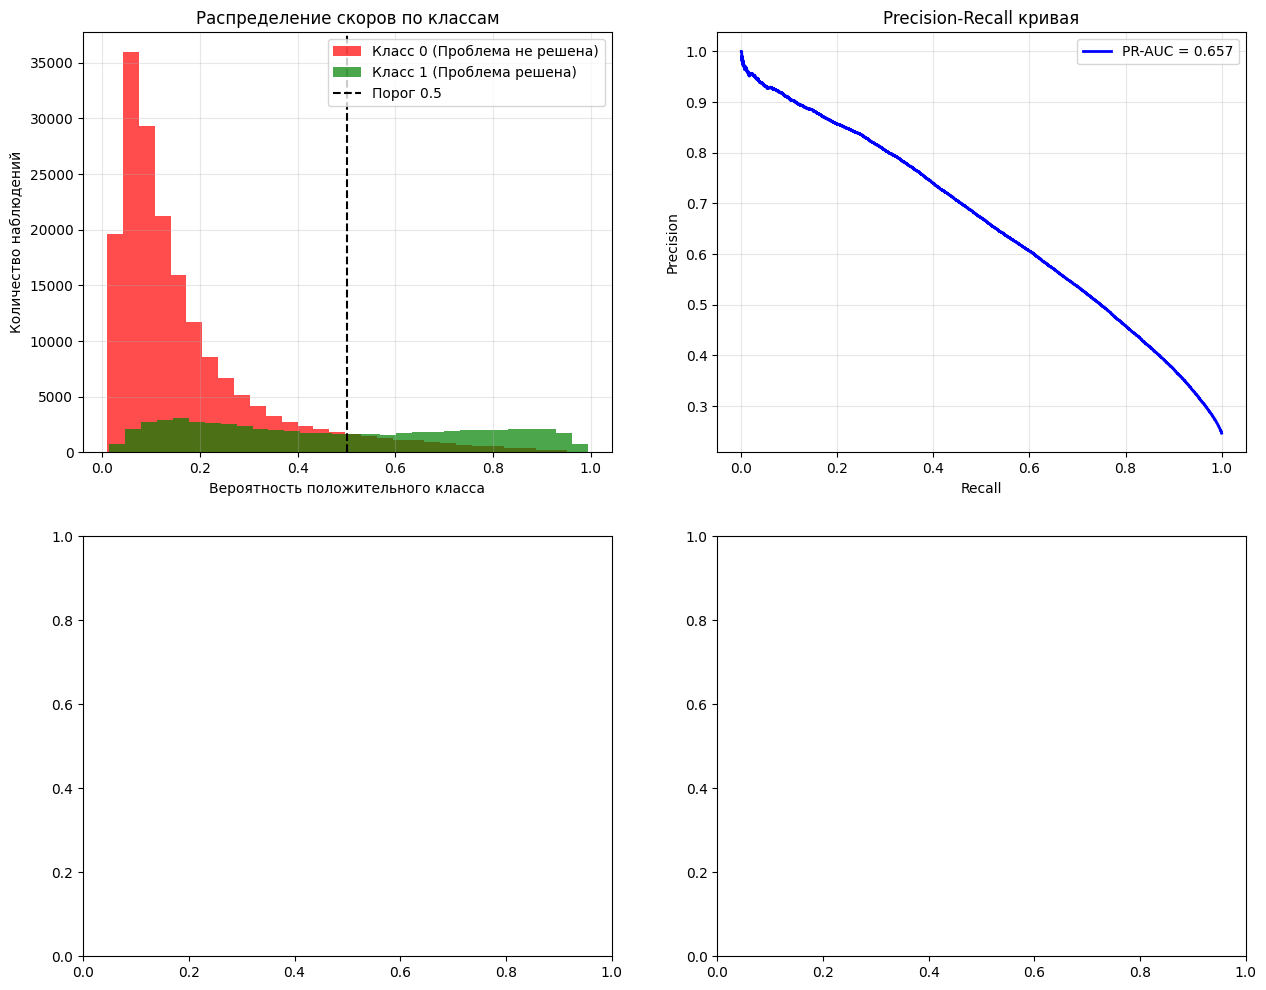

In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall
# Анализ F-мер и разделяющей способности модели

# Функция для вычисления F-мер с разными бета
def calculate_f_beta_score(precision, recall, beta):
    """Вычисляет F-beta score"""
    if precision + recall == 0:
        return 0
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Функция для вычисления метрик при разных порогах
def calculate_metrics_at_thresholds(y_true, y_pred_proba, thresholds):
    """Вычисляет метрики при разных порогах классификации"""
    results = []
    
    for threshold in tqdm(thresholds, desc="Вычисление метрик"):
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)
        
        # Базовые метрики
        precision = precision_score(y_true, y_pred_threshold, zero_division=0)
        recall = recall_score(y_true, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_true, y_pred_threshold, zero_division=0)
        
        # F-меры с разными бета
        f01 = calculate_f_beta_score(precision, recall, 0.1)  # Больше внимания precision
        f05 = calculate_f_beta_score(precision, recall, 0.5)  # Больше внимания precision
        f2 = calculate_f_beta_score(precision, recall, 2)     # Больше внимания recall
        f5 = calculate_f_beta_score(precision, recall, 5)     # Еще больше внимания recall
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'f01': f01,
            'f05': f05,
            'f2': f2,
            'f5': f5
        })
    
    return pd.DataFrame(results)

# Создаем пороги для анализа
thresholds = np.linspace(0.01, 0.99, 99)

print("🔄 Вычисление метрик при разных порогах...")
metrics_df = calculate_metrics_at_thresholds(y_test, y_pred_proba, thresholds)

# Находим оптимальные пороги для каждой F-меры
optimal_thresholds = {}
for metric in ['f1', 'f01', 'f05', 'f2', 'f5']:
    optimal_idx = metrics_df[metric].idxmax()
    optimal_thresholds[metric] = {
        'threshold': metrics_df.loc[optimal_idx, 'threshold'],
        'value': metrics_df.loc[optimal_idx, metric],
        'precision': metrics_df.loc[optimal_idx, 'precision'],
        'recall': metrics_df.loc[optimal_idx, 'recall']
    }

print("✅ Оптимальные пороги найдены")

# Визуализация F-мер
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# График 1: F1-score
axes[0, 0].plot(metrics_df['threshold'], metrics_df['f1'], 'b-', linewidth=2, label='F1-score')
axes[0, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='red', linestyle='--', 
                   label=f"Оптимум: {optimal_thresholds['f1']['threshold']:.3f}")
axes[0, 0].scatter(optimal_thresholds['f1']['threshold'], optimal_thresholds['f1']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 0].set_title('F1-score vs Порог классификации')
axes[0, 0].set_xlabel('Порог')
axes[0, 0].set_ylabel('F1-score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: F0.1-score (больше внимания precision)
axes[0, 1].plot(metrics_df['threshold'], metrics_df['f01'], 'g-', linewidth=2, label='F0.1-score')
axes[0, 1].axvline(x=optimal_thresholds['f01']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f01']['threshold']:.3f}")
axes[0, 1].scatter(optimal_thresholds['f01']['threshold'], optimal_thresholds['f01']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 1].set_title('F0.1-score vs Порог (больше внимания Precision)')
axes[0, 1].set_xlabel('Порог')
axes[0, 1].set_ylabel('F0.1-score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: F0.5-score
axes[0, 2].plot(metrics_df['threshold'], metrics_df['f05'], 'orange', linewidth=2, label='F0.5-score')
axes[0, 2].axvline(x=optimal_thresholds['f05']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f05']['threshold']:.3f}")
axes[0, 2].scatter(optimal_thresholds['f05']['threshold'], optimal_thresholds['f05']['value'], 
                   color='red', s=100, zorder=5)
axes[0, 2].set_title('F0.5-score vs Порог')
axes[0, 2].set_xlabel('Порог')
axes[0, 2].set_ylabel('F0.5-score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: F2-score (больше внимания recall)
axes[1, 0].plot(metrics_df['threshold'], metrics_df['f2'], 'purple', linewidth=2, label='F2-score')
axes[1, 0].axvline(x=optimal_thresholds['f2']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f2']['threshold']:.3f}")
axes[1, 0].scatter(optimal_thresholds['f2']['threshold'], optimal_thresholds['f2']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 0].set_title('F2-score vs Порог (больше внимания Recall)')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('F2-score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 5: F5-score
axes[1, 1].plot(metrics_df['threshold'], metrics_df['f5'], 'brown', linewidth=2, label='F5-score')
axes[1, 1].axvline(x=optimal_thresholds['f5']['threshold'], color='red', linestyle='--',
                   label=f"Оптимум: {optimal_thresholds['f5']['threshold']:.3f}")
axes[1, 1].scatter(optimal_thresholds['f5']['threshold'], optimal_thresholds['f5']['value'], 
                   color='red', s=100, zorder=5)
axes[1, 1].set_title('F5-score vs Порог (еще больше внимания Recall)')
axes[1, 1].set_xlabel('Порог')
axes[1, 1].set_ylabel('F5-score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# График 6: Все F-меры на одном графике
for metric, color, label in [
    ('f01', 'green', 'F0.1 (Precision)'),
    ('f05', 'orange', 'F0.5'),
    ('f1', 'blue', 'F1'),
    ('f2', 'purple', 'F2 (Recall)'),
    ('f5', 'brown', 'F5 (Recall)')
]:
    axes[1, 2].plot(metrics_df['threshold'], metrics_df[metric], color=color, linewidth=2, label=label)
    # Отмечаем оптимальные точки
    axes[1, 2].scatter(optimal_thresholds[metric]['threshold'], optimal_thresholds[metric]['value'], 
                       color=color, s=100, zorder=5)

axes[1, 2].set_title('Все F-меры vs Порог классификации')
axes[1, 2].set_xlabel('Порог')
axes[1, 2].set_ylabel('F-score')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ разделяющей способности
print("\n" + "=" * 70)
print("�� АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ МОДЕЛИ")
print("=" * 70)

# 1. Распределение скоров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Гистограмма скоров по классам
axes[0, 0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Класс 0 (Проблема не решена)', color='red')
axes[0, 0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Класс 1 (Проблема решена)', color='green')
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', label='Порог 0.5')
axes[0, 0].set_title('Распределение скоров по классам')
axes[0, 0].set_xlabel('Вероятность положительного класса')
axes[0, 0].set_ylabel('Количество наблюдений')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Precision-Recall кривая
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[0, 1].plot(recall, precision, 'b-', linewidth=2, label=f'PR-AUC = {pr_auc:.3f}')
axes[0, 1].set_title('Precision-Recall кривая')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: ROC кривая
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[0, 2].plot(fpr, tpr, 'g-', linewidth=2, label=f'ROC-AUC = {roc_auc:.3f}')
axes[0, 2].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 2].set_title('ROC кривая')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# График 4: Precision и Recall vs Порог
axes[1, 0].plot(metrics_df['threshold'], metrics_df['precision'], 'b-', linewidth=2, label='Precision')
axes[1, 0].plot(metrics_df['threshold'], metrics_df['recall'], 'r-', linewidth=2, label='Recall')
axes[1, 0].axvline(x=optimal_thresholds['f1']['threshold'], color='green', linestyle='--', 
                   label=f"Оптимальный F1: {optimal_thresholds['f1']['threshold']:.3f}")
axes[1, 0].set_title('Precision и Recall vs Порог')
axes[1, 0].set_xlabel('Порог')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Матрица ошибок для оптимального порога
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_threshold = optimal_thresholds['f1']['threshold']
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для порога 0.5
cm_default = confusion_matrix(y_test, y_pred)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Не решена', 'Решена'])
disp_default.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Матрица ошибок (порог 0.5)\nF1 = {f1_score(y_test, y_pred):.3f}')

# Матрица ошибок для оптимального порога
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['Не решена', 'Решена'])
disp_optimal.plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Матрица ошибок (оптимальный порог {optimal_threshold:.3f})\nF1 = {optimal_thresholds["f1"]["value"]:.3f}')

plt.tight_layout()
plt.show()

# 3. Статистический анализ
print("\n�� СТАТИСТИЧЕСКИЙ АНАЛИЗ РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ")
print("=" * 70)

# Базовые метрики
print(f"🔸 ROC-AUC: {roc_auc:.4f}")
print(f"�� PR-AUC: {pr_auc:.4f}")

# Анализ перекрытия классов
class_0_scores = y_pred_proba[y_test == 0]
class_1_scores = y_pred_proba[y_test == 1]

print(f"\n📈 Анализ перекрытия классов:")
print(f"🔸 Средний скор класса 0: {class_0_scores.mean():.4f} ± {class_0_scores.std():.4f}")
print(f"🔸 Средний скор класса 1: {class_1_scores.mean():.4f} ± {class_1_scores.std():.4f}")
print(f"🔸 Разность средних: {class_1_scores.mean() - class_0_scores.mean():.4f}")

# Коэффициент разделения (Separation Coefficient)
separation_coef = (class_1_scores.mean() - class_0_scores.mean()) / np.sqrt((class_1_scores.var() + class_0_scores.var()) / 2)
print(f"🔸 Коэффициент разделения: {separation_coef:.4f}")

# Интерпретация коэффициента разделения
if separation_coef > 2:
    interpretation = "Отличная разделяющая способность"
elif separation_coef > 1.5:
    interpretation = "Хорошая разделяющая способность"
elif separation_coef > 1:
    interpretation = "Удовлетворительная разделяющая способность"
else:
    interpretation = "Слабая разделяющая способность"

print(f"🔸 Интерпретация: {interpretation}")

# 4. Сводная таблица оптимальных порогов
print(f"\n�� СВОДНАЯ ТАБЛИЦА ОПТИМАЛЬНЫХ ПОРОГОВ")
print("=" * 70)

summary_table = pd.DataFrame({
    'F-мера': ['F0.1', 'F0.5', 'F1', 'F2', 'F5'],
    'Оптимальный порог': [
        optimal_thresholds['f01']['threshold'],
        optimal_thresholds['f05']['threshold'],
        optimal_thresholds['f1']['threshold'],
        optimal_thresholds['f2']['threshold'],
        optimal_thresholds['f5']['threshold']
    ],
    'F-score': [
        optimal_thresholds['f01']['value'],
        optimal_thresholds['f05']['value'],
        optimal_thresholds['f1']['value'],
        optimal_thresholds['f2']['value'],
        optimal_thresholds['f5']['value']
    ],
    'Precision': [
        optimal_thresholds['f01']['precision'],
        optimal_thresholds['f05']['precision'],
        optimal_thresholds['f1']['precision'],
        optimal_thresholds['f2']['precision'],
        optimal_thresholds['f5']['precision']
    ],
    'Recall': [
        optimal_thresholds['f01']['recall'],
        optimal_thresholds['f05']['recall'],
        optimal_thresholds['f1']['recall'],
        optimal_thresholds['f2']['recall'],
        optimal_thresholds['f5']['recall']
    ]
})

print(summary_table.round(4))

# 5. Рекомендации по выбору порога
print(f"\n�� РЕКОМЕНДАЦИИ ПО ВЫБОРУ ПОРОГА")
print("=" * 70)

print("�� F0.1 (β=0.1): Больше внимания Precision")
print("   - Используйте, если ложные срабатывания критичны")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f01']['threshold']))

print("\n�� F0.5 (β=0.5): Умеренное внимание Precision")
print("   - Баланс между Precision и Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f05']['threshold']))

print("\n🔸 F1 (β=1): Равное внимание Precision и Recall")
print("   - Стандартная метрика")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f1']['threshold']))

print("\n🔸 F2 (β=2): Больше внимания Recall")
print("   - Используйте, если пропуск положительных случаев критичен")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f2']['threshold']))

print("\n🔸 F5 (β=5): Еще больше внимания Recall")
print("   - Максимальное внимание Recall")
print("   - Оптимальный порог: {:.3f}".format(optimal_thresholds['f5']['threshold']))

# Сохранение результатов
print(f"\n💾 Сохранение результатов...")
results = {
    'optimal_thresholds': optimal_thresholds,
    'metrics_summary': summary_table.to_dict('records'),
    'model_performance': {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'separation_coefficient': separation_coef
    }
}

import json
with open('f_metrics_analysis.json', 'w') as f:
    json.dump(results, f, indent=2, default=str)

print("✅ Результаты сохранены в 'f_metrics_analysis.json'")

print("\n" + "=" * 70)
print("�� АНАЛИЗ F-МЕР И РАЗДЕЛЯЮЩЕЙ СПОСОБНОСТИ ЗАВЕРШЕН!")
print("=" * 70)

In [ ]:
# Grid Search для подбора гиперпараметров логистической регрессии
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [50, 100, 150, 200, 250, 300, 350],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None]
}

base_model = LogisticRegression(random_state=42)
start_time = time.time()
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5, 
    scoring='f1',
    n_jobs=-1,  
    verbose=1
)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time
# Результаты Grid Search
print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучший score: {grid_search.best_score_:.4f}")

# Оценка лучшей модели на тестовой выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

test_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, y_pred_proba)
}

print(f"\nМетрики на тестовой выборке:")
for metric, value in test_metrics.items():
    print(f"  {metric.upper()}: {value:.4f}")

Fitting 5 folds for each of 588 candidates, totalling 2940 fits


In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall


In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall


In [ ]:
# Сделаем графики f1, f01, f05, f2, f5, показать на графике точку, где f1 максимальный, f01, f05, f2, f5, продемонстировать разделяющую способнсть модели и какой существует трейдофф между precision и recall

In [ ]:
mlflow.set_experiment("Medical_Survey_Analysis")

# Параметры модели
params = {
    'C': 1.0,
    'max_iter': 1000,
    'random_state': 42
}
with mlflow.start_run():
    # Логируем параметры
    mlflow.log_params(params)
    
    # Создаем и обучаем модель
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)
    
    # Получаем предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Вычисляем метрики
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Логируем метрики
    mlflow.log_metrics(metrics)
    
    # Логируем модель
    mlflow.sklearn.log_model(model, "logistic_regression")
    
    # Выводим результаты
    print("\nРезультаты обучения:")
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"Recall: {metrics['recall']:.3f}")
    print(f"F1-score: {metrics['f1']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    
    # Сохраняем важные признаки
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(model.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    print("\nТоп-10 важных признаков:")
    print(feature_importance.head(10))
    # TODO classification report
    # statsmodel

In [ ]:
# добавить подбор гиперпараметров

In [ ]:
# TODO Графики ROC-AUC, PR AUC, гистограмма скоров, precision, recall, f1-score от порога, f01, f05, f2, f5. Какая b на что обращает больше внимание (MLFLOW)

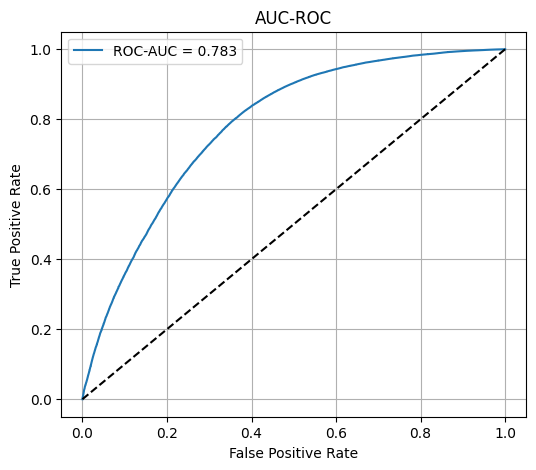

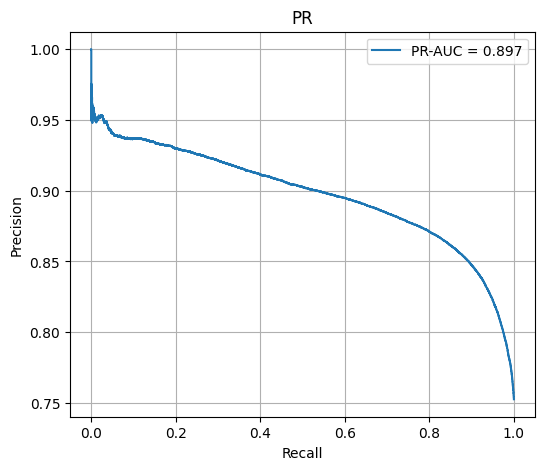

In [477]:
# AUC-ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC')
plt.legend()
plt.grid(True)
plt.show()

# PR
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR')
plt.legend()
plt.grid(True)
plt.show()

# Гистограмма скорингов
plt.figure(figsize=(6, 4))
plt.hist(y_pred_proba, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('predict_proba')
plt.ylabel('Количество')
plt.title('Гистограмма скорингов (predict_proba)')
plt.grid(True)
plt.show()
# TODO hue разграничение с лейблом

In [481]:
y = df['age']
X = X.drop(columns=['age'])
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlflow.set_experiment("Medical_Survey_Analysis_Age")
# Параметры модели
params = {
    'fit_intercept': True,
    'copy_X': True,
    'n_jobs': -1,
    'positive': False
}
with mlflow.start_run():
    # Логируем параметры
    mlflow.log_params(params)
    
    # Создаем и обучаем модель
    model = LinearRegression(**params)
    model.fit(X_train, y_train)
    
    # Получаем предсказания
    y_pred = model.predict(X_test)
    
    # Вычисляем метрики
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'mape': np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    }
    
    # Логируем метрики
    mlflow.log_metrics(metrics)
    
    # Логируем модель
    mlflow.sklearn.log_model(model, "linear_regression")
    
    # Выводим результаты
    print("\nРезультаты обучения линейной регрессии:")
    print(f"MSE: {metrics['mse']:.3f}")
    print(f"RMSE: {metrics['rmse']:.3f}")
    print(f"MAE: {metrics['mae']:.3f}")
    print(f"R²: {metrics['r2']:.3f}")
    print(f"MAPE: {metrics['mape']:.3f}%")
    
    # Сохраняем важные признаки
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': model.coef_
    })
    feature_importance['abs_coefficient'] = np.abs(feature_importance['coefficient'])
    feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)
    
    print("\nТоп-10 важных признаков (по абсолютному значению коэффициентов):")
    print(feature_importance.head(10))
    
    # Дополнительная информация о модели
    print(f"\nСвободный член (intercept): {model.intercept_:.3f}")
    print(f"Количество признаков: {len(model.coef_)}")
    
    # Визуализация результатов
    
    plt.figure(figsize=(12, 4))
    
    # График предсказаний vs реальных значений
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Реальные значения возраста')
    plt.ylabel('Предсказанные значения возраста')
    plt.title('Предсказания vs Реальные значения')
    plt.grid(True, alpha=0.3)
    
    # График остатков
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.title('График остатков')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

2025/06/26 21:36:45 INFO mlflow.tracking.fluent: Experiment with name 'Medical_Survey_Analysis_Age' does not exist. Creating a new experiment.
2025/06/26 21:37:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Результаты обучения линейной регрессии:
MSE: 0.141
RMSE: 0.375
MAE: 0.250
R²: 0.999
MAPE: 0.652%

Топ-10 важных признаков (по абсолютному значению коэффициентов):
                                     feature  coefficient  abs_coefficient
24                          avg_satisfaction       -2.533            2.533
71         last_visit_months visit_frequency        1.117            1.117
41                            region_avg_age        1.032            1.032
40                   region_avg_satisfaction        0.924            0.924
38                   staff_interaction_index        0.888            0.888
28                         last_visit_months       -0.755            0.755
37                     service_quality_index        0.442            0.442
29                           visit_frequency        0.360            0.360
25                          satisfaction_std        0.328            0.328
60  avg_satisfaction region_avg_satisfaction        0.296            0.296

Свободный 

In [ ]:
# TODO написать функцию для передачи модели в mlflow

In [ ]:
# TODO обучать модель внутри контекта